The problem statement for this project is to analyze and understand the restaurant industry in India by utilizing data from the Indian restaurant aggregator and food delivery start-up, Zomato. The project aims to gain insights into the sentiments of customer reviews, cluster Zomato restaurants into different segments, and analyze the data to make useful conclusions in the form of visualizations. The data analyzed includes information on cuisine, costing, and customer reviews. The project aims to assist customers in finding the best restaurant in their locality and aid the company in identifying areas for growth and improvement in the industry. Additionally, the project aims to use the data for sentiment analysis and identifying critics in the industry through the metadata of reviewers.

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns
import math
import time
from wordcloud import WordCloud

from scipy.stats import norm
from scipy import stats

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#importing kmeans
from sklearn.cluster import KMeans

#importing random forest and XgB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Non-negative matrix Factorization
from sklearn.decomposition import NMF


from sklearn.naive_bayes import MultinomialNB

#principal component analysis
from sklearn.decomposition import PCA


#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
#for tokenization
from nltk.tokenize import word_tokenize
# for POS tagging(Part of speech in NLP sentiment analysis)
nltk.download('averaged_perceptron_tagger')

#import stemmer
from nltk.stem.snowball import SnowballStemmer

#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

#LDA


from sklearn.decomposition import LatentDirichletAllocation

#importing contraction
!pip install contractions
!pip install gensim
import gensim
from gensim import corpora

#importing shap for model explainability
!pip install shap
import shap 

#download small spacy model
# !python -m spacy download en_core_web_sm
# import spacy

# The following lines adjust the granularity of reporting. 
pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


In [3]:
# Load Dataset
hotel_df = pd.read_csv('datasets/Zomato Restaurant names and Metadata.csv')
review_df = pd.read_csv('datasets/Zomato Restaurant reviews.csv')

In [4]:
# Dataset First Look restaurant
hotel_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [5]:
# Dataset First Look review
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [6]:
# Dataset Rows(Observation) & Columns count(Feature)
print(f'Total observation and feature for restaurant: {hotel_df.shape}')
print(f'Total observation and feature for review: {review_df.shape}')

Total observation and feature for restaurant: (105, 6)
Total observation and feature for review: (10000, 7)


In [7]:
# Dataset Info
print('Restaurant Info')
print('\n')
hotel_df.info()
print('='*120)
print('\n')
print('Review Info')
print('\n')
review_df.info()

Restaurant Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


Review Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)

In [8]:
# Dataset Duplicate Value Count
print('For Restaurant')
print('\n')
print(f"Data is duplicated ? \n {hotel_df.duplicated().value_counts()},unique values with {len(hotel_df[hotel_df.duplicated()])} duplication")
print('\n')
print('='*120)
print('\n')
print('For Reviews')
print('\n')
print(f"Data is duplicated ? {review_df.duplicated().value_counts()},unique values with {len(review_df[review_df.duplicated()])} duplication")

For Restaurant


Data is duplicated ? 
 False    105
Name: count, dtype: int64,unique values with 0 duplication




For Reviews


Data is duplicated ? False    9964
True       36
Name: count, dtype: int64,unique values with 36 duplication


In [9]:
#getting duplicate values
print(f' Duplicate data count = {review_df[review_df.duplicated()].shape[0]}')
review_df[review_df.duplicated()]

 Duplicate data count = 36


Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

In [10]:
#checking values for Anerican Wild Things
review_df[(review_df['Restaurant'] == 'American Wild Wings')].shape

(100, 7)

In [11]:
#checking values for Arena Eleven
review_df[(review_df['Restaurant'] == 'Arena Eleven')].shape

(100, 7)

## Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count for hotel data
hotel_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [13]:
# Missing Values/Null Values Count for review data
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

<Axes: >

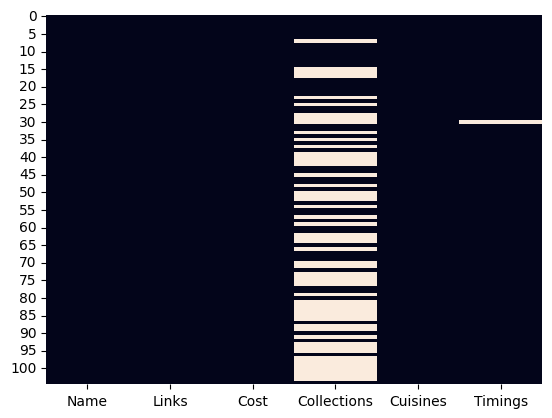

In [14]:
# Visualizing the missing values for restaurant
# Checking Null Value by plotting Heatmap
sns.heatmap(hotel_df.isnull(), cbar=False)

<Axes: >

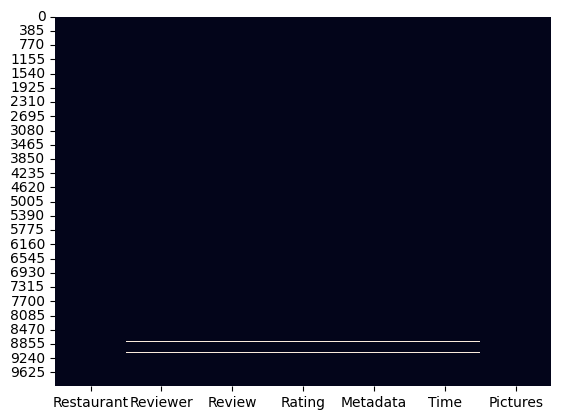

In [15]:
# Visualizing the missing values for reviews
# Checking Null Value by plotting Heatmap
sns.heatmap(review_df.isnull(), cbar=False)

**Restaurant DataSet**
* There are 105 total observation with 6 different features.
* Feature like collection and timing has null values.
* There is no duplicate values i.e., 105 unique data.
* Feature cost represent amount but has object data type because these values are separated by comma ','.
* Timing represent operational hour but as it is represented in the form of text has object data type.

**Review DataSet**
* There are total 10000 observation and 7 features.
* Except picture and restaurant feature all others have null values.
* There are total of 36 duplicate values for two restaurant - American Wild Wings and Arena Eleven, where all these duplicate values generally have null values.
* Rating represent ordinal data, has object data type should be integer.
* Timing represent the time when review was posted but show object data time, it should be converted into date time.


## Understanding Your Variables

In [16]:
# Dataset Columns restaurant
print(f'Features : {hotel_df.columns.to_list()}')

Features : ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']


In [17]:
# Dataset Columns review
print(f'Features : {review_df.columns.to_list()}')

Features : ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [18]:
# Dataset Describe restaurant
hotel_df.describe()

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

In [19]:
# Dataset Describe review
review_df.describe(include='all')

Restaurant     Reviewer Review Rating  Metadata             Time  \
count             10000         9962   9955   9962      9962             9962   
unique              100         7446   9364     10      2477             9782   
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34   
freq                100           13    237   3832       919                3   
mean                NaN          NaN    NaN    NaN       NaN              NaN   
std                 NaN          NaN    NaN    NaN       NaN              NaN   
min                 NaN          NaN    NaN    NaN       NaN              NaN   
25%                 NaN          NaN    NaN    NaN       NaN              NaN   
50%                 NaN          NaN    NaN    NaN       NaN              NaN   
75%                 NaN          NaN    NaN    NaN       NaN              NaN   
max                 NaN          NaN    NaN    NaN       NaN              NaN   

        Pictures  
count   10000.00  
unique       NaN  
top          NaN  
freq         NaN  
mean        0.75  
std         2.57  
min         0.00  
25%         0.00  
50%         0.00  
75%         0.00  
max        64.00

**Attributes ▶**

---
**Zomato Restaurant**
* Name : Name of Restaurants

* Links : URL Links of Restaurants

* Cost : Per person estimated Cost of dining

* Collection : Tagging of Restaurants w.r.t. Zomato categories

* Cuisines : Cuisines served by Restaurants

* Timings : Restaurant Timings

**Zomato Restaurant Reviews**
* Restaurant : Name of the Restaurant

* Reviewer : Name of the Reviewer

* Review : Review Text

* Rating : Rating Provided by Reviewer

* MetaData : Reviewer Metadata - No. of Reviews and followers

* Time: Date and Time of Review

* Pictures : No. of pictures posted with review





In [20]:
# Check Unique Values for each variable for restaurant
for i in hotel_df.columns.tolist():
  print("No. of unique values in ",i,"is",hotel_df[i].nunique(),".")

No. of unique values in  Name is 105 .
No. of unique values in  Links is 105 .
No. of unique values in  Cost is 29 .
No. of unique values in  Collections is 42 .
No. of unique values in  Cuisines is 92 .
No. of unique values in  Timings is 77 .


In [21]:
# Check Unique Values for each variable for reviews
for i in review_df.columns.tolist():
  print("No. of unique values in ",i,"is",review_df[i].nunique(),".")

No. of unique values in  Restaurant is 100 .
No. of unique values in  Reviewer is 7446 .
No. of unique values in  Review is 9364 .
No. of unique values in  Rating is 10 .
No. of unique values in  Metadata is 2477 .
No. of unique values in  Time is 9782 .
No. of unique values in  Pictures is 36 .


## Data Wrangling

In [22]:
#creating copy of both the data
hotel = hotel_df.copy()
review = review_df.copy()

#### Restaurant

In [23]:
#before changing data type for cost checking values
hotel['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [24]:
# changing the data type of the cost function
hotel['Cost'] = hotel['Cost'].str.replace(",","").astype('int64')

In [25]:
#top 5 costlier restaurant
hotel.sort_values('Cost', ascending = False)[['Name','Cost']][:5]

Name  Cost
92               Collage - Hyatt Hyderabad Gachibowli  2800
56                   Feast - Sheraton Hyderabad Hotel  2500
21  Jonathan's Kitchen - Holiday Inn Express & Suites  1900
18                                  10 Downing Street  1900
91            Cascade - Radisson Hyderabad Hitec City  1800

In [26]:
#top 5 economy restaurant
hotel.sort_values('Cost', ascending = False)[['Name','Cost']][-5:]

Name  Cost
85         Momos Delight   200
29    Hunger Maggi Point   200
101         Sweet Basket   200
89   Mohammedia Shawarma   150
23                  Amul   150

In [27]:
#hotels that share same price
hotel_dict = {}
amount = hotel.Cost.values.tolist() 

#adding hotel name based on the price by converting it into list
for price in amount:
    # Get all the rows that have the current price
    rows = hotel[hotel['Cost'] == price]
    hotel_dict[price] = rows["Name"].tolist()

#converting it into dataframe
same_price_hotel_df=pd.DataFrame.from_dict([hotel_dict]).transpose().reset_index().rename(
    columns={'index':'Cost',0:'Name of Restaurants'})

#alternate methode to do the same 
#same_price_hotel_df = hotel.groupby('Cost')['Name'].apply(lambda x: x.tolist()).reset_index()

#getting hotel count
hotel_count = hotel.groupby('Cost')['Name'].count().reset_index().sort_values(
    'Cost', ascending = False)

#merging together
same_price_hotel_df = same_price_hotel_df.merge(hotel_count, how = 'inner', 
                        on = 'Cost').rename(columns = {'Name':'Total_Restaurant'})

#max hotels that share same price
same_price_hotel_df.sort_values('Total_Restaurant', ascending = False)[:5]

Cost                                Name of Restaurants  Total_Restaurant
4    500  [eat.fit, KFC, Kritunga Restaurant, Karachi Ba...                13
17   600  [Behrouz Biryani, Karachi Cafe, Hyderabad Chef...                10
20   700  [Marsala Food Company, Green Bawarchi Restaura...                 8
2   1200  [Over The Moon Brew Company, The Glass Onion, ...                 7
8    400  [Sardarji's Chaats & More, Hotel Zara Hi-Fi, P...                 6

In [28]:
#hotels which has max price
same_price_hotel_df.sort_values('Cost', ascending = False)[:5]

Cost                                Name of Restaurants  Total_Restaurant
26  2800             [Collage - Hyatt Hyderabad Gachibowli]                 1
22  2500                 [Feast - Sheraton Hyderabad Hotel]                 1
12  1900  [10 Downing Street, Jonathan's Kitchen - Holid...                 2
25  1800          [Cascade - Radisson Hyderabad Hitec City]                 1
27  1750                  [Zega - Sheraton Hyderabad Hotel]                 1

In [29]:
# spliting the cusines and storing in list 
cuisine_value_list = hotel.Cuisines.str.split(', ')

In [30]:
cuisine_value_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [31]:
# storing all the cusines in a dict 
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:  
            cuisine_dict[cuisine]=1 

In [32]:
cuisine_dict

{'Chinese': 43,
 'Continental': 21,
 'Kebab': 6,
 'European': 4,
 'South Indian': 9,
 'North Indian': 61,
 'Biryani': 16,
 'Asian': 15,
 'Mediterranean': 5,
 'Desserts': 13,
 'Seafood': 4,
 'Beverages': 5,
 'Goan': 1,
 'Healthy Food': 1,
 'Lebanese': 1,
 'American': 6,
 'Ice Cream': 2,
 'Street Food': 2,
 'Fast Food': 15,
 'BBQ': 2,
 'Italian': 14,
 'Finger Food': 2,
 'Burger': 5,
 'Japanese': 2,
 'Salad': 5,
 'Sushi': 4,
 'Mexican': 1,
 'Mughlai': 6,
 'Andhra': 6,
 'Bakery': 7,
 'Juices': 1,
 'Arabian': 2,
 'Hyderabadi': 4,
 'Cafe': 6,
 'Spanish': 1,
 'Wraps': 1,
 'Thai': 3,
 'Indonesian': 1,
 'Modern Indian': 2,
 'Momos': 4,
 'Pizza': 1,
 'North Eastern': 1,
 'Mithai': 1,
 'Malaysian': 1}

In [33]:
# converting the dict to a data frame 
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})

In [34]:
cuisine_df

Cuisine  Number of Restaurants
0         Chinese                     43
1     Continental                     21
2           Kebab                      6
3        European                      4
4    South Indian                      9
5    North Indian                     61
6         Biryani                     16
7           Asian                     15
8   Mediterranean                      5
9        Desserts                     13
10        Seafood                      4
11      Beverages                      5
12           Goan                      1
13   Healthy Food                      1
14       Lebanese                      1
15       American                      6
16      Ice Cream                      2
17    Street Food                      2
18      Fast Food                     15
19            BBQ                      2
20        Italian                     14
21    Finger Food                      2
22         Burger                      5
23       Japanese                      2
24          Salad                      5
25          Sushi                      4
26        Mexican                      1
27        Mughlai                      6
28         Andhra                      6
29         Bakery                      7
30         Juices                      1
31        Arabian                      2
32     Hyderabadi                      4
33           Cafe                      6
34        Spanish                      1
35          Wraps                      1
36           Thai                      3
37     Indonesian                      1
38  Modern Indian                      2
39          Momos                      4
40          Pizza                      1
41  North Eastern                      1
42         Mithai                      1
43      Malaysian                      1

In [35]:
#top 5 cuisine
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:5]

Cuisine  Number of Restaurants
5   North Indian                     61
0        Chinese                     43
1    Continental                     21
6        Biryani                     16
18     Fast Food                     15

In [36]:
# spliting the cusines and storing in list 
Collections_value_list = hotel.Collections.dropna().str.split(', ')

In [37]:
# storing all the cusines in a dict 
Collections_dict = {}
for collection in Collections_value_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:  
            Collections_dict[col_name]=1 

In [38]:
Collections_dict

{'Food Hygiene Rated Restaurants in Hyderabad': 8,
 'Corporate Favorites': 6,
 'Great Buffets': 11,
 'Top-Rated': 5,
 'Gold Curated': 5,
 'Live Sports Screenings': 7,
 "Hyderabad's Hottest": 7,
 'Late Night Restaurants': 2,
 'Best Bars & Pubs': 4,
 'Sunday Brunches': 4,
 'Trending This Week': 5,
 'Frozen Delights': 1,
 'Street Food': 1,
 'Veggie Friendly': 4,
 'Pocket Friendly': 1,
 'Barbecue & Grill': 3,
 'Happy Hours': 3,
 'Rooftops': 2,
 'Great Italian': 1,
 'Gigs and Events': 3,
 'Haleem': 1,
 'Mandi': 1,
 'The ‘Must Visit’ Eateries': 1,
 'Fancy and Fun': 2,
 'Great Breakfasts': 2,
 'Best shawarmas': 1,
 'Function Venues': 2,
 'Regional Favorites': 1,
 'Pan-Asian Delicacies': 2,
 'Terrific Thalis': 1,
 'Sneak Peek Hyderabad': 2,
 'Ramzan Mubarak': 1,
 'Best Milkshakes': 1,
 'Top Drinking Destinations': 1,
 'Best Bakeries': 1,
 'New on Gold': 2,
 'Brilliant Biryanis': 1}

In [39]:
# converting the dict to a data frame 
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(
    columns={'index':'Tags',0:'Number of Restaurants'})

In [40]:
Collections_df

Tags  Number of Restaurants
0   Food Hygiene Rated Restaurants in Hyderabad                      8
1                           Corporate Favorites                      6
2                                 Great Buffets                     11
3                                     Top-Rated                      5
4                                  Gold Curated                      5
5                        Live Sports Screenings                      7
6                           Hyderabad's Hottest                      7
7                        Late Night Restaurants                      2
8                              Best Bars & Pubs                      4
9                               Sunday Brunches                      4
10                           Trending This Week                      5
11                              Frozen Delights                      1
12                                  Street Food                      1
13                              Veggie Friendly                      4
14                              Pocket Friendly                      1
15                             Barbecue & Grill                      3
16                                  Happy Hours                      3
17                                     Rooftops                      2
18                                Great Italian                      1
19                              Gigs and Events                      3
20                                       Haleem                      1
21                                        Mandi                      1
22                    The ‘Must Visit’ Eateries                      1
23                                Fancy and Fun                      2
24                             Great Breakfasts                      2
25                               Best shawarmas                      1
26                              Function Venues                      2
27                           Regional Favorites                      1
28                         Pan-Asian Delicacies                      2
29                              Terrific Thalis                      1
30                         Sneak Peek Hyderabad                      2
31                               Ramzan Mubarak                      1
32                              Best Milkshakes                      1
33                    Top Drinking Destinations                      1
34                                Best Bakeries                      1
35                                  New on Gold                      2
36                           Brilliant Biryanis                      1

In [41]:
#top 5 collection
Collections_df.sort_values('Number of Restaurants', ascending =False)[:5]

Tags  Number of Restaurants
2                                Great Buffets                     11
0  Food Hygiene Rated Restaurants in Hyderabad                      8
5                       Live Sports Screenings                      7
6                          Hyderabad's Hottest                      7
1                          Corporate Favorites                      6

#### Reviews

In [42]:
#in order to change data type for rating checking values
review.Rating.value_counts()

Rating
5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64

In [43]:
#changing data type for each rating since had value as interger surrounded by inverted comma
#since there is one rating as like converting it to 0 since no rating is 0 then to median
review.loc[review['Rating'] == 'Like'] = 0
#changing data type for rating in review data
review['Rating'] = review['Rating'].astype('float')

In [44]:
#since there is one rating as like converting it to median
review.loc[review['Rating'] == 0] = review.Rating.median()

In [45]:
review

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...    5.00   
1     Ambience is too good for a pleasant evening. S...    5.00   
2     A must try.. great food great ambience. Thnx f...    5.00   
3     Soumen das and Arun was a great guy. Only beca...    5.00   
4     Food is good.we ordered Kodi drumsticks and ba...    5.00   
...                                                 ...     ...   
9995  Madhumathi Mahajan Well to start with nice cou...    3.00   
9996  This place has never disappointed us.. The foo...    4.50   
9997  Bad rating is mainly because of "Chicken Bone ...    1.50   
9998  I personally love and prefer Chinese Food. Had...    4.00   
9999  Checked in here to try some delicious chinese ...    3.50   

                          Metadata             Time  Pictures  
0           1 Review , 2 Followers  5/25/2019 15:54         0  
1          3 Reviews , 2 Followers  5/25/2019 14:20         0  
2          2 Reviews , 3 Followers  5/24/2019 22:54         0  
3            1 Review , 1 Follower  5/24/2019 22:11         0  
4          3 Reviews , 2 Followers  5/24/2019 21:37         0  
...                            ...              ...       ...  
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0  
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0  
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3  
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6  

[10000 rows x 7 columns]

In [46]:
review['Reviewer_Total_Review']=review['Metadata'].str.split(',',expand=True)[0]
review['Reviewer_Followers']=review['Metadata'].str.split(',', expand=True)[1]

In [47]:
review.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...    5.00   
1  Ambience is too good for a pleasant evening. S...    5.00   
2  A must try.. great food great ambience. Thnx f...    5.00   
3  Soumen das and Arun was a great guy. Only beca...    5.00   
4  Food is good.we ordered Kodi drumsticks and ba...    5.00   

                  Metadata             Time  Pictures Reviewer_Total_Review  \
0   1 Review , 2 Followers  5/25/2019 15:54         0             1 Review    
1  3 Reviews , 2 Followers  5/25/2019 14:20         0            3 Reviews    
2  2 Reviews , 3 Followers  5/24/2019 22:54         0            2 Reviews    
3    1 Review , 1 Follower  5/24/2019 22:11         0             1 Review    
4  3 Reviews , 2 Followers  5/24/2019 21:37         0            3 Reviews    

  Reviewer_Followers  
0        2 Followers  
1        2 Followers  
2        3 Followers  
3         1 Follower  
4        2 Followers

In [48]:
review['Reviewer_Total_Review'] = pd.to_numeric(review['Reviewer_Total_Review'].str.split(' ',expand=True)[0])
review['Reviewer_Followers'] = pd.to_numeric(review['Reviewer_Followers'].str.split(' ').str[1])

In [49]:
review.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...    5.00   
1  Ambience is too good for a pleasant evening. S...    5.00   
2  A must try.. great food great ambience. Thnx f...    5.00   
3  Soumen das and Arun was a great guy. Only beca...    5.00   
4  Food is good.we ordered Kodi drumsticks and ba...    5.00   

                  Metadata             Time  Pictures  Reviewer_Total_Review  \
0   1 Review , 2 Followers  5/25/2019 15:54         0                   1.00   
1  3 Reviews , 2 Followers  5/25/2019 14:20         0                   3.00   
2  2 Reviews , 3 Followers  5/24/2019 22:54         0                   2.00   
3    1 Review , 1 Follower  5/24/2019 22:11         0                   1.00   
4  3 Reviews , 2 Followers  5/24/2019 21:37         0                   3.00   

   Reviewer_Followers  
0                2.00  
1                2.00  
2                3.00  
3                1.00  
4                2.00

In [50]:
review['Time']=pd.to_datetime(review['Time'],errors='coerce')
review['Review_Year'] = pd.DatetimeIndex(review['Time']).year
review['Review_Month'] = pd.DatetimeIndex(review['Time']).month
review['Review_Hour'] = pd.DatetimeIndex(review['Time']).hour

In [51]:
review.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...    5.00   
1  Ambience is too good for a pleasant evening. S...    5.00   
2  A must try.. great food great ambience. Thnx f...    5.00   
3  Soumen das and Arun was a great guy. Only beca...    5.00   
4  Food is good.we ordered Kodi drumsticks and ba...    5.00   

                  Metadata                Time  Pictures  \
0   1 Review , 2 Followers 2019-05-25 15:54:00         0   
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0   
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0   
3    1 Review , 1 Follower 2019-05-24 22:11:00         0   
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0   

   Reviewer_Total_Review  Reviewer_Followers  Review_Year  Review_Month  \
0                   1.00                2.00      2019.00          5.00   
1                   3.00                2.00      2019.00          5.00   
2                   2.00                3.00      2019.00          5.00   
3                   1.00                1.00      2019.00          5.00   
4                   3.00                2.00      2019.00          5.00   

   Review_Hour  
0        15.00  
1        14.00  
2        22.00  
3        22.00  
4        21.00

In [52]:
#Average engagement of restaurants
avg_hotel_rating = review.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

Restaurant  Rating  Total_Review
0                                     4.00    4.00             1
1                        10 Downing Street    3.80           100
2                                 13 Dhaba    3.48           100
3           3B's - Buddies, Bar & Barbecue    4.76           100
4                AB's - Absolute Barbecues    4.88           100
..                                     ...     ...           ...
96              Urban Asia - Kitchen & Bar    3.65           100
97   Yum Yum Tree - The Arabian Food Court    3.56           100
98         Zega - Sheraton Hyderabad Hotel    4.45           100
99                Zing's Northeast Kitchen    3.65           100
100                                eat.fit    3.20           100

[101 rows x 3 columns]

In [53]:
#usless data
review[review['Restaurant'] == 4.0]

Restaurant Reviewer Review  Rating Metadata Time  Pictures  \
7601       4.00     4.00   4.00    4.00     4.00  NaT         4   

      Reviewer_Total_Review  Reviewer_Followers  Review_Year  Review_Month  \
7601                    NaN                 NaN          NaN           NaN   

      Review_Hour  
7601          NaN

In [54]:
#checking hotel count as total hotel in restaurant data was 105
review.Restaurant.nunique()

101

In [55]:
#finding hotel without review
hotel_without_review = [name for name in hotel.Name.unique().tolist() 
       if name not in review.Restaurant.unique().tolist()]
hotel_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [56]:
#top 5 most engaging or rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = False)[:5]

Restaurant  Rating  Total_Review
4        AB's - Absolute Barbecues    4.88           100
12                          B-Dubs    4.81           100
3   3B's - Buddies, Bar & Barbecue    4.76           100
68                        Paradise    4.70           100
36                        Flechazo    4.66           100

In [57]:
#top 5 lowest rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = True)[:5]

Restaurant  Rating  Total_Review
42  Hotel Zara Hi-Fi    2.40           100
11    Asian Meal Box    2.58           100
67     Pakwaan Grand    2.71           100
58     Mathura Vilas    2.82           100
15   Behrouz Biryani    2.83           100

In [58]:
#Finding the most followed critic
most_followed_reviewer = review.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
      'Reviewer_Followers':'max', 'Rating':'mean'}).reset_index().rename(columns = {
          'Rating':'Average_Rating_Given'}).sort_values('Reviewer_Followers', ascending = False)
most_followed_reviewer[:5]

Reviewer  Reviewer_Total_Review  Reviewer_Followers  \
5464    Satwinder Singh                 186.00            13410.00   
1702         Eat_vth_me                  60.00            13320.00   
5236       Samar Sardar                   8.00            11329.00   
1788  Foodies Hyderabad                  31.00             9494.00   
6230           Srinivas                  34.00             7628.00   

      Average_Rating_Given  
5464                  3.67  
1702                  5.00  
5236                  3.50  
1788                  4.50  
6230                  3.71

In [59]:
#finding which year show maximum engagement
hotel_year = review.groupby('Review_Year')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
hotel_year['Count']= hotel_year['Restaurant'].apply(lambda x: len(x))
hotel_year

Review_Year                                         Restaurant  Count
0      2016.00  [Labonel, Labonel, Labonel, Labonel, Labonel, ...     43
1      2017.00  [KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...    213
2      2018.00  [Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...   4903
3      2019.00  [Beyond Flavours, Beyond Flavours, Beyond Flav...   4802

In [60]:
hotel.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/paradise-gach...   800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [61]:
#merging both data frame
hotel = hotel.rename(columns = {'Name':'Restaurant'})
merged = hotel.merge(review, on = 'Restaurant')
merged.shape

(9999, 17)

In [62]:
#Price point of restaurants
price_point = merged.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})


In [63]:
#price point for high rated restaurants
price_point.sort_values('Rating',ascending = False)[:5]

Restaurant  Rating  Price_Point
3        AB's - Absolute Barbecues    4.88      1500.00
11                          B-Dubs    4.81      1600.00
2   3B's - Buddies, Bar & Barbecue    4.76      1100.00
67                        Paradise    4.70       800.00
35                        Flechazo    4.66      1300.00

In [64]:
#price point for lowest rated restaurants
price_point.sort_values('Rating',ascending = True)[:5]

Restaurant  Rating  Price_Point
41  Hotel Zara Hi-Fi    2.40       400.00
10    Asian Meal Box    2.58       200.00
66     Pakwaan Grand    2.71       400.00
57     Mathura Vilas    2.82       500.00
14   Behrouz Biryani    2.83       600.00

In [65]:
#rating count by reviewer
rating_count_df = pd.DataFrame(review.groupby('Reviewer').size(), columns=[
                                                                "Rating_Count"])
rating_count_df.sort_values('Rating_Count', ascending = False)[:5]

Rating_Count
Reviewer                  
Parijat Ray             13
Ankita                  13
Kiran                   12
Vedant Killa            11
Jay Mehta               11

Firstly, I started with changing data types for cost and rating. In rating there was only one rating which was string or has value of like so I change it into median of the rating. This was done to make data consistent.

Restaurant data : In this dataset I first figured out 5 costlier restaurant in which Collage - Hyatt Hyderabad Gachibowli	has maximum price of 2800 and then found the lowest which is Amul	 with price of 150. Then I found how many hotel share same price i.e., 13 hotel share 500 price. North indian cuisine with great buffet tags is mostly used in hotels.

Review data : In this dataset I found famous or restaurant that show maximum engagement. Followed by that I found most followed critic which was Satwinder Singh who posted total of 186 reviews and had followers of	13410 who gives and average of 3.67 rating for each order he makes. Lastly I also found in year 2018 4903 hotels got reviews. 

Then I merged the two dataset together to figure out the price point for the restaurant, top rated restaurant AB's - Absolute Barbecues has a price point of 1500 and the low rated Hotel Zara Hi-Fi has price point of 400.

In order to exactly understand why even with price point of 1500 these hotel has maximum number of rating and sentiment of those rating need to extract words from the text and do  futher analysis of the review and then followed by forming clusters so that one can get recommendation about top quality restaurants.

## Data Vizualization

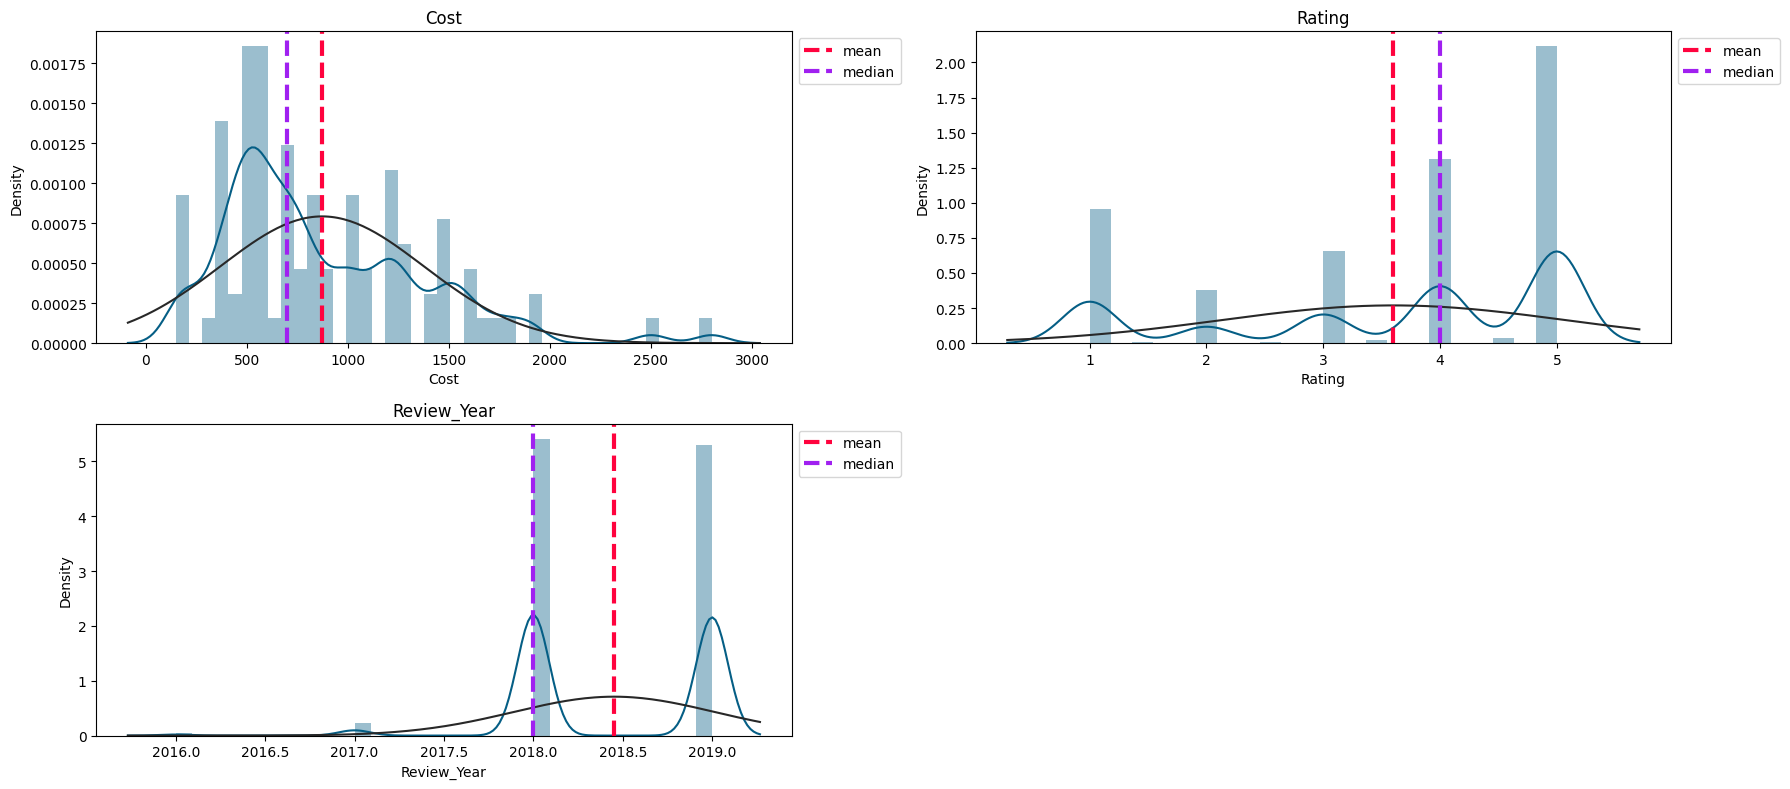

In [66]:
# Chart - 1 visualization code
plt.figure(figsize = (18,8));
for i,col in enumerate(['Cost','Rating','Review_Year']) :
    # plt.figure(figsize = (8,5));
    plt.subplot(2,2,i+1);
    sns.distplot(merged[col], color = '#055E85', fit = norm);
    feature = merged[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
    plt.title(f'{col.title()}');
    plt.tight_layout();

* All three are show skewness.
* Maximum restaurant show price range for 500.
* In 2018 number of reviews are more.

In [67]:
#geting the top 10 hotel that show maximum engagement
most_engaged_hotel = price_point.sort_values('Rating', ascending = False)

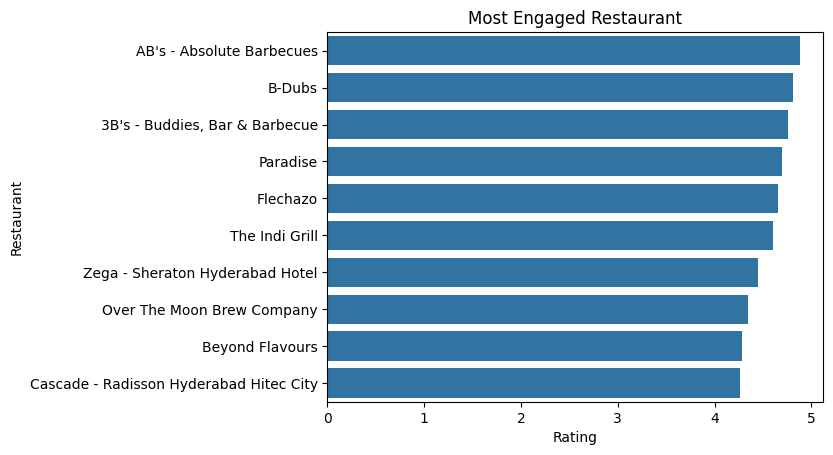

In [68]:
# Chart - 2 visualization code for most liked
sns.barplot(data = most_engaged_hotel[:10], x = 'Rating', y = 'Restaurant')
plt.title('Most Engaged Restaurant')
plt.show()

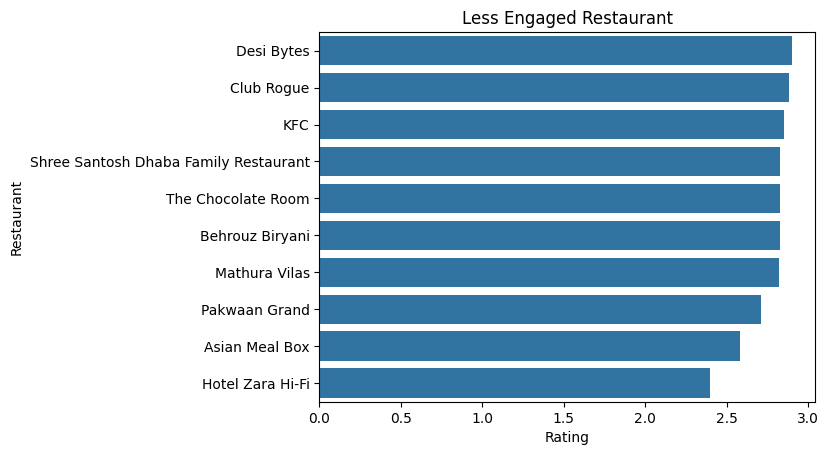

In [69]:
#chart for less liked hotels
sns.barplot(data = most_engaged_hotel[-10:], x = 'Rating', y = 'Restaurant')
plt.title('Less Engaged Restaurant')
plt.show()

AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.

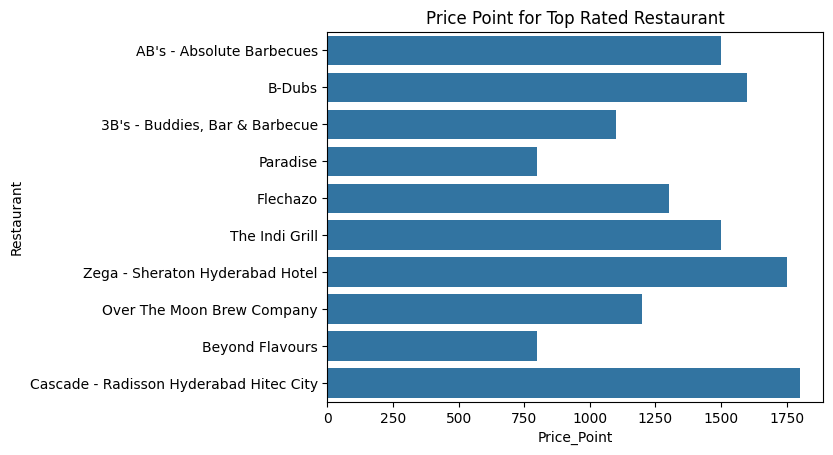

In [70]:
# Chart - 3 visualization code for price point of high rated restaurant
sns.barplot(data = most_engaged_hotel[:10], x = 'Price_Point', y = 'Restaurant')
plt.title('Price Point for Top Rated Restaurant')
plt.show()

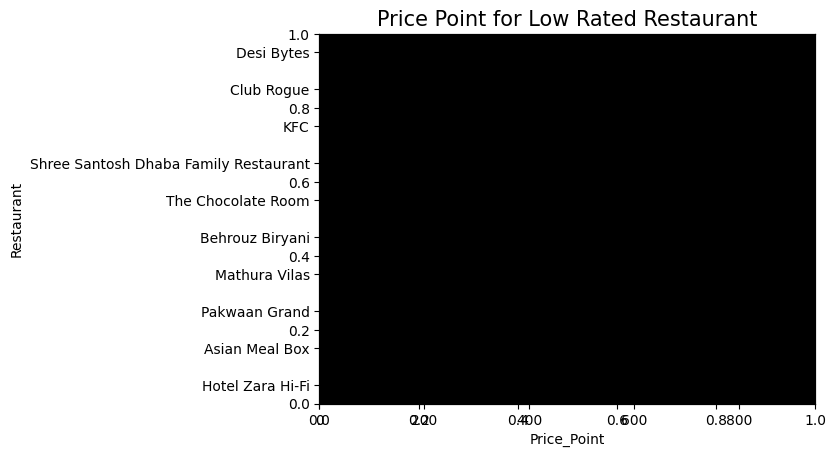

In [71]:
#visualization code for price point of low rated restaurant
sns.barplot(data = most_engaged_hotel[-10:], x = 'Price_Point', 
            y = 'Restaurant',palette = 'hsv')
plt.title('Price Point for Low Rated Restaurant', size = 15)
# Setting the background color of the plot
# using set_facecolor() method
ax = plt.axes()
ax.set_facecolor("black")
plt.show()

In [72]:
#list of all cuisine
cuisine_list = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Cuisine'].tolist()[:5]

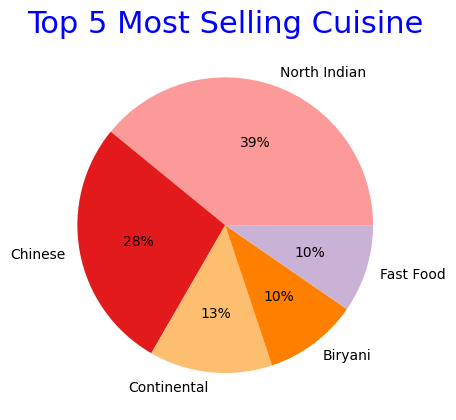

In [73]:
# Chart - 4 visualization code pie chart for top 5 mpst selling cuisine
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = cuisine_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[4:9]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'blue')
plt.show()

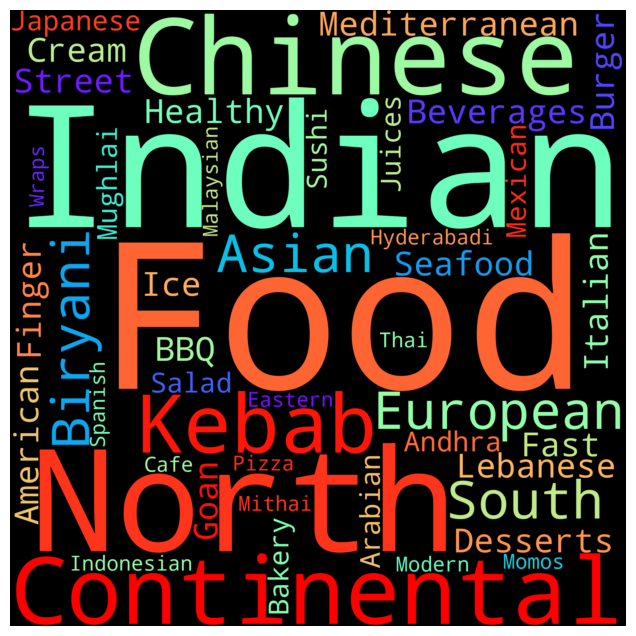

In [74]:
#wordcloud for Cuisine
# storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in cuisine_df.Cuisine )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,
                       colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

In [75]:
# # Aternate way to do the same task

# #creating variable to store restaurant and cuisine from hotel dataset
# cproduct = hotel[['Restaurant','Cost',	'Cuisines']].copy()
# #splitting cuisines 
# cproduct['Cuisines'] = cproduct['Cuisines'].str.split(',')
# #exploding the cuisine list from above to separate row
# cproduct = cproduct.explode('Cuisines')
# #removing trailing spaces
# cproduct['Cuisines'] = cproduct['Cuisines'].apply(lambda x: x.strip())
# #grouping cuisines and then making list of restaurants
# cprod = cproduct.groupby('Cuisines')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
# # cproduct['Cuisines'].unique()
# cprod['Restaurant_Count'] = cprod['Restaurant'].apply(lambda x: len(x))
# cprod[cprod['Restaurant_Count']==1].sort_values('Restaurant_Count', ascending = False)

Based on the above chart it is clear that most of the hotel sold North Indian food followed by chinese.

In [76]:
#list of all collection
collection_list = Collections_df.sort_values('Number of Restaurants', 
                          ascending = False)['Tags'].tolist()[:5]

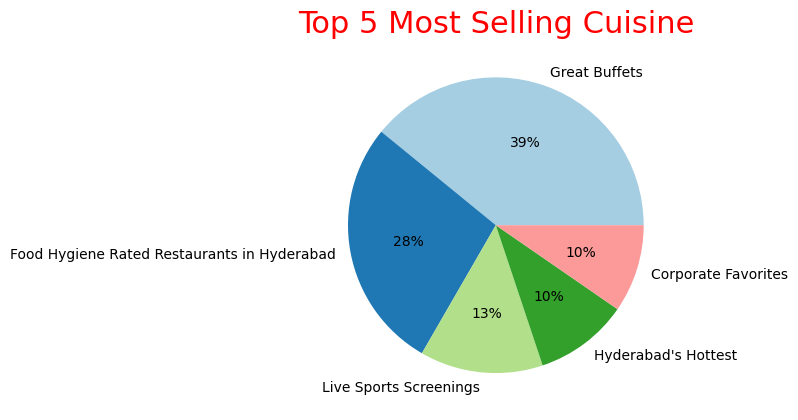

In [77]:
# Chart - 5 visualization code pie chart for top 5 mpst selling cuisine
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = collection_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'red')
plt.show()

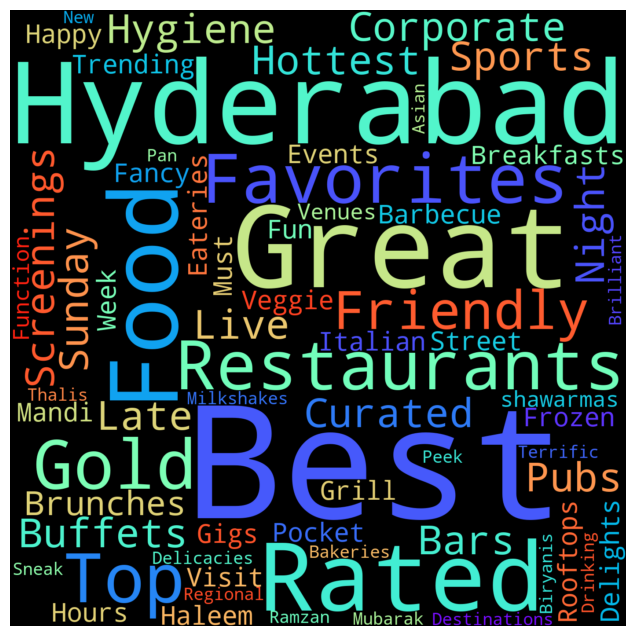

In [78]:
#wordcloud for Cuisine
# storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in Collections_df.Tags )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, 
                      colormap='rainbow', background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

Great Buffets is the most frequently used tags and other tags like great, best, north, Hyderabad is also used in large quantity.

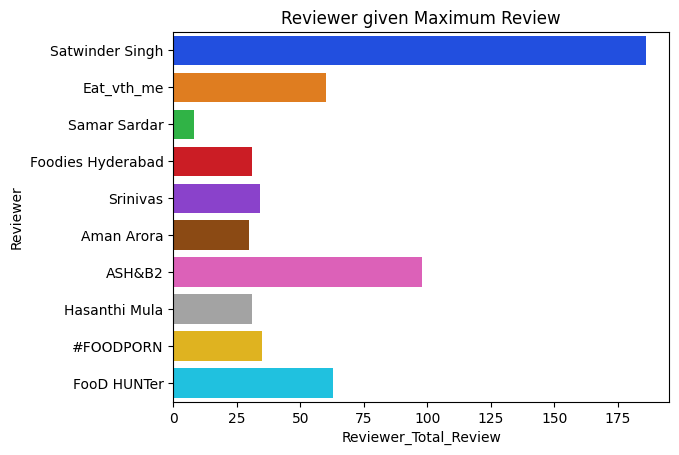

In [79]:
# Chart - 6 visualization code for most review
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Total_Review',
            y = 'Reviewer', palette='bright')
plt.title('Reviewer given Maximum Review')
plt.show()

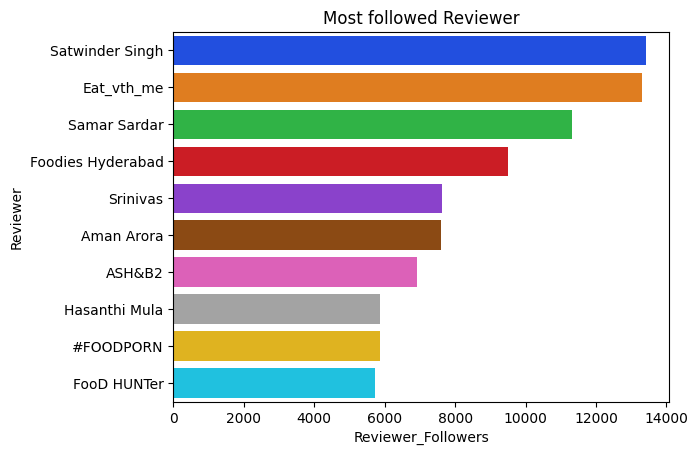

In [80]:
# visualization code for most review follower
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Followers', 
            y = 'Reviewer',palette='bright')
plt.title('Most followed Reviewer')
plt.show()

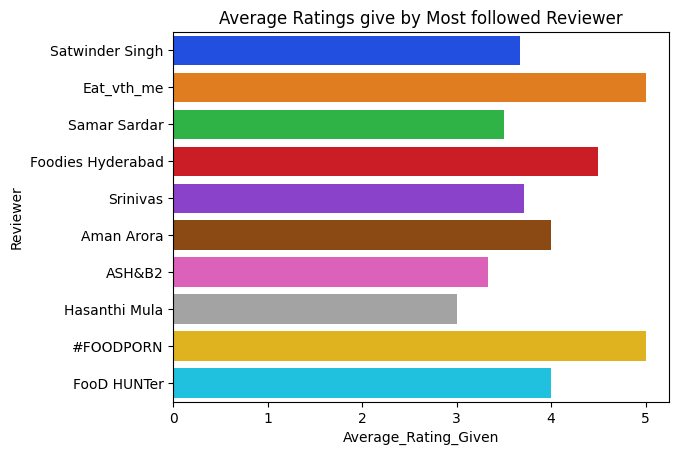

In [81]:
# visualization code for average rating given by most followed reviewer
sns.barplot(data = most_followed_reviewer[:10], x = 'Average_Rating_Given', 
            y = 'Reviewer',palette='bright')
plt.title('Average Ratings give by Most followed Reviewer')
plt.show()

Satwinder singh is the most popular critic who has maximum number of follower and on an average he give 3.5 rating.

In [82]:
#extracting name and price 

price_of_hotel = hotel.sort_values('Cost', ascending = False)[['Restaurant','Cost']]

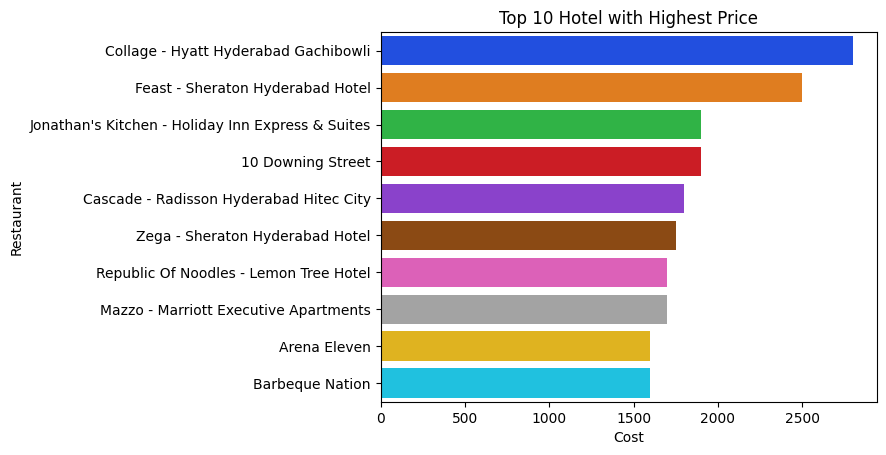

In [83]:
# Chart - 7 visualization code for howtel with maximum price
sns.barplot(data = price_of_hotel[:10], x = "Cost", y='Restaurant', palette = 'bright')
plt.title('Top 10 Hotel with Highest Price')
plt.show()

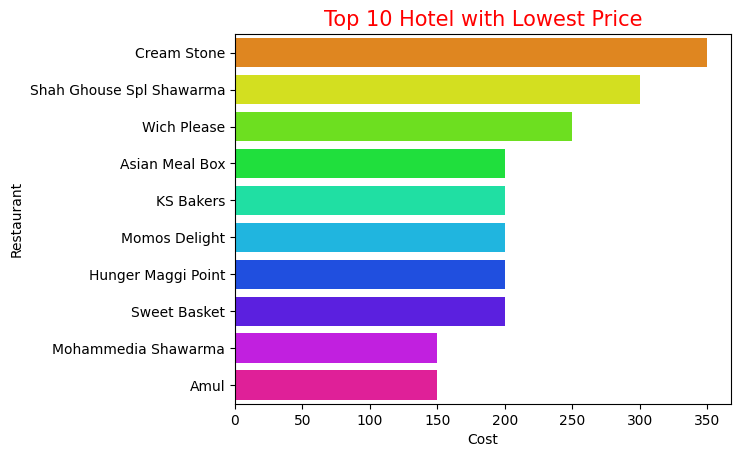

In [84]:
#hotel with lowest price
sns.barplot(data = price_of_hotel[-10:], x = "Cost", y='Restaurant', palette = 'hsv')
plt.title('Top 10 Hotel with Lowest Price', size =15, color = 'red')
plt.show()

In [85]:
#merging average rating and cost to find rating for expensive hotel
expected_revenue = avg_hotel_rating.merge(hotel[['Restaurant','Cost']], on = 'Restaurant')
#calculating expected revenue based on total review recieved
expected_revenue['Expected_Revenue'] = expected_revenue['Total_Review'] * expected_revenue['Cost']


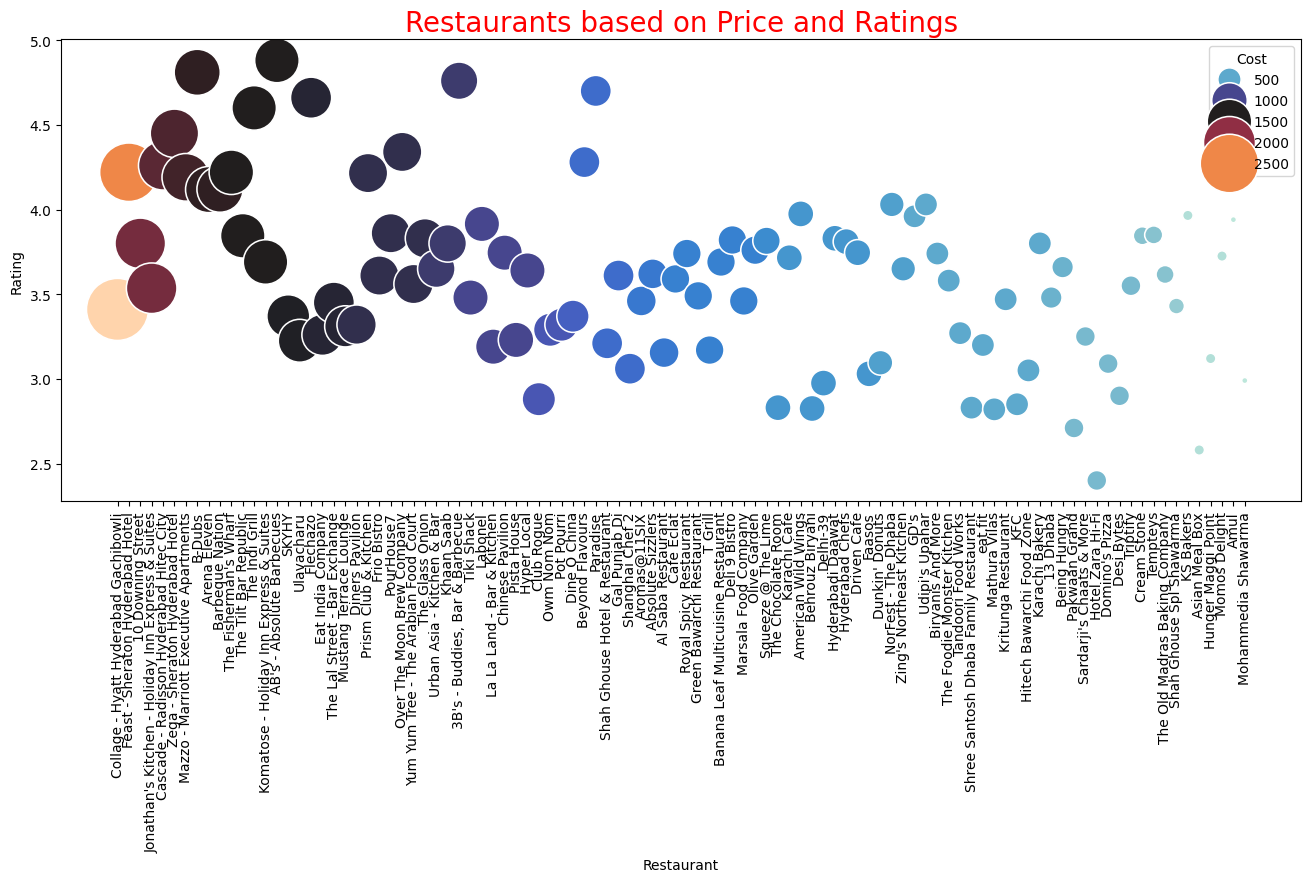

In [86]:
#chart for rating based on price and hotel
plt.figure(figsize=(16,6))
data = expected_revenue.sort_values('Cost', ascending  = False)
sns.scatterplot(data= data, x= "Restaurant", y="Rating", size="Cost", 
                hue = 'Cost',legend=True, sizes=(20, 2000),palette ="icefire")
plt.xticks(rotation=90)
plt.title('Restaurants based on Price and Ratings',size=20,color = 'red')
plt.show()

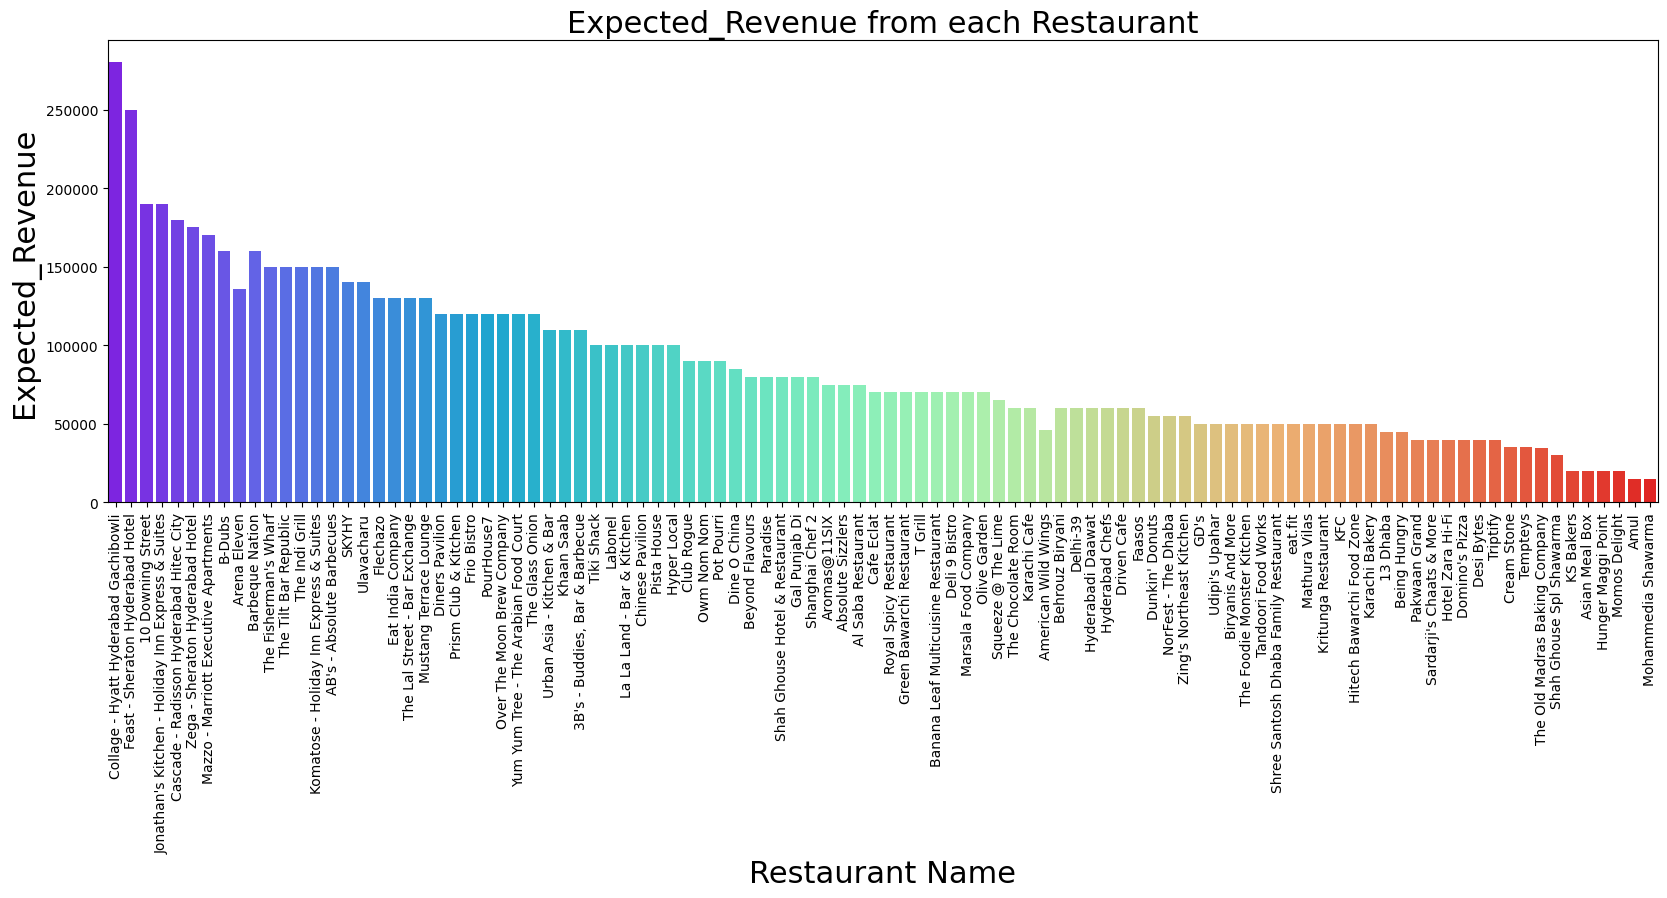

In [87]:
#chart to understand expected revenue
fig = plt.figure(figsize=[20,6])
sns.barplot(data= data, x='Restaurant', y= 'Expected_Revenue', palette ="rainbow")
plt.title("Expected_Revenue from each Restaurant", size = 22)
plt.xlabel('Restaurant Name', size = 22)
plt.xticks(rotation=90)
plt.ylabel('Expected_Revenue', size = 22)
plt.show()

Based on the above chart it is clear that restaurant Collage - Hyatt Hyderabad Gachibowli is most expensive restaurant in the locality which has a price of 2800 for order and has 3.5 average rating.

Hotels like Amul and Mohammedia Shawarma are least expensive with price of 150 and has 3.9 average rating.


In [88]:
# Convert all columns to numeric, non-numeric columns will become NaN
merged_numeric = merged.apply(pd.to_numeric, errors='coerce')

# Drop columns that were entirely non-numeric (i.e., all NaN after conversion)
merged_numeric = merged_numeric.dropna(axis=1, how='all')


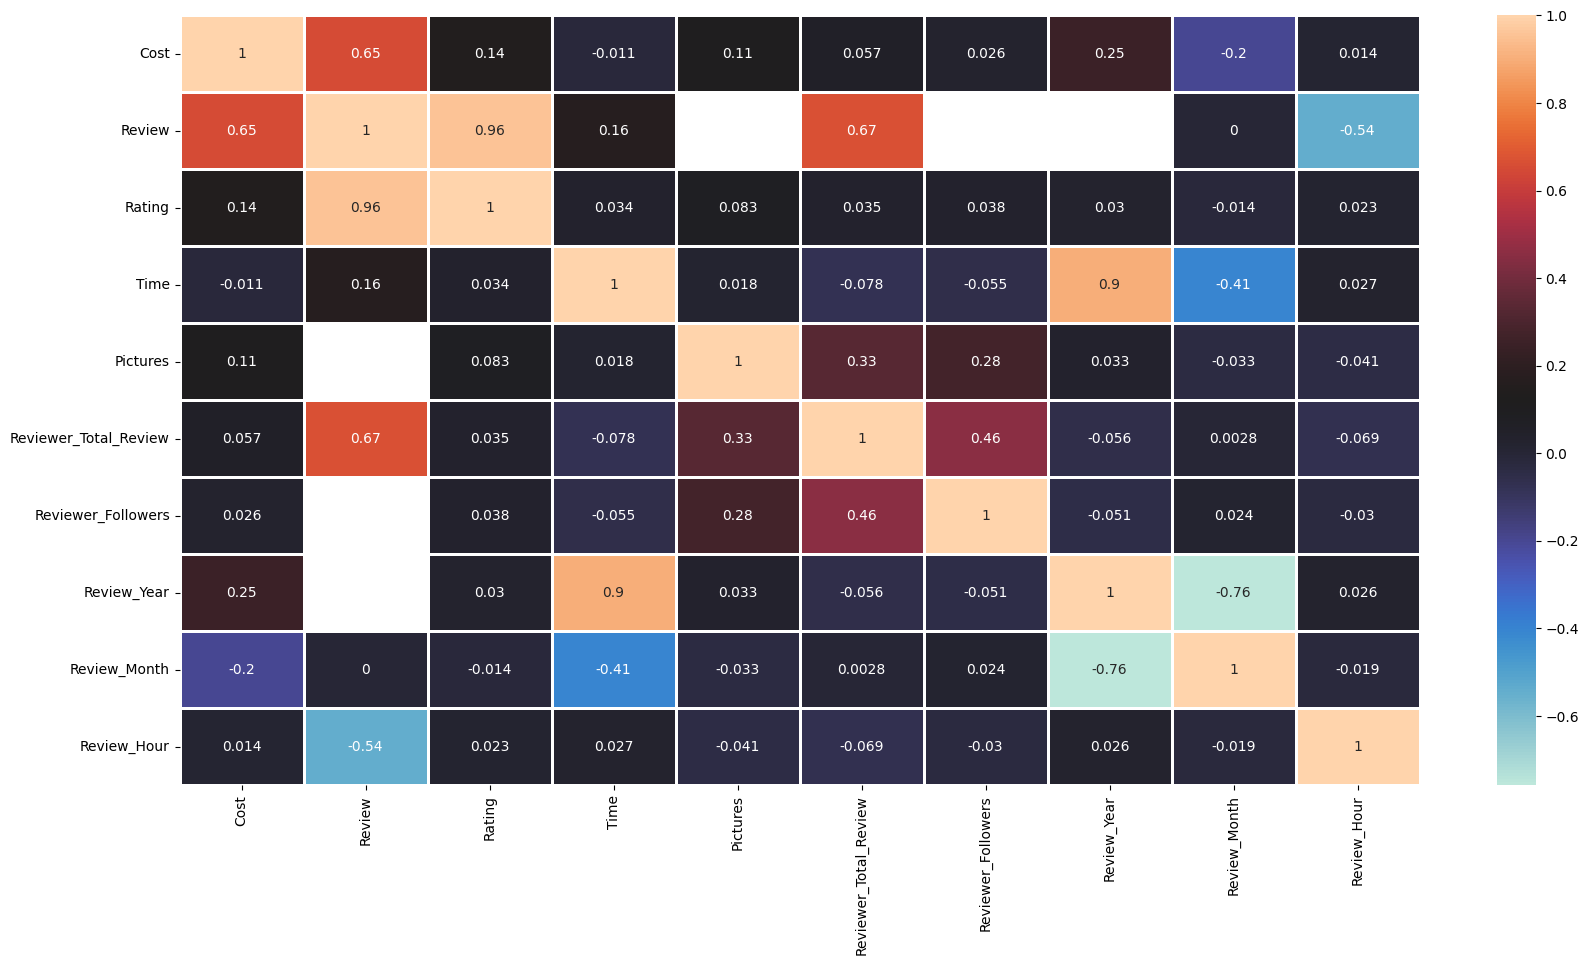

In [89]:
# Correlation Heatmap visualization code
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(merged_numeric.corr(),ax = ax, annot=True, cmap = 'icefire', linewidths = 1)

plt.show()

From the above correlation heatmap, it can be depicted that few features are correlated, like reviewer total review is related to reviewer follower and again reviewer total review is related to pictures.

Rest all correlation can be depicted from the above chart.


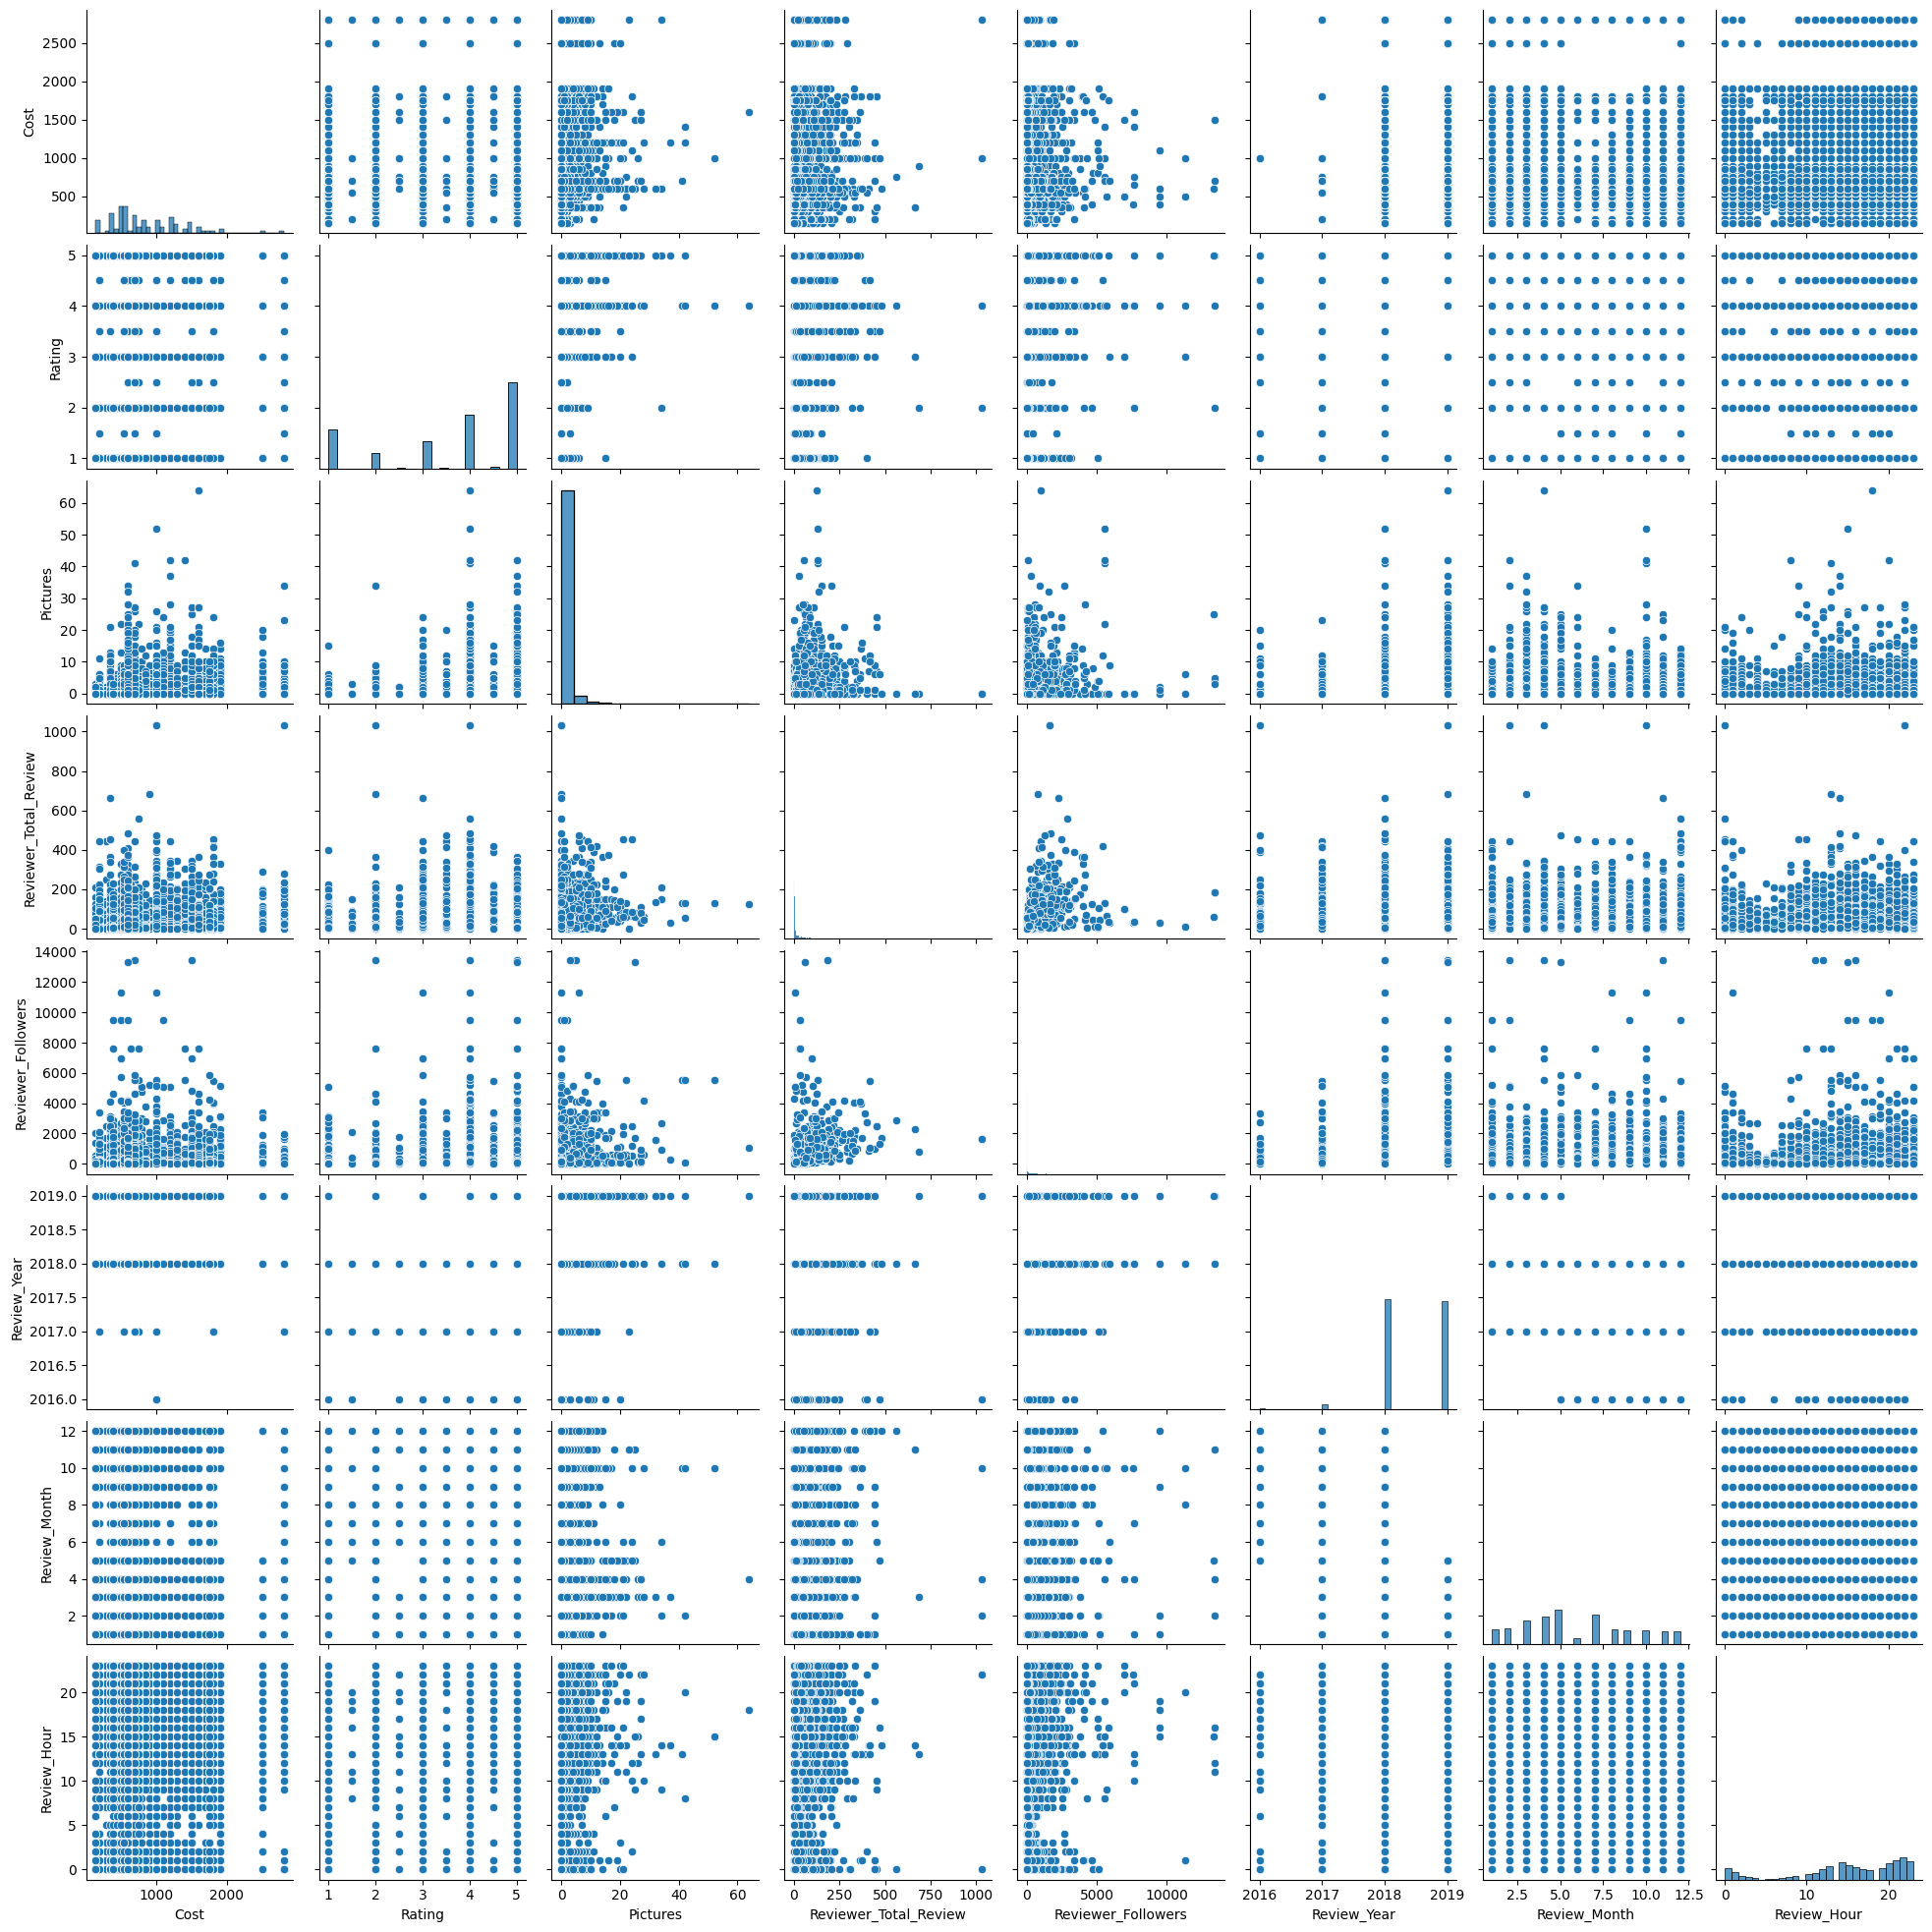

In [90]:
# Pair Plot visualization code
sns.pairplot(merged)

It can be seen that there is no significant correlation between the given features in the merged dataframe.

## Hypothesis Testing

* The cost of a restaurant is positively correlated with the rating it receives.
* Restaurants that are reviewed by reviewers with more followers will have a higher rating.
* Restaurants that offer a wider variety of cuisines will have a higher rating.

#### Hypothetical Statement - 1 

---

The cost of a restaurant is positively correlated with the rating it receives.

* Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)
* Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression Analysis

In [91]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Cost', data= merged).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")

Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it receives.


#### Hypothetical Statement - 2

---
Restaurants that are reviewed by reviewers with more followers will have a higher rating.

* Null hypothesis: The number of followers a reviewer has has no effect on the rating of a restaurant. (H0: 𝛽1 = 0) 
* Alternative hypothesis: Alternative Hypothesis: The number of followers a reviewer has has a positive effect on the rating of a restaurant. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression test

In [92]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Reviewer_Followers', data = merged).fit()

# print the summary of the model
# print(model.summary())

# extract p-value of coefficient for Reviewer_Followers
p_value = model.pvalues[1]

if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Reject Null Hypothesis


#### Hypothetical Statement - 3 

---

Restaurants that offer a wider variety of cuisines will have a higher rating.

* Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)
* Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)
* Test : Chi-Squared Test

In [93]:
pd.crosstab(merged['Cuisines'], merged['Rating'])[:1]

Rating    1.00  1.50  2.00  2.50  3.00  3.50  4.00  4.50  5.00
Cuisines                                                      
American     1     0     1     0     2     0     8     0    88

In [94]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged['Cuisines'], merged['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


## Feature Engineering & Data Pre-processing

In [95]:
#deleting duplicate value from review dataset
review = review.drop_duplicates()

In [96]:
#final check after dropping duplicates
print(f"Anymore duplicate left ? {review.duplicated().value_counts()}, unique values with {len(review[review.duplicated()])} duplication")

Anymore duplicate left ? False    9964
Name: count, dtype: int64, unique values with 0 duplication




---

restuarent Dataset

In [97]:
# Handling Missing Values & Missing Value Imputation
hotel.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [98]:
#checking the null value in timing
hotel[hotel['Timings'].isnull()]

Restaurant                                              Links  Cost  \
30  Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...   900   

   Collections                            Cuisines Timings  
30         NaN  Andhra, South Indian, North Indian     NaN

In [99]:
#filling null value in timings column
hotel.Timings.fillna(hotel.Timings.mode()[0], inplace = True)

In [100]:
hotel[hotel['Timings'].isnull()]

Empty DataFrame
Columns: [Restaurant, Links, Cost, Collections, Cuisines, Timings]
Index: []

In [101]:
#checking null values in Collections
missing_percentage = ((hotel['Collections'].isnull().sum())/(len(hotel['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')

Percentage of missing value in Collections is 51.43%


In [102]:
#dropping collection column since has more than 50% of null values
hotel.drop('Collections', axis = 1, inplace = True)

In [103]:
#final checking of missing value
hotel.isnull().sum()

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64



---

Review Dataset

In [104]:
#review missing value
review.isnull().sum()

Restaurant                  0
Reviewer                    2
Review                      9
Rating                      2
Metadata                    2
Time                        3
Pictures                    0
Reviewer_Total_Review       3
Reviewer_Followers       1581
Review_Year                 3
Review_Month                3
Review_Hour                 3
dtype: int64

In [105]:
#checking null reviewer
review[review['Reviewer'].isnull()]

Restaurant Reviewer Review  Rating Metadata Time  Pictures  \
8777  American Wild Wings      NaN    NaN     NaN      NaN  NaT         0   
9085         Arena Eleven      NaN    NaN     NaN      NaN  NaT         0   

      Reviewer_Total_Review  Reviewer_Followers  Review_Year  Review_Month  \
8777                    NaN                 NaN          NaN           NaN   
9085                    NaN                 NaN          NaN           NaN   

      Review_Hour  
8777          NaN  
9085          NaN

In [106]:
#checking null Reviewer_Total_Review
review[review['Reviewer_Total_Review'].isnull()]

Restaurant Reviewer Review  Rating Metadata Time  Pictures  \
7601                 4.00     4.00   4.00    4.00     4.00  NaT         4   
8777  American Wild Wings      NaN    NaN     NaN      NaN  NaT         0   
9085         Arena Eleven      NaN    NaN     NaN      NaN  NaT         0   

      Reviewer_Total_Review  Reviewer_Followers  Review_Year  Review_Month  \
7601                    NaN                 NaN          NaN           NaN   
8777                    NaN                 NaN          NaN           NaN   
9085                    NaN                 NaN          NaN           NaN   

      Review_Hour  
7601          NaN  
8777          NaN  
9085          NaN

In [107]:
# dropping null values in reviewer and Reviewer_Total_Review column as all values are null for those column
review = review.dropna(subset=['Reviewer','Reviewer_Total_Review'])

In [108]:
#again checking the remaining values
null_counts = [(x, a) for x, a in review.isnull().sum().items() if a > 0]

# Print the columns with null values
null_counts

[('Review', 7), ('Reviewer_Followers', 1578)]

In [109]:
#filling null values in review and reviewer follower column
review = review.fillna({"Review": "No Review", "Reviewer_Followers": 0})

In [110]:
# final checking null values
review.isnull().sum()

Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_Year              0
Review_Month             0
Review_Hour              0
dtype: int64

In [111]:
#merging both dataset
merged = hotel.merge(review, on = 'Restaurant')
merged.shape

(9961, 16)

## Handling Outliers

In [112]:
#Anamoly detection 
from sklearn.ensemble import IsolationForest
#checking for normal distribution 
print("Skewness - Cost: %f" % merged['Cost'].skew())
print("Kurtosis - Cost: %f" % merged['Cost'].kurt())
print("Skewness - Reviewer_Followers: %f" % merged['Reviewer_Followers'].skew())
print("Kurtosis - Reviewer_Followers: %f" % merged['Reviewer_Followers'].kurt())

Skewness - Cost: 1.153637
Kurtosis - Cost: 1.571590
Skewness - Reviewer_Followers: 10.092703
Kurtosis - Reviewer_Followers: 151.312960


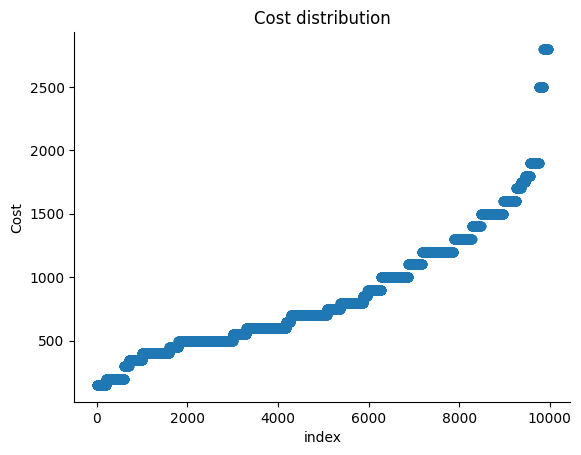

In [113]:
#plotting graph for cost
plt.scatter(range(merged.shape[0]), np.sort(merged['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()


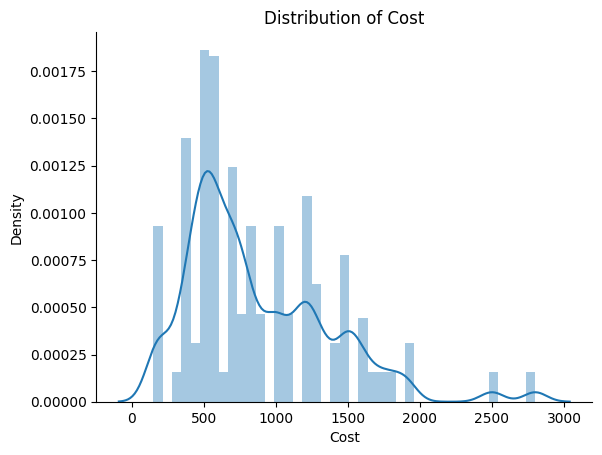

In [114]:
#distribution of cost
sns.distplot(merged['Cost'])
plt.title("Distribution of Cost")
sns.despine()

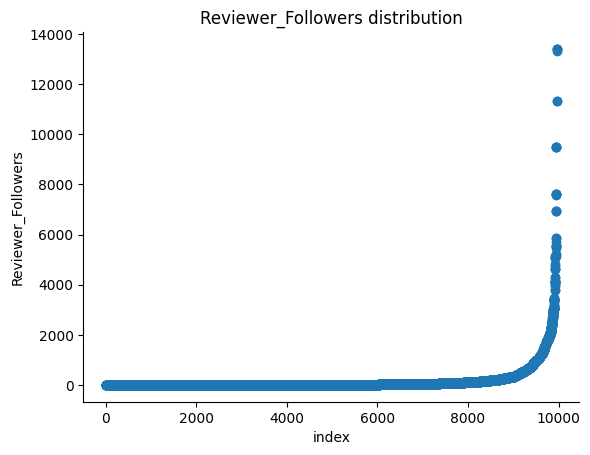

In [115]:
#plot for reviewer follower
plt.scatter(range(merged.shape[0]), np.sort(merged['Reviewer_Followers'].values))
plt.xlabel('index')
plt.ylabel('Reviewer_Followers')
plt.title("Reviewer_Followers distribution")
sns.despine()

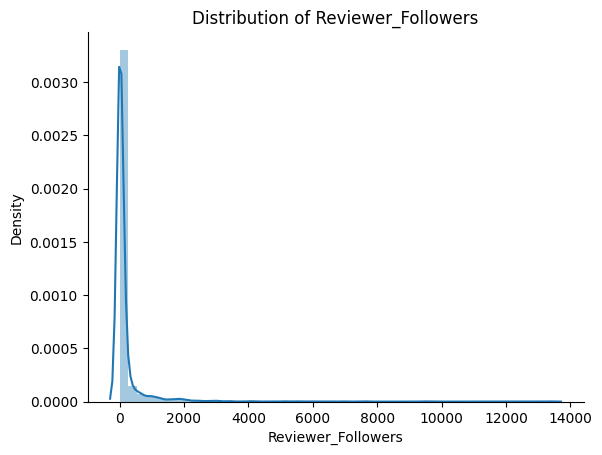

In [116]:
#distribution of Reviewer_Followers
sns.distplot(merged['Reviewer_Followers'])
plt.title("Distribution of Reviewer_Followers")
sns.despine()

In [117]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)

isolation_forest.fit(merged['Cost'].values.reshape(-1, 1))

merged['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merged['Cost'].values.reshape(-1, 1))
merged['outlier_univariate_Cost'] = isolation_forest.predict(merged['Cost'].values.reshape(-1, 1))

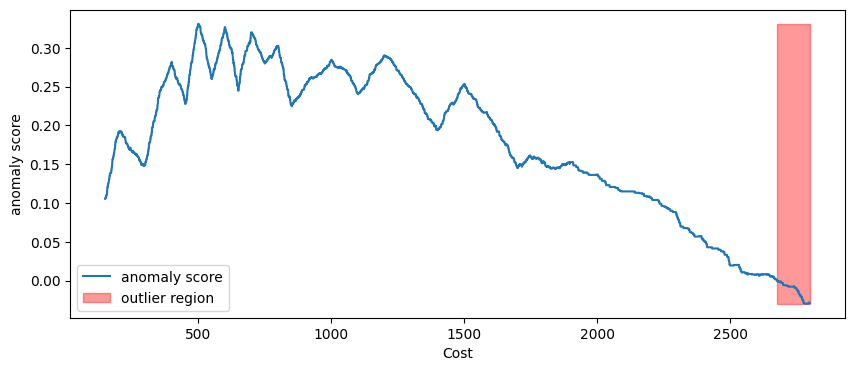

In [118]:
#chart to visualize outliers
xx = np.linspace(merged['Cost'].min(), merged['Cost'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

In [119]:
#isolation forest for anamoly detection of reviewer follower
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['anomaly_score_univariate_follower'] = isolation_forest.decision_function(
    merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['outlier_univariate_follower'] = isolation_forest.predict(
    merged['Reviewer_Followers'].values.reshape(-1, 1))


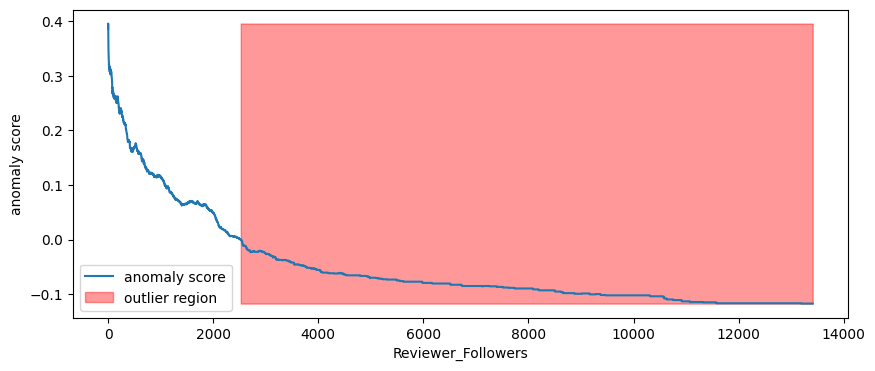

In [120]:
#chat to visualize outliers in reviwer follower column
xx = np.linspace(merged['Reviewer_Followers'].min(), merged['Reviewer_Followers'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer_Followers')
plt.show();

In [121]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in merged.describe().drop("Time",axis=1).columns:
  print(abs(merged[i].mean()-merged[i].median()))
  if abs(merged[i].mean()-merged[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

171.58417829535188
0.39895592811966685
0.7514305792591105
19.992069069370544
156.00843288826422
0.4520630458789583
1.0179700833249674
0.8122678445939169
0.01921380524177696
0.020078305391024953
0.022594100314032917
0.01947595622929421
Symmetric Distributed Features : - ['anomaly_score_univariate_Cost', 'outlier_univariate_Cost', 'anomaly_score_univariate_follower', 'outlier_univariate_follower']
Skew Symmetric Distributed Features : - ['Cost', 'Rating', 'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers', 'Review_Year', 'Review_Month', 'Review_Hour']


In [122]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge

In [123]:
# Restricting the data to lower and upper boundary for cost in hotel dataset
#lower limit capping
hotel.loc[hotel['Cost']<= outlier_treatment_skew(df=hotel,
  feature='Cost')[1], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[1]

#upper limit capping
hotel.loc[hotel['Cost']>= outlier_treatment_skew(df=hotel,
  feature='Cost')[0], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[0]

In [124]:
# Restricting the data to lower and upper boundary for Reviewer followers in review dataset
#lower limit capping
review.loc[review['Reviewer_Followers']<= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[1], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[1]

#upper limit capping
review.loc[review['Reviewer_Followers']>= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[0], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[0]

In [125]:
#dropping the columns created while outliers treatment
merged.drop(columns =['anomaly_score_univariate_Cost','outlier_univariate_Cost',
  'anomaly_score_univariate_follower','outlier_univariate_follower'], inplace = True)

Since cost and reviewer follower feature or column show positive skewed distribution and using isolation forest found they have outliers, hence using the capping technique instead of removing the outliers, capped outliers with the highest and lowest limit using IQR method.



### Categorical Encoding

In [126]:
# Encode your categorical columns

#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy = hotel[['Restaurant','Cuisines']]
#spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
#using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

#checking if the values are correct
# cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].eq(1)[:5].T
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]

#replacing cuisines_ from columns name - for better understanding run seperatly

# cluster_dummy.columns = cluster_dummy.columns.str.replace(" ","")
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")
# cluster_dummy = cluster_dummy.groupby(cluster_dummy.columns, axis=1).sum()

#grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

In [127]:
#total cuisine count 
hotel['Total_Cuisine_Count'] = hotel['Cuisines'].apply(lambda x : len(x.split(',')))

In [128]:
#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
hotel = hotel.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
hotel.head(1)

Restaurant                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   

                                         Timings  Total_Cuisine_Count  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                    6   

   Average_Rating  
0            4.28

In [129]:
#adding cost column to the new dataset 
cluster_dummy = hotel[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count'
                      ]].merge(cluster_dummy, on = 'Restaurant')

In [130]:
cluster_dummy.shape

(100, 48)

In [131]:
cluster_dummy.head()

Restaurant  Cost  Average_Rating  Total_Cuisine_Count  \
0                 Beyond Flavours   800            4.28                    6   
1                        Paradise   800            4.70                    3   
2                        Flechazo  1300            4.66                    4   
3  Shah Ghouse Hotel & Restaurant   800            3.21                    5   
4      Over The Moon Brew Company  1200            4.34                    5   

   American  Andhra  Arabian  Asian  BBQ  Bakery  ...  North Indian  Pizza  \
0         0       0        0      0    0       0  ...             1      0   
1         0       0        0      0    0       0  ...             1      0   
2         0       0        0      1    0       0  ...             1      0   
3         0       0        0      0    0       0  ...             1      0   
4         0       0        0      1    0       0  ...             1      0   

   Salad  Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
0      0        0             1        0            0      0     0      0  
1      0        0             0        0            0      0     0      0  
2      0        0             0        0            0      0     0      0  
3      0        1             0        0            0      0     0      0  
4      0        0             0        0            0      0     0      0  

[5 rows x 48 columns]



---

Alternate Method for creating dummies

In [132]:
#creating data frame for categorial encoding
cluster_df = hotel[['Restaurant','Cuisines','Cost','Average_Rating','Total_Cuisine_Count']]

In [133]:
#creating new dataframe for clustering 
cluster_df = pd.concat([cluster_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [135]:
cluster_df.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                            Cuisines    Cost  Average_Rating  \
0  Chinese, Continental, Kebab, European, South I...  800.00            4.28   
1                     Biryani, North Indian, Chinese  800.00            4.70   
2       Asian, Mediterranean, North Indian, Desserts 1300.00            4.66   
3  Biryani, North Indian, Chinese, Seafood, Bever...  800.00            3.21   
4  Asian, Continental, North Indian, Chinese, Med... 1200.00            4.34   

   Total_Cuisine_Count Chinese Continental Kebab European South Indian  ...  \
0                 6.00     NaN         NaN   NaN      NaN          NaN  ...   
1                 3.00     NaN         NaN   NaN      NaN          NaN  ...   
2                 4.00     NaN         NaN   NaN      NaN          NaN  ...   
3                 5.00     NaN         NaN   NaN      NaN          NaN  ...   
4                 5.00     NaN         NaN   NaN      NaN          NaN  ...   

  Spanish Wraps Thai Indonesian Modern Indian Momos Pizza North Eastern  \
0     NaN   NaN  NaN        NaN           NaN   NaN   NaN           NaN   
1     NaN   NaN  NaN        NaN           NaN   NaN   NaN           NaN   
2     NaN   NaN  NaN        NaN           NaN   NaN   NaN           NaN   
3     NaN   NaN  NaN        NaN           NaN   NaN   NaN           NaN   
4     NaN   NaN  NaN        NaN           NaN   NaN   NaN           NaN   

  Mithai Malaysian  
0    NaN       NaN  
1    NaN       NaN  
2    NaN       NaN  
3    NaN       NaN  
4    NaN       NaN  

[5 rows x 49 columns]

In [136]:
#creating categorial feature for cuisine
#iterate over every row in the dataframe
for i, row in cluster_df.iterrows():
  # iterate over the new columns 
  for column in list(cluster_df.columns):
      if column not in ['Restaurant','Cost','Cuisines','Average_Rating','Total_Cuisine_Count']:
        # checking if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #assign it as 1 else 0
          cluster_df.loc[i,column] = 1
        else:
          cluster_df.loc[i,column] = 0

In [137]:
#result from encoding
cluster_df.head(2)

Restaurant                                           Cuisines   Cost  \
0  Beyond Flavours  Chinese, Continental, Kebab, European, South I... 800.00   
1         Paradise                     Biryani, North Indian, Chinese 800.00   

   Average_Rating  Total_Cuisine_Count Chinese Continental Kebab European  \
0            4.28                 6.00       1           1     1        1   
1            4.70                 3.00       1           0     0        0   

  South Indian  ... Spanish Wraps Thai Indonesian Modern Indian Momos Pizza  \
0            1  ...       0     0    0          0             0     0     0   
1            0  ...       0     0    0          0             0     0     0   

  North Eastern Mithai Malaysian  
0             0      0         0  
1             0      0         0  

[2 rows x 49 columns]

### 4. Textual Data Preprocessing - Review
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [138]:
#creating new df for text processing of sentiment analysis
sentiment_df = review[['Reviewer','Restaurant','Rating','Review']]
#analysing two random sample
sentiment_df.sample(2)

Reviewer                  Restaurant  Rating  \
4378  Susmita Basu  The Foodie Monster Kitchen    4.00   
2528        Brunda                  Tiki Shack    5.00   

                                                 Review  
4378                     quantity less but quality good  
2528  Yes..... Tiki shack.. my most loving pub in th...

In [139]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [140]:
sentiment_df.sample(2)

index           Reviewer                  Restaurant  Rating  \
7948   7948              Vivek                Olive Garden    4.00   
4380   4380  Prachita Jayaswal  The Foodie Monster Kitchen    4.00   

                                                 Review  
7948  An under rated restaurant.\n\nI've been to thi...  
4380  the waffles are really good. it is served in c...

In [141]:
# Expand Contraction
import contractions
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

In [142]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

In [143]:
sentiment_df.head()

index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours    5.00   
1      1  Anusha Tirumalaneedi  Beyond Flavours    5.00   
2      2       Ashok Shekhawat  Beyond Flavours    5.00   
3      3        Swapnil Sarkar  Beyond Flavours    5.00   
4      4                Dileep  Beyond Flavours    5.00   

                                              Review  
0  the ambience was good, food was quite good . h...  
1  ambience is too good for a pleasant evening. s...  
2  a must try.. great food great ambience. thnx f...  
3  soumen das and arun was a great guy. only beca...  
4  food is good.we ordered kodi drumsticks and ba...

In [144]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [145]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(5)

index      Reviewer                           Restaurant  Rating  \
3643   3643    Siva Kumar  Banana Leaf Multicuisine Restaurant    4.00   
2474   2474  Rashmi Rekha                                SKYHY    5.00   
9477   9477   Rupsa Sinha                           Desi Bytes    5.00   
15       15  Abhay Sharma                      Beyond Flavours    5.00   
399     399       Rachana       Shah Ghouse Hotel & Restaurant    4.00   

                                                 Review  
3643  this was the first place where i had buffet in...  
2474  courteous staff good food and lovely vibes\nsa...  
9477                 felt like having home made chicken  
15    food and ambience is fantastic waiter manav ma...  
399   been here 3 to 4 times earlier too this place ...

In [146]:
# Remove URLs & Remove words and digits contain digits
import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [147]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
hotel['Location'] = hotel['Links'].apply(get_location)
hotel.sample(2)

Restaurant  \
57                    Being Hungry   
3   Shah Ghouse Hotel & Restaurant   

                                                Links  Cost  \
57  https://www.zomato.com/hyderabad/being-hungry-...   450   
3   https://www.zomato.com/hyderabad/shah-ghouse-h...   800   

                                             Cuisines  \
57                              North Indian, Chinese   
3   Biryani, North Indian, Chinese, Seafood, Bever...   

                              Timings  Total_Cuisine_Count  Average_Rating  \
57  12 Noon to 3 PM, 7 PM to 11:30 PM                    2            3.66   
3                     12 Noon to 2 AM                    5            3.21   

     Location  
57  hyderabad  
3   hyderabad

In [148]:
# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [149]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [150]:
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [151]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [152]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [153]:
#random sample 
sentiment_df.sample(2)

index                Reviewer         Restaurant  Rating  \
7109   7109  Sai Prasanth Nandagiri  Eat India Company    2.00   
9491   9491           Vamsi Krishna         Desi Bytes    3.00   

                                                 Review  
7109  lunch friends today first things ambiance seem...  
9491                                         late hotel

In [155]:
# Rephrase Text
from nltk.corpus import wordnet

#function to create rephrase sentence
def rephrase_sentence(sentence):
    # Tokenize the sentence
    tokens = nltk.word_tokenize(sentence)

    # Replace each token with its synonyms
    new_sentence = []
    for token in tokens:
        synonyms = wordnet.synsets(token)
        if synonyms:
            new_sentence.append(synonyms[0].lemmas()[0].name())
        else:
            new_sentence.append(token)

    # Join the tokens back into a sentence
    rephrased_sentence = " ".join(new_sentence)

    return rephrased_sentence

# apply the function to the 'Review' column 
# sentiment_df['Review'] = sentiment_df['Review'].apply(rephrase_sentence)


* **Not using** as it was not giving result as expected.

In [156]:
sentiment_df.sample(2)

index      Reviewer         Restaurant  Rating  \
2075   2075  Mitesh Patel           13 Dhaba    1.00   
9585   9585       ✔️ Sonu  Hyderabadi Daawat    2.00   

                                                 Review  
2075  get orderedi ordered dal makhni combo got comb...  
9585  average 👎 paya shor place must worth alongside...

### Tokenization

In [158]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [159]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

In [160]:
sentiment_df.sample(2)

index       Reviewer                           Restaurant  Rating  \
3651   3651  S. Chandransh  Banana Leaf Multicuisine Restaurant    5.00   
4395   4395   Amanjot Kaur           The Foodie Monster Kitchen    3.00   

                                                 Review  
3651  [good, quality, tasty, food, good, variety, re...  
4395  [pancakes, although, beautiful, plated, heart,...

In [161]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#stemming using snowballstemmer
# from nltk.stem import SnowballStemmer

# # Create a stemmer
# stemmer = SnowballStemmer("english")

# def stem_tokens(tokens):
#     stemmed_tokens = [stemmer.stem(token) for token in tokens]
#     return stemmed_tokens

# # Stem the 'Review' column
# sentiment_df['Review'] = sentiment_df['Review'].apply(stem_tokens)

In [162]:
#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)


In [163]:
sentiment_df.sample(2)

index          Reviewer      Restaurant  Rating  \
5454   5454  Pavan Aditya M S  Asian Meal Box    4.00   
3143   3143  Oindrila Rahaman     Pista House    4.00   

                                                 Review  
5454  [food, good, service, upto, mark, order, late,...  
3143  [place, recommended, local, friend, learning, ...

In [164]:
# sentiment_tfid = sentiment_df.copy()

# POS Taging
# sentiment_tfid['Review'] = sentiment_tfid['Review'].apply(nltk.pos_tag)
# sentiment_tfid.head()

Here I am **not performing POS** tagging as it was taking longer time when training.

### Text Vectorization

In [328]:
# tfidf 

# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

def custom_tokenizer(x):
    return x  # Assuming 'x' is already tokenized

# Initialize TfidfVectorizer with the custom tokenizer
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, lowercase=False)

# Fit the vectorizer (replace 'reviews' with your actual text data)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

In [170]:
#Bag of Words
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

#creating token dict
tokens_dict = gensim.corpora.Dictionary(tokenized_text)

# print (tokens_dict )
# tokens_dict.token2id

In [171]:
#using tokens_dict.doc2bow() to generate BoW features for each tokenized course
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

#creating a new text_bow dataframe based on the extracted BoW features
tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(sentiment_df["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)
bows_df.head()

doc_index           doc_id     token  bow
0          0  Beyond Flavours      also    1
1          0  Beyond Flavours  ambience    1
2          0  Beyond Flavours    brunch    1
3          0  Beyond Flavours     chill    1
4          0  Beyond Flavours      cost    1

Here I have used Tf-idf Vectorization technique.

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

The term frequency (tf) is the number of times a word appears in a document, while the inverse document frequency (idf) is a measure of how rare a word is across all documents in a collection. The intuition behind tf-idf is that words that appear frequently in a document but not in many documents across the collection are more informative and thus should be given more weight.

The mathematical formula for tf-idf is as follows:

tf-idf(t, d, D) = tf(t, d) * idf(t, D)

where t is a term (word), d is a document, D is a collection of documents, tf(t, d) is the term frequency of t in d, and idf(t, D) is the inverse document frequency of t in D.

The tf component of the weight assigns a value to a word based on how often it appears in the document, while the idf component assigns a value based on how rare the word is in the entire collection of documents. Tf-idf is commonly used in text classification and information retrieval tasks because it can help to down-weight the effect of common words and up-weight the effect of rare words which are more informative.

It also helps to reduce the dimensionality of the data and increases the weight of important words, thus providing more informative and robust feature set for the model to work on.

Text vectorization is the process of converting text data into numerical vectors that can be used as input for machine learning models.

There are several ways to vectorize text data, one of the most common methods is using Tf-idf Vectorization, other methods are bag-of-words (BoW - uses CountVectorizer), word2vec, or doc2vec model.

### Feature Manipulation & Selection

In [172]:
# Manipulate Features to minimize feature correlation and create new features
hotel.shape

(100, 8)

In [173]:
#columns for dataset
hotel.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings',
       'Total_Cuisine_Count', 'Average_Rating', 'Location'],
      dtype='object')

* Dropping column like link as from link location was extracted, dropping location as it does not have variability only had hyderabad as 99% values. Then dropping Cuisines column as cuisine from the feature are extracted as new feature.

In [174]:
#dropping columns
hotel = hotel.drop(columns = ['Links','Location'], axis = 1)

In [175]:
hotel.shape

(100, 6)

In [176]:
#creating new dataframe which will be used for clustering i.e dropping the unimportant column
#this dataset was used earlier while categorial encoding hence using it for clustering
cluster_df.shape

(100, 49)

In [177]:
#dropping cuisine and restaurant from cluster_df
cluster_df = cluster_df.drop(columns = ['Restaurant','Cuisines'], axis = 1)

In [178]:
cluster_df.sample(1)

Cost  Average_Rating  Total_Cuisine_Count Chinese Continental Kebab  \
65 1500.00            3.69                 4.00       1           0     0   

   European South Indian North Indian Biryani  ... Spanish Wraps Thai  \
65        0            0            1       0  ...       0     0    0   

   Indonesian Modern Indian Momos Pizza North Eastern Mithai Malaysian  
65          0             0     0     0             0      0         0  

[1 rows x 47 columns]

In [179]:
#alternatively using other variable created earlier during categorial creation
cluster_dummy.shape

(100, 48)

In [180]:
#review data shape
review.shape

(9961, 12)

In [181]:
#review column
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers',
       'Review_Year', 'Review_Month', 'Review_Hour'],
      dtype='object')

In [182]:
#creating new binary feature called sentiment based on rating which has 1 = positive and 0 = negative
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(
    lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)  #1 = positive # 0 = negative

In [183]:
#sentiment data frame
sentiment_df.sample(2)

index       Reviewer    Restaurant  Rating  \
4216   4216  Akhil Mahajan  Karachi Cafe    4.00   
7219   7219  Sudeep Sodani       Labonel    5.00   

                                                 Review  Sentiment  
4216  [recently, visited, place, food, ambience, ser...          1  
7219  [love, cake, brownie, brownie, must, try, red,...          1

In [184]:
hotel.columns

Index(['Restaurant', 'Cost', 'Cuisines', 'Timings', 'Total_Cuisine_Count',
       'Average_Rating'],
      dtype='object')

In [185]:
#feature selcted for clustering 
cluster_df.columns

Index(['Cost', 'Average_Rating', 'Total_Cuisine_Count', 'Chinese',
       'Continental', 'Kebab', 'European', 'South Indian', 'North Indian',
       'Biryani', 'Asian', 'Mediterranean', 'Desserts', 'Seafood', 'Beverages',
       'Goan', 'Healthy Food', 'Lebanese', 'American', 'Ice Cream',
       'Street Food', 'Fast Food', 'BBQ', 'Italian', 'Finger Food', 'Burger',
       'Japanese', 'Salad', 'Sushi', 'Mexican', 'Mughlai', 'Andhra', 'Bakery',
       'Juices', 'Arabian', 'Hyderabadi', 'Cafe', 'Spanish', 'Wraps', 'Thai',
       'Indonesian', 'Modern Indian', 'Momos', 'Pizza', 'North Eastern',
       'Mithai', 'Malaysian'],
      dtype='object')

In [186]:
cluster_dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts',
       'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese',
       'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican',
       'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern',
       'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish',
       'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')

In [187]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers',
       'Review_Year', 'Review_Month', 'Review_Hour'],
      dtype='object')

In [188]:
#feature selected for sentiment analysis
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'Sentiment'], dtype='object')

In [189]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in cluster_df.describe().columns:
  if abs(cluster_df[i].mean()-cluster_df[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Average_Rating', 'Total_Cuisine_Count']
Skew Symmetric Distributed Features : - ['Cost']


In [190]:
#using log transformation to transform Cost as using capping tends to change median and mean
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

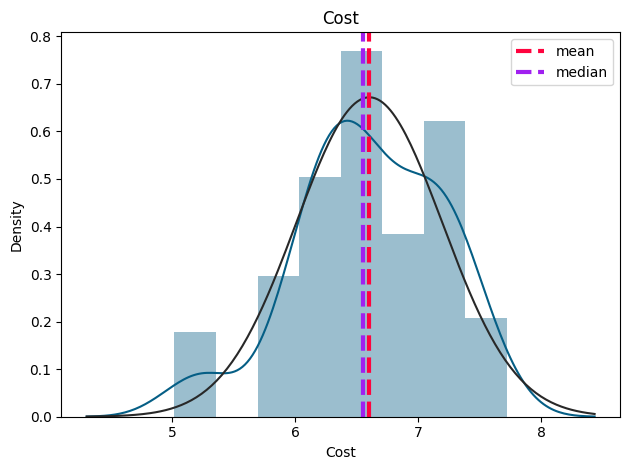

In [191]:
# Transform Your data
for i,col in enumerate(['Cost']) :
    sns.distplot(cluster_df[col], color = '#055E85', fit = norm);
    feature = cluster_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1))
    plt.title(f'{col.title()}');
    plt.tight_layout();

* Since I have applied capping method, it changes mean and median, hence trying to achieve normal distribution using log transformation which is a method for treating positive skewness.

Gaussian transformation generally used to convert data distribution into normal distribution.

### Data Scaling

In [192]:
# Scaling your data
cluster_dummy.sample(5)

Restaurant  Cost  Average_Rating  Total_Cuisine_Count  \
70  Urban Asia - Kitchen & Bar  7.00            3.65                    5   
58                    Tempteys  5.86            3.85                    2   
5        The Fisherman's Wharf  7.31            4.22                    5   
90                Arena Eleven  7.38            4.12                    1   
28             Behrouz Biryani  6.40            2.83                    2   

    American  Andhra  Arabian  Asian  BBQ  Bakery  ...  North Indian  Pizza  \
70         0       0        0      1    0       0  ...             0      0   
58         0       0        0      0    0       0  ...             0      0   
5          0       0        0      1    0       0  ...             1      0   
90         0       0        0      0    0       0  ...             0      0   
28         0       0        0      0    0       0  ...             0      0   

    Salad  Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
70      0        0             0        0            0      1     1      0  
58      0        0             0        0            0      0     0      0  
5       0        1             0        0            0      0     0      0  
90      0        0             0        0            0      0     0      0  
28      0        0             0        0            0      0     0      0  

[5 rows x 48 columns]

In [193]:
#normalizing numerical columns
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

### Dimesionality Reduction

In [194]:
# Dimensionality Reduction (If needed)
#applying pca
#setting restaurant feature as index as it still had categorial value
scaled_df.set_index(['Restaurant'],inplace=True)
features = scaled_df.columns
# features = features.drop('Restaurant')
# create an instance of PCA
pca = PCA()

# fit PCA on features
pca.fit(scaled_df[features])

PCA()

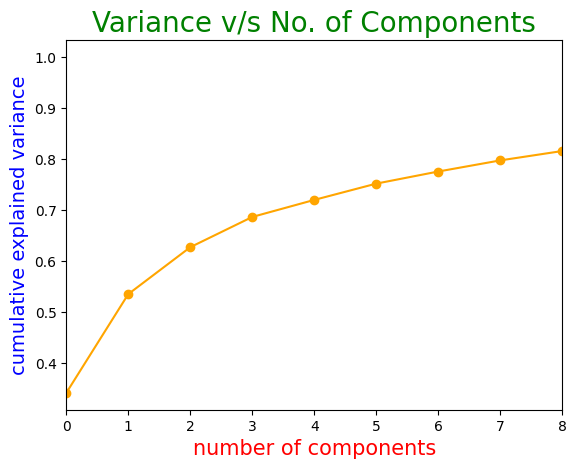

In [195]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

In [196]:
#using n_component as 3 
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(scaled_df[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.34148554 0.1936559  0.0919578 ]
Cumulative variance explained by 3 principal components: 62.71%


In [197]:
#shape
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (100, 47)
transformed shape: (100, 3)


In [202]:
print(X_tfidf)

  (0, 402)	0.12011845411442172
  (0, 483)	0.10606369183180228
  (0, 2031)	0.24345223897197232
  (0, 2626)	0.22327506565697147
  (0, 3280)	0.20712119130286474
  (0, 3330)	0.1858543174047504
  (0, 3611)	0.2912397976523078
  (0, 4587)	0.2989087934333801
  (0, 5488)	0.06996091671680622
  (0, 5714)	0.1402651143796611
  (0, 6173)	0.21001142583127422
  (0, 6752)	0.215728547930473
  (0, 8733)	0.15871817403059404
  (0, 10326)	0.11368231091658669
  (0, 10815)	0.2961836342778372
  (0, 11252)	0.07829130891579725
  (0, 11980)	0.1664915882212991
  (0, 12194)	0.12173851977679652
  (0, 13017)	0.37577057269074676
  (0, 13038)	0.21820912958042296
  (0, 13956)	0.3163608075928381
  (0, 16318)	0.1869993002095568
  (1, 483)	0.1500402535526097
  (1, 3611)	0.411994833761393
  (1, 4835)	0.26792120273345466
  :	:
  (9960, 8737)	0.31351658027666957
  (9960, 8923)	0.11374213387112203
  (9960, 9208)	0.0681260434153164
  (9960, 9323)	0.09972922210700336
  (9960, 9385)	0.12282081681901998
  (9960, 9488)	0.0721983456

In [198]:
# Split your data to train and test. Choose Splitting ratio wisely.
# for sentiment analysis using sentiment_df dataframe
X = X_tfidf #from text vectorization
y = sentiment_df['Sentiment']

In [199]:
sentiment_df.shape

(9961, 6)

In [200]:
#spliting test train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7968, 17333)
Number transactions y_train dataset:  (7968,)
Number transactions X_test dataset:  (1993, 17333)
Number transactions y_test dataset:  (1993,)


In [203]:
#getting the value count for target class
vc = sentiment_df.Sentiment.value_counts().reset_index().rename(columns = 
            {'index':'Sentiment','Sentiment':'Count'})

In [204]:
#defining majority and minority class value
majority_class = vc.Count[0]
minority_class = vc.Count[1]

In [205]:
#calculating cir value for checking class imbalance
CIR = majority_class / minority_class
CIR

inf

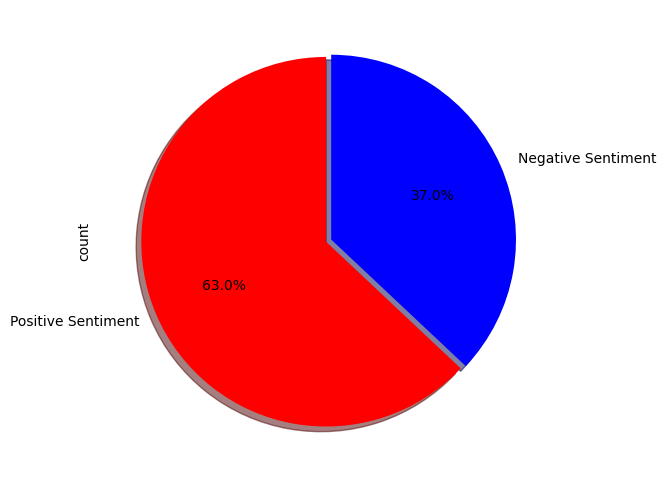

In [206]:
# Dependant Variable Column Visualization
sentiment_df['Sentiment'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Positive Sentiment','Negative Sentiment'],
                               colors=['red','blue'],
                               explode=[0.01,0.02]
                              )
plt.show()

Yes, there is imbalance in dataset with 60: 40 ratio, where 60 is the majaority class and 40 is the minority class. Even the CIR score suggest that majority class is 1.73 times greater than minority class. However it is considered as slight imbalance, therefore not performing any under or over sampling technique i.e., **not required** to treat class imabalance.

## Model Implementation

### ML Model - 1 Clustering

In [207]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans

In [208]:
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

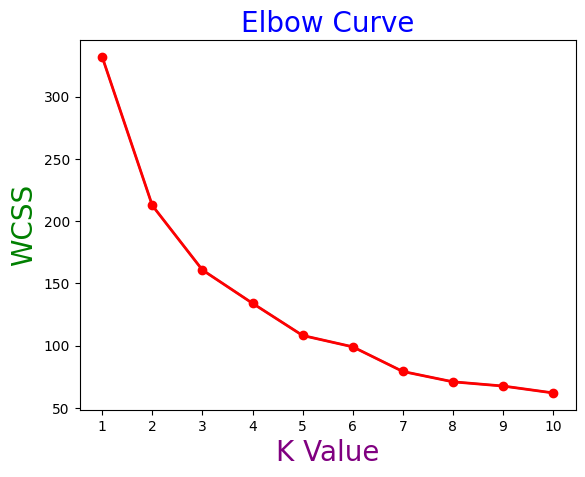

In [209]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

For n_clusters = 2 average silhouette_score is : 0.31354556014463375
For n_clusters = 3 average silhouette_score is : 0.27282461898125454
For n_clusters = 4 average silhouette_score is : 0.2542821791122473
For n_clusters = 5 average silhouette_score is : 0.2587525020357453
For n_clusters = 6 average silhouette_score is : 0.31332840035586496
For n_clusters = 7 average silhouette_score is : 0.29026077423695207
For n_clusters = 8 average silhouette_score is : 0.3117107285902248
For n_clusters = 9 average silhouette_score is : 0.3013882083047819


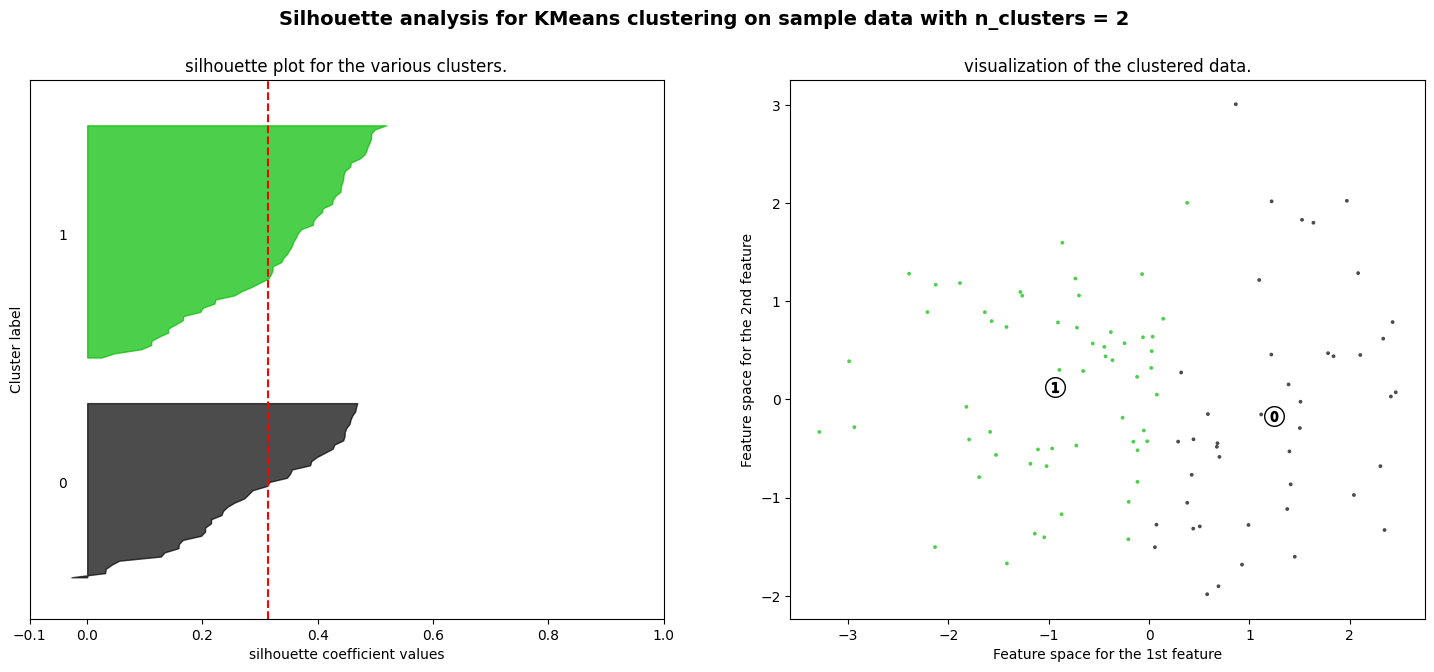

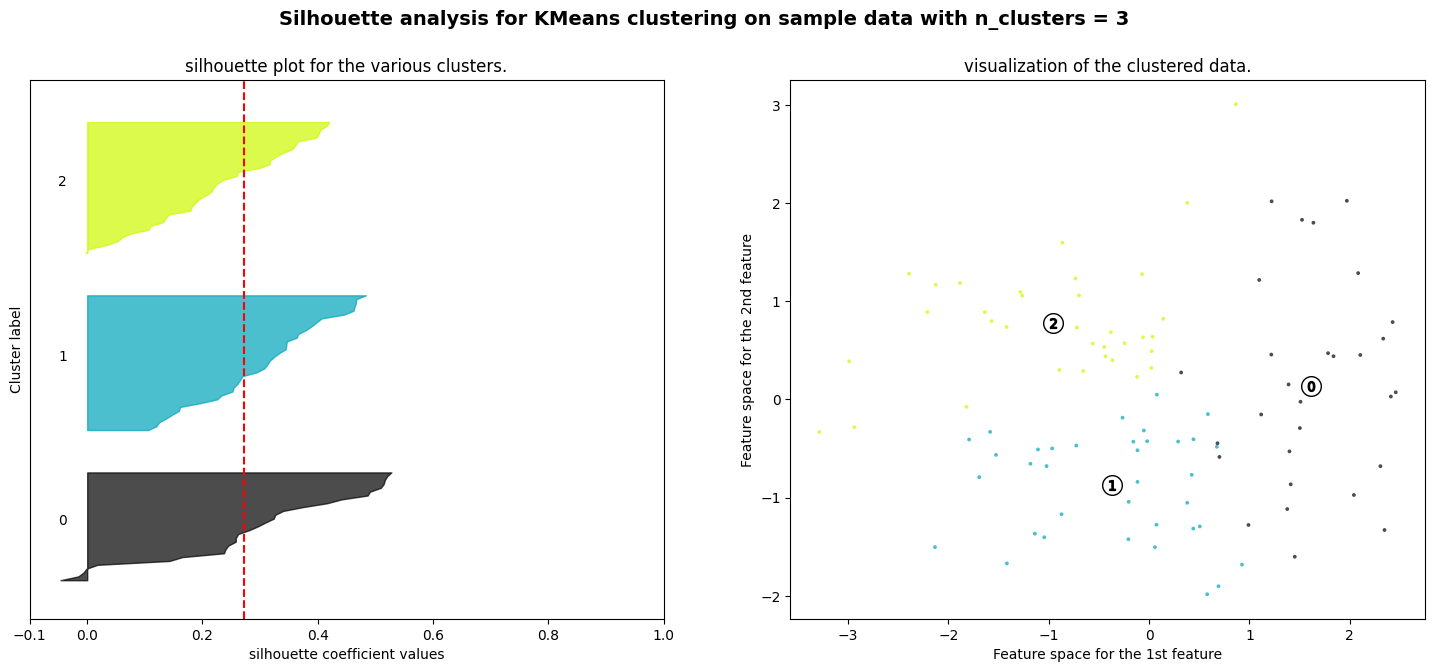

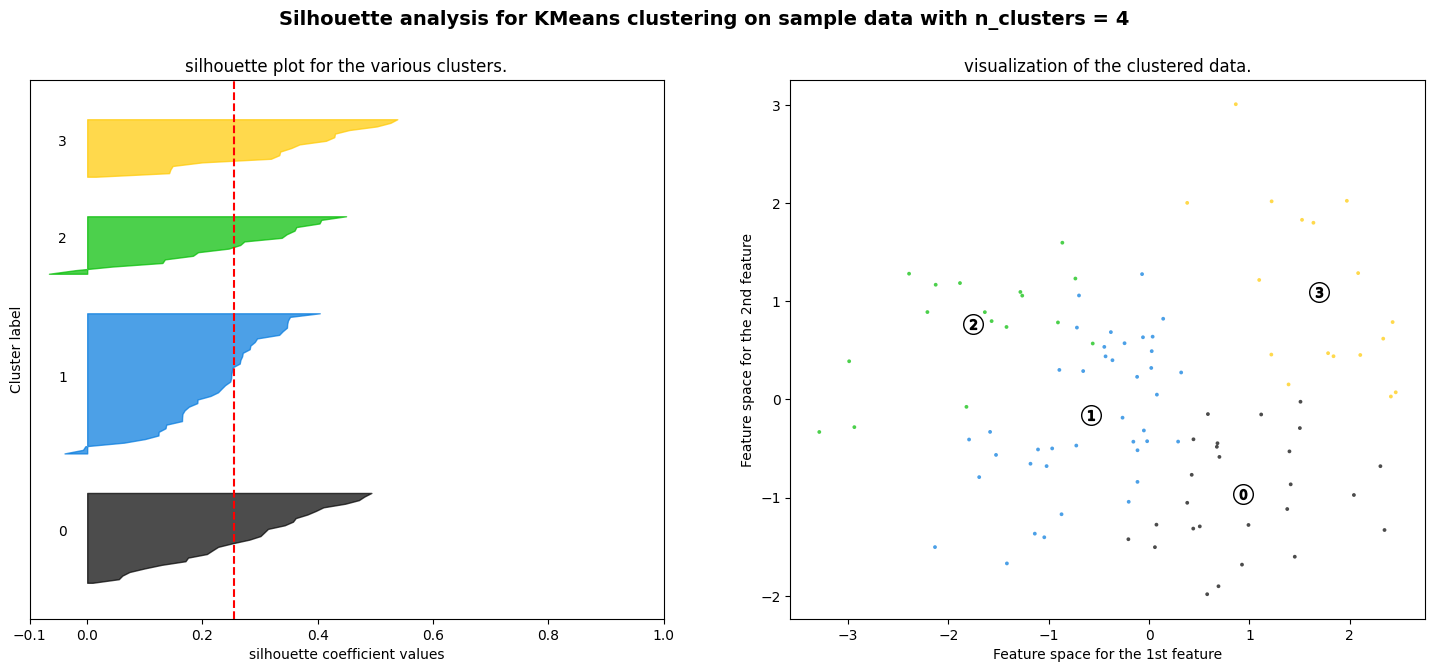

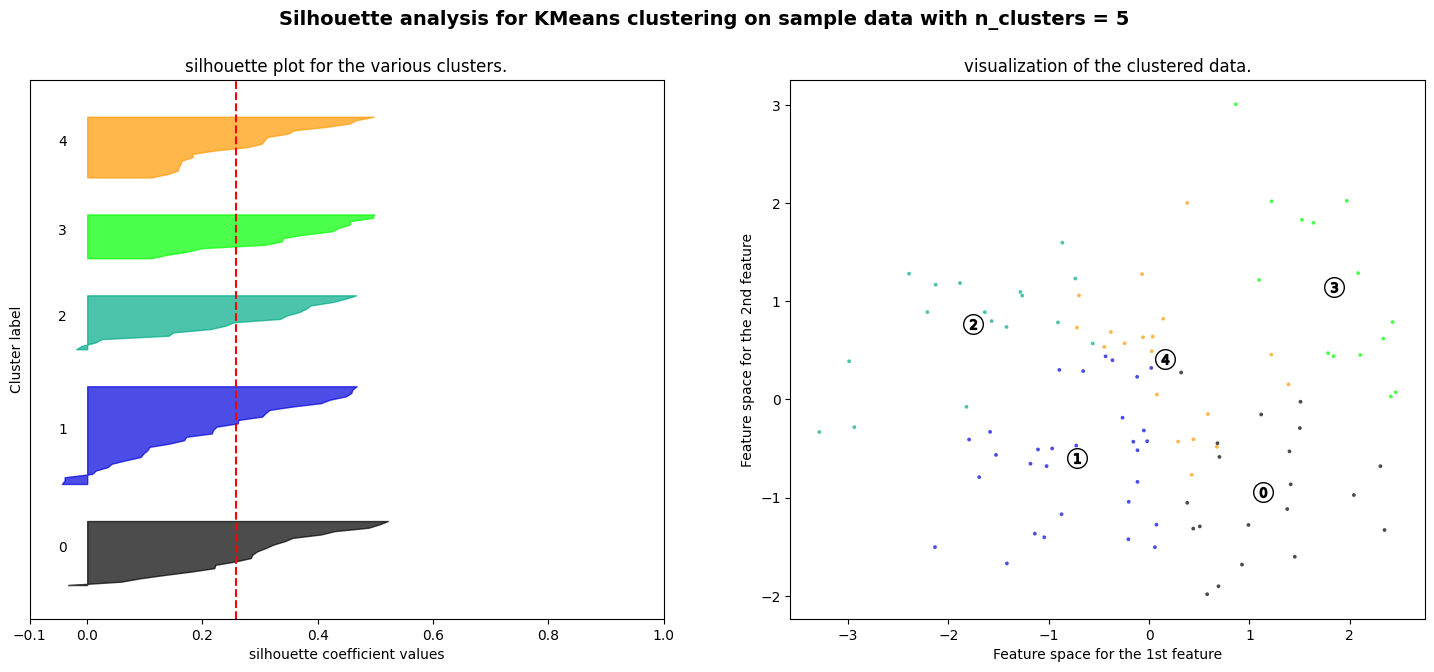

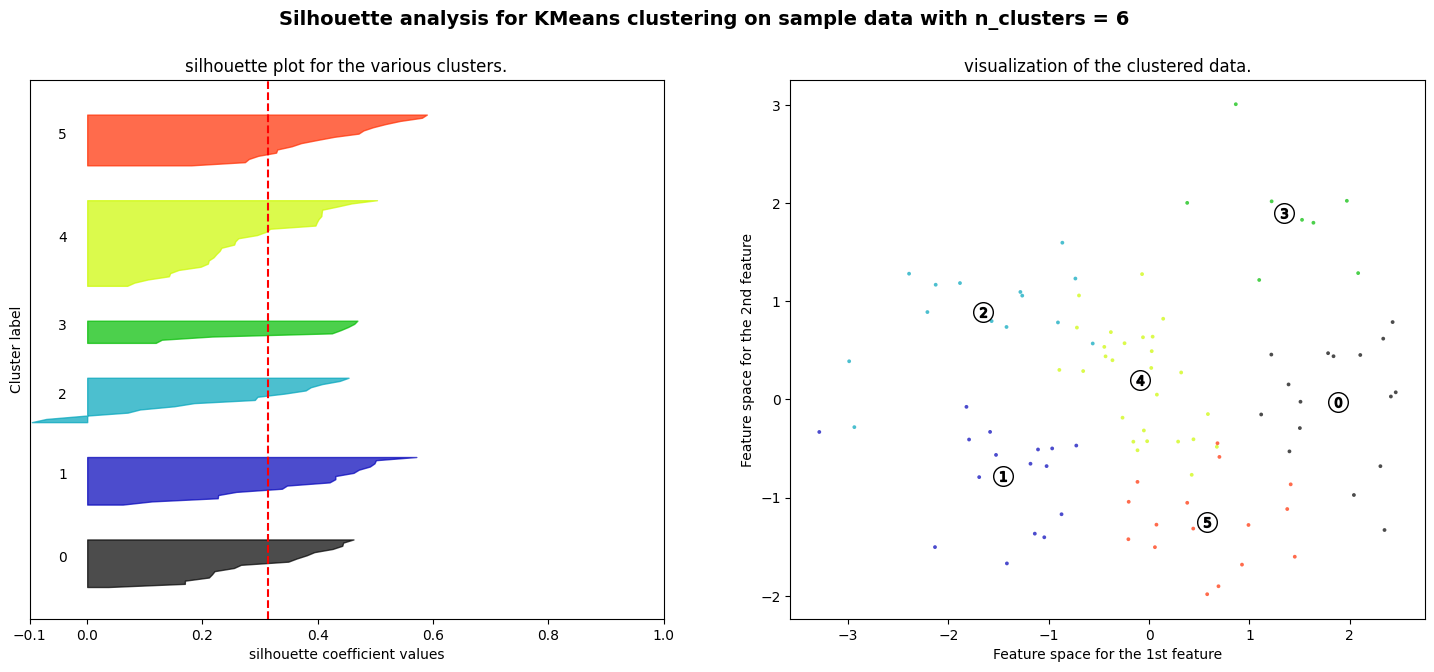

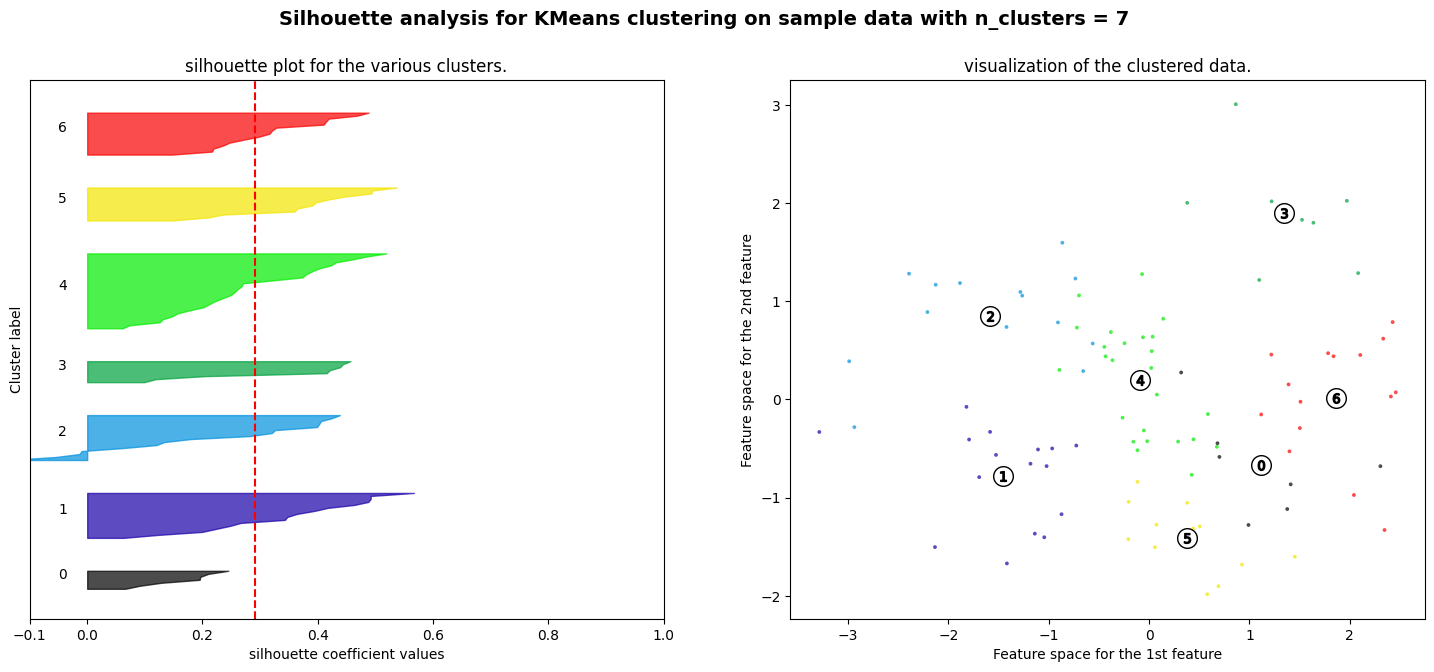

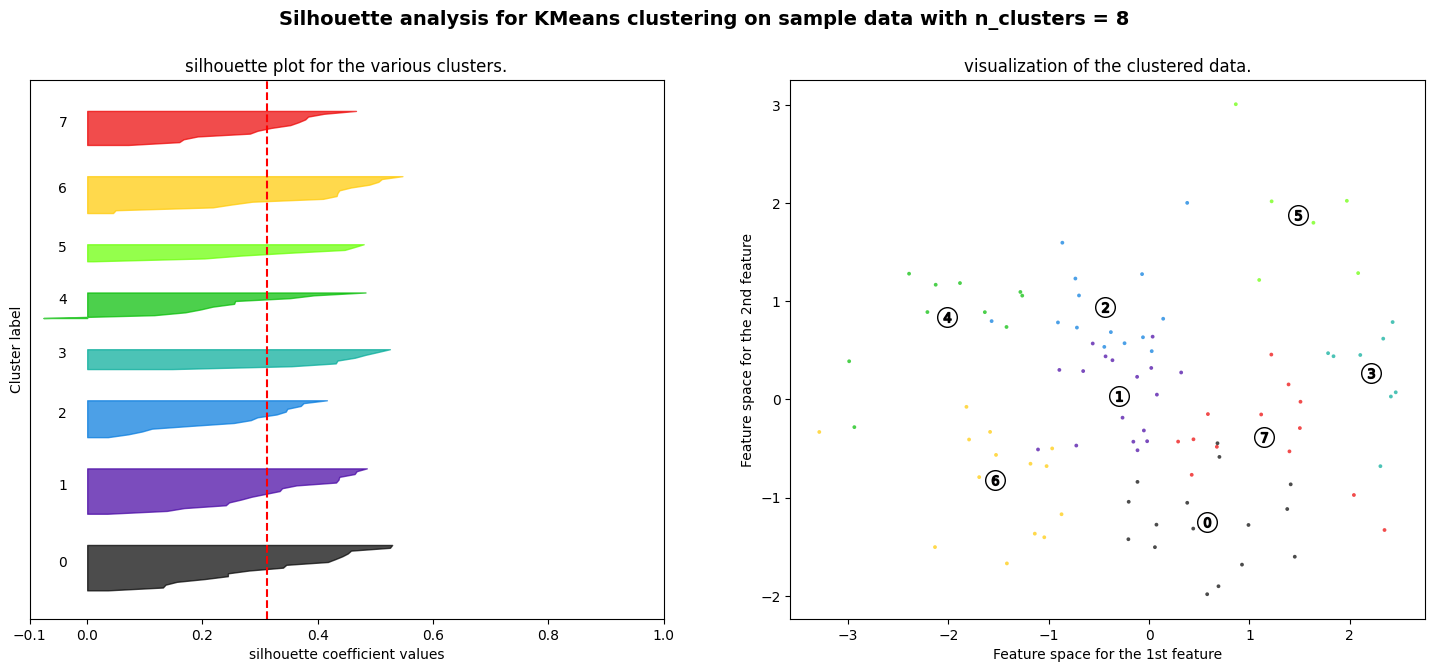

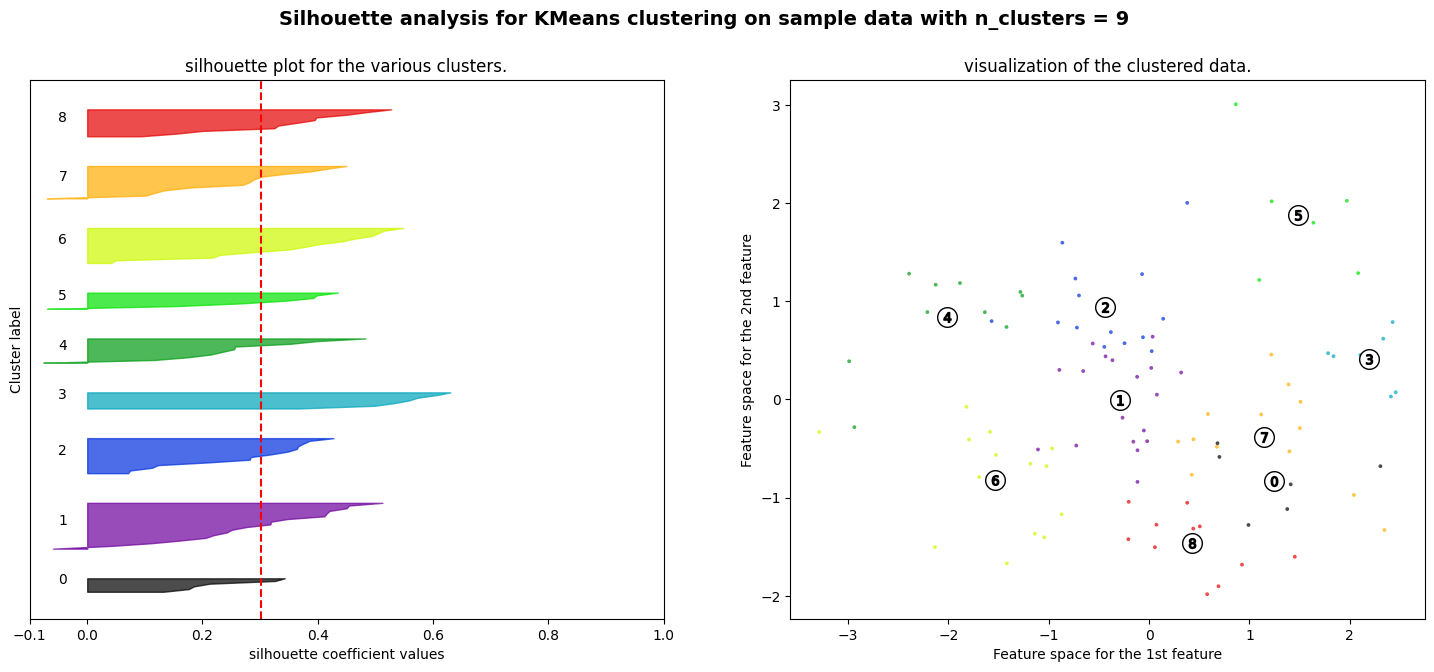

In [210]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='$%d$' % i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

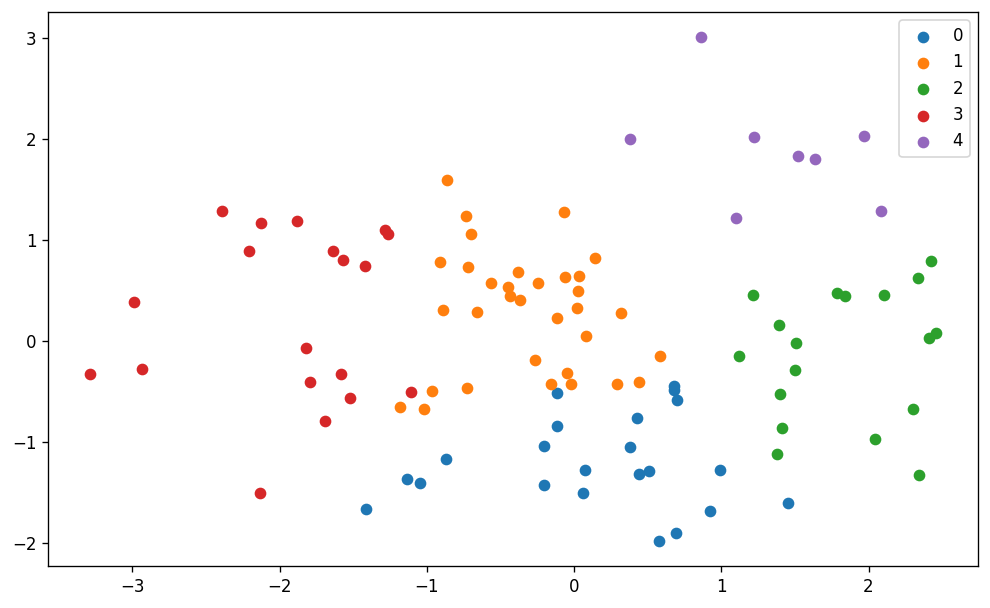

In [211]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [212]:
#making df for pca
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(2)

PC1   PC2   PC3  label
Restaurant                                       
AB's - Absolute Barbecues 1.97  2.02 -0.34      4
T Grill                   0.06 -1.51 -0.13      0

In [213]:
#joining the cluster labels to names dataframe
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)

Cost  Average_Rating  Total_Cuisine_Count  American  \
Restaurant                                                                 
NorFest - The Dhaba  6.31            4.03                    1         0   
Tandoori Food Works  6.22            3.27                    3         0   

                     Andhra  Arabian  Asian  BBQ  Bakery  Beverages  ...  \
Restaurant                                                           ...   
NorFest - The Dhaba       0        0      0    0       0          0  ...   
Tandoori Food Works       0        0      0    0       0          0  ...   

                     Pizza  Salad  Seafood  South Indian  Spanish  \
Restaurant                                                          
NorFest - The Dhaba      0      0        0             0        0   
Tandoori Food Works      0      0        0             0        0   

                     Street Food  Sushi  Thai  Wraps  label  
Restaurant                                                   
NorFest - The Dhaba            0      0     0      0      1  
Tandoori Food Works            0      0     0      0      1  

[2 rows x 48 columns]

In [214]:
#changing back cost value to original from log1p done during transformation
cluster_dummy['Cost'] = np.expm1(cluster_dummy['Cost'])
cluster_dummy.sample(2)

Cost  Average_Rating  \
Restaurant                                                      
Green Bawarchi Restaurant              700.00            3.49   
Mazzo - Marriott Executive Apartments 1700.00            4.19   

                                       Total_Cuisine_Count  American  Andhra  \
Restaurant                                                                     
Green Bawarchi Restaurant                                3         0       0   
Mazzo - Marriott Executive Apartments                    4         0       0   

                                       Arabian  Asian  BBQ  Bakery  Beverages  \
Restaurant                                                                      
Green Bawarchi Restaurant                    0      0    0       0          0   
Mazzo - Marriott Executive Apartments        0      1    0       0          0   

                                       ...  Pizza  Salad  Seafood  \
Restaurant                             ...                          
Green Bawarchi Restaurant              ...      0      0        0   
Mazzo - Marriott Executive Apartments  ...      0      0        0   

                                       South Indian  Spanish  Street Food  \
Restaurant                                                                  
Green Bawarchi Restaurant                         0        0            0   
Mazzo - Marriott Executive Apartments             1        0            0   

                                       Sushi  Thai  Wraps  label  
Restaurant                                                        
Green Bawarchi Restaurant                  0     0      0      0  
Mazzo - Marriott Executive Apartments      0     0      0      2  

[2 rows x 48 columns]

In [215]:
#creating df to store cluster data
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = hotel[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                            Cuisines    Cost  Average_Rating  \
0  Chinese, Continental, Kebab, European, South I...  800.00            4.28   
1                     Biryani, North Indian, Chinese  800.00            4.70   
2       Asian, Mediterranean, North Indian, Desserts 1300.00            4.66   
3  Biryani, North Indian, Chinese, Seafood, Bever...  800.00            3.21   
4  Asian, Continental, North Indian, Chinese, Med... 1200.00            4.34   

   Total_Cuisine_Count  label  
0                    6      2  
1                    3      4  
2                    4      4  
3                    5      0  
4                    5      2

In [216]:
# Counting content in each cluster
cluster_count = cluster_dummy['label'].value_counts().reset_index().rename(
    columns={'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

Total_Restaurant  count
1                 0     22
0                 1     33
3                 2     18
2                 3     19
4                 4      8

In [217]:
#creating new df for checkign cuising in each cluster
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

Restaurant      Cuisines    Cost  Average_Rating  \
2                        Flechazo         Asian 1300.00            4.66   
13  The Lal Street - Bar Exchange       Italian 1300.00            3.45   
6                         eat.fit  Healthy Food  500.00            3.20   
41                 Karachi Bakery      Desserts  500.00            3.80   
32           Marsala Food Company       Arabian  700.00            3.46   

    Total_Cuisine_Count  label  
2                     4      4  
13                    3      1  
6                     4      0  
41                    3      1  
32                    3      1

In [218]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 2 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Asian' 'Mediterranean' 'Seafood' 'Goan' 'American' 'BBQ' 'Japanese'
 'Italian' 'Salad' 'Sushi' 'Spanish' 'Modern Indian' 'Thai' 'Momos'] 

Cuisine List for Cluster : 4 

['Biryani' 'North Indian' 'Chinese' 'Asian' 'Mediterranean' 'Desserts'
 'European' 'American' 'BBQ' 'Modern Indian' 'Continental' 'Sushi'] 

Cuisine List for Cluster : 0 

['Biryani' 'North Indian' 'Chinese' 'Seafood' 'Beverages' 'Healthy Food'
 'Continental' 'South Indian' 'Mexican' 'Italian' 'Salad' 'Bakery'
 'Mughlai' 'Juices' 'Andhra' 'Hyderabadi' 'Finger Food' 'Kebab' 'Thai'
 'Indonesian' 'Asian' 'Fast Food' 'Desserts' 'Cafe' 'Burger'] 

Cuisine List for Cluster : 3 

['Lebanese' 'Ice Cream' 'Desserts' 'Street Food' 'North Indian'
 'Fast Food' 'Burger' 'Chinese' 'Mughlai' 'Biryani' 'Asian' 'Beverages'
 'Bakery' 'Momos' 'Cafe' 'Pizza' 'Arabian'] 

Cuisine List for Cluster : 1 

['Continental' 'American' 'Chine

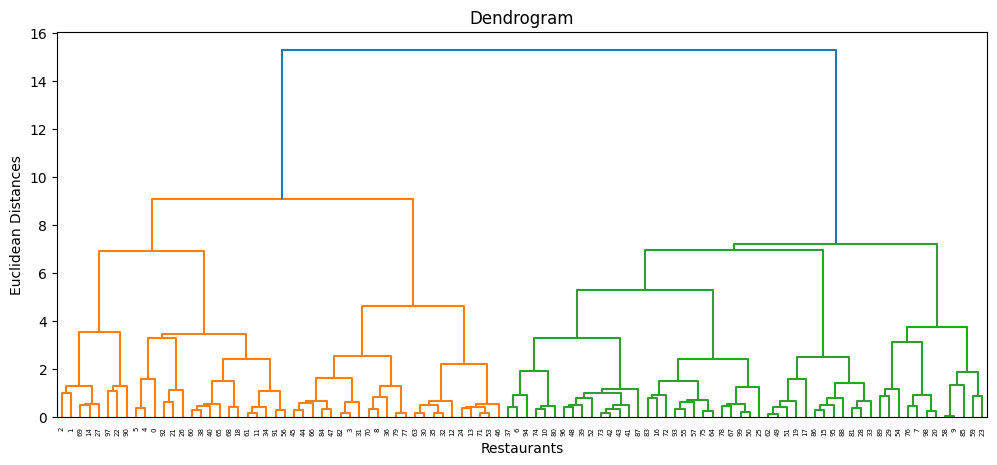

In [219]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

In [222]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, metric = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(df_pca)
    score = silhouette_score(df_pca, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.29566419533238875
For n_clusters = 3, silhouette score is 0.2252839885668054
For n_clusters = 4, silhouette score is 0.20865729675680533
For n_clusters = 5, silhouette score is 0.2466524590302819
For n_clusters = 6, silhouette score is 0.27119012773344164
For n_clusters = 7, silhouette score is 0.26861108935379185
For n_clusters = 8, silhouette score is 0.2815077022408657
For n_clusters = 9, silhouette score is 0.288036427814913
For n_clusters = 10, silhouette score is 0.28854504323722197
For n_clusters = 11, silhouette score is 0.29952838233213475
For n_clusters = 12, silhouette score is 0.314288579339677
For n_clusters = 13, silhouette score is 0.3158360423442036
For n_clusters = 14, silhouette score is 0.32736295999399245
For n_clusters = 15, silhouette score is 0.33655269068108956


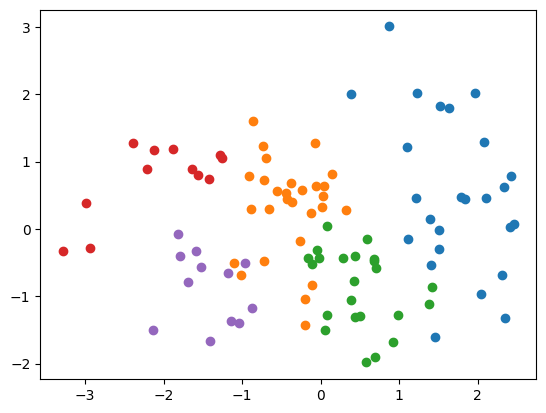

Silhouette Coefficient: 0.247
davies_bouldin_score 1.151


In [223]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

# define the model
model = AgglomerativeClustering(n_clusters = 5)      #n_clusters=5
# fit model and predict clusters
y_hc = model.fit_predict(df_pca)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(df_pca[row_ix, 0], df_pca[row_ix, 1])
# show the plot
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_pca, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca, y_hc))

In [224]:
#creating new colummn for predicting cluster using hierarcial clsutering
clustering_result['label_hr'] = y_hc

In [225]:
clustering_result.sample(5)

Restaurant                             Cuisines  \
72                          Labonel                     Bakery, Desserts   
68            The Tilt Bar Republic   North Indian, Continental, Italian   
74                           Faasos         Fast Food, Biryani, Desserts   
49                    Mathura Vilas  South Indian, North Indian, Chinese   
97  Zega - Sheraton Hyderabad Hotel                         Asian, Sushi   

      Cost  Average_Rating  Total_Cuisine_Count  label  label_hr  
72 1000.00            3.92                    2      1         1  
68 1500.00            3.85                    3      2         0  
74  600.00            3.03                    3      1         1  
49  500.00            2.82                    3      0         4  
97 1750.00            4.45                    2      4         0

### ML Model - 2 Sentiment Analysis

In [226]:
#calculating silhouette score for n_component
from sklearn.metrics import silhouette_score

topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=n_components)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))


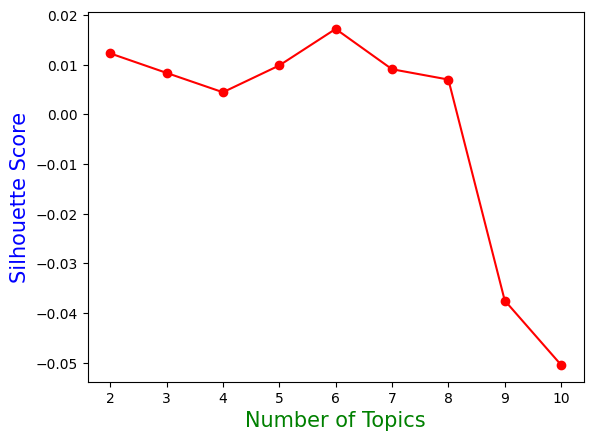

In [227]:
#plotting silhouette score 
plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.show()

In [228]:
# LDA model
lda = LatentDirichletAllocation(n_components=4)
lda.fit(X)

LatentDirichletAllocation(n_components=4)

In [229]:
#creating copy to store predicted sentiments
review_sentiment_prediction = review[review_df.columns.to_list()].copy()
review_sentiment_prediction.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...    5.00   
1  Ambience is too good for a pleasant evening. S...    5.00   
2  A must try.. great food great ambience. Thnx f...    5.00   
3  Soumen das and Arun was a great guy. Only beca...    5.00   
4  Food is good.we ordered Kodi drumsticks and ba...    5.00   

                  Metadata                Time  Pictures  
0   1 Review , 2 Followers 2019-05-25 15:54:00         0  
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0  
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0  
3    1 Review , 1 Follower 2019-05-24 22:11:00         0  
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0

In [230]:
# predicting the sentiments and storing in a feature
topic_results = lda.transform(X)
review_sentiment_prediction['Prediction'] = topic_results.argmax(axis=1)
review_sentiment_prediction.sample(5)

Restaurant      Reviewer  \
6580  Komatose - Holiday Inn Express & Suites   Kirti Singh   
3176                              Pista House     Madhumita   
4421               La La Land - Bar & Kitchen        Ashish   
7675            The Old Madras Baking Company  Vasanthi Raj   
2411                                    SKYHY    DNiharikaa   

                                                 Review  Rating  \
6580  Good food\nAwesome ambience\nYou will enjoy ve...    4.00   
3176  Taste wise they are OK, but I don’t trust thei...    2.00   
4421  Well sometimes rating can be misleading. We vi...    1.00   
7675  Filter Coffee Croissant cravings get satiated ...    4.00   
2411  One of good open terase place in town.\n\nFood...    4.00   

                          Metadata                Time  Pictures  Prediction  
6580  121 Reviews , 3017 Followers 2018-06-01 00:51:00         7           0  
3176     16 Reviews , 15 Followers 2018-08-13 19:45:00         0           0  
4421     16 Reviews , 52 Followers 2019-03-10 20:37:00         1           0  
7675      12 Reviews , 4 Followers 2018-07-15 12:50:00         0           0  
2411       5 Reviews , 2 Followers 2019-04-21 13:52:00         0           0

TOP 100 WORDS FOR TOPIC #0


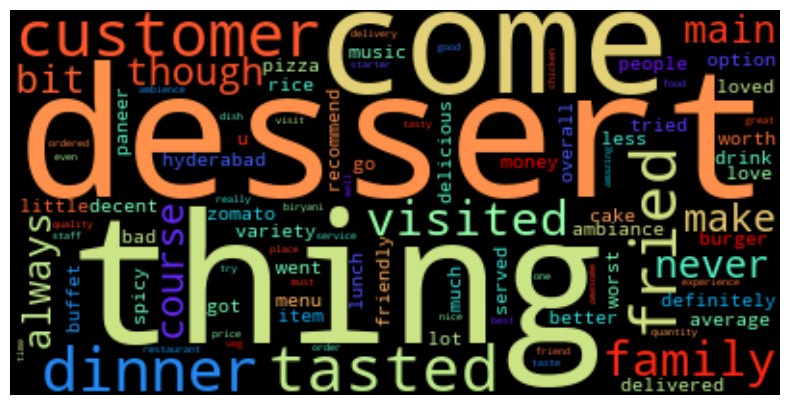

TOP 100 WORDS FOR TOPIC #1


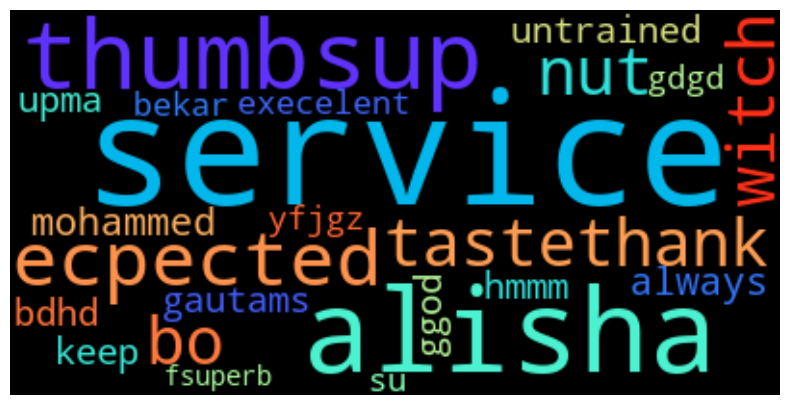

TOP 100 WORDS FOR TOPIC #2


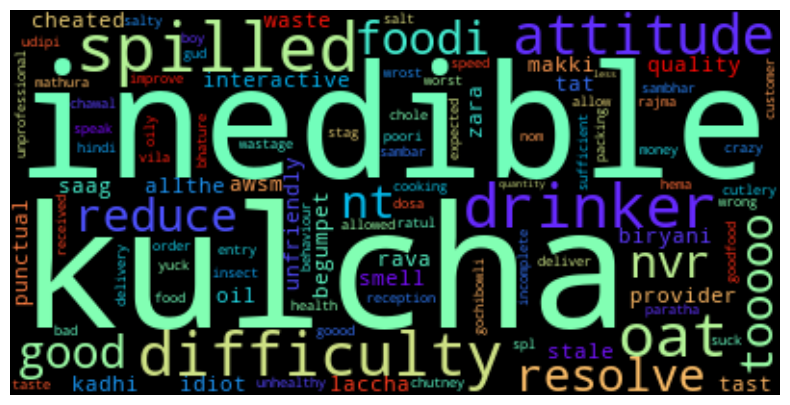

TOP 100 WORDS FOR TOPIC #3


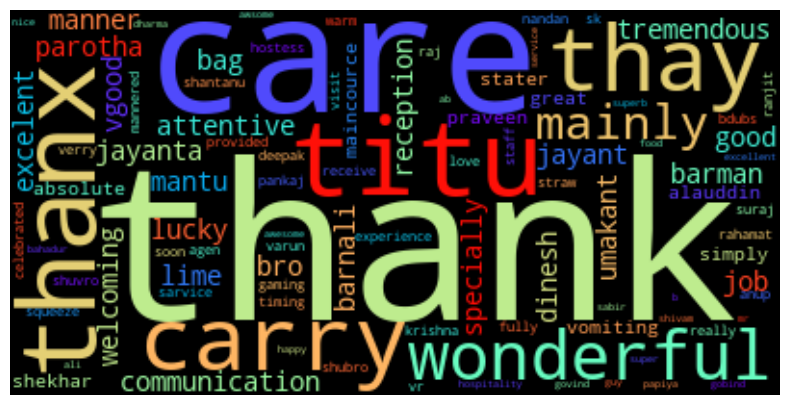

In [232]:
#worcloud 
# Define the number of words to include in the word cloud
N = 100

# Create a list of strings for each topic
topic_text = []
for index, topic in enumerate(lda.components_):
    topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-N:]]
    topic_text.append(" ".join(topic_words))

# Create a word cloud for each topic
for i in range(len(topic_text)):
    print(f'TOP 100 WORDS FOR TOPIC #{i}')
    wordcloud = WordCloud(background_color="black",colormap='rainbow').generate(topic_text[i])
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('='*120)

In [233]:
for sentiment in review_sentiment_prediction['Prediction'].unique().tolist():
  print('Prediction = ',sentiment,'\n')
  print(review_sentiment_prediction[review_sentiment_prediction['Prediction'] == 
        sentiment]['Rating'].value_counts())
  print('='*120)

Prediction =  0 

Rating
5.00    3136
4.00    2239
1.00    1619
3.00    1114
2.00     636
4.50      69
3.50      47
2.50      19
1.50       9
Name: count, dtype: int64
Prediction =  1 

Rating
5.00    378
4.00     77
1.00     42
3.00     37
2.00     18
Name: count, dtype: int64
Prediction =  3 

Rating
5.00    256
4.00     23
3.00      9
1.00      9
2.00      4
Name: count, dtype: int64
Prediction =  2 

Rating
1.00    65
5.00    62
4.00    34
3.00    33
2.00    26
Name: count, dtype: int64


In [235]:
#defining function to calculate score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from tabulate import tabulate
import itertools


#calculating score
def calculate_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    # Get the confusion matrix for both train and test

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap='Wistia')

    # Add labels to the plot
    class_names = ["Positive", "Negative"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Add values inside the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    # Add a title and x and y labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()
    print(cm)
    return roc_auc, f1, accuracy, precision, recall

#printing result
def print_table(model, X_train, y_train, X_test, y_test):
    roc_auc, f1, accuracy, precision, recall = calculate_scores(model, X_train, y_train, X_test, y_test)
    table = [["ROC AUC", roc_auc], ["Precision", precision], 
             ["Recall", recall], ["F1", f1], ["Accuracy", accuracy]]
    print(tabulate(table, headers=["Metric", "Score"]))

In [236]:
#logisctic regression
from sklearn.linear_model import LogisticRegression

# create and fit the model
clf = LogisticRegression()

In [237]:
#XgBoost
from xgboost import XGBClassifier

#create and fit the model
xgb = XGBClassifier()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Logistic Regression**

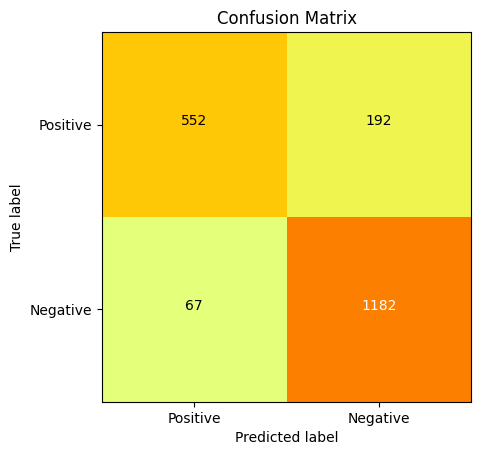

[[ 552  192]
 [  67 1182]]
Metric        Score
---------  --------
ROC AUC    0.844146
Precision  0.860262
Recall     0.946357
F1         0.901258
Accuracy   0.870045


In [238]:
# Visualizing evaluation Metric Score chart for logistic regression
# printing result
print_table(clf, X_train, y_train, X_test, y_test)

**XgBoost**

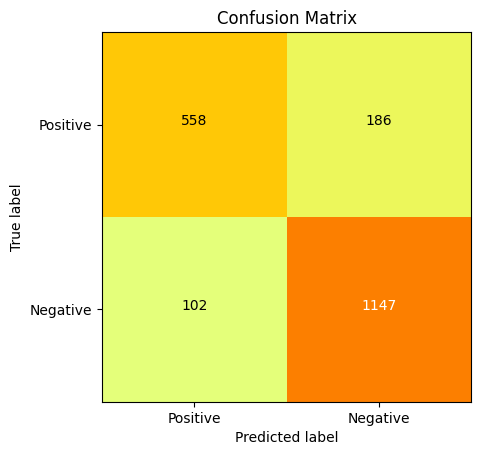

[[ 558  186]
 [ 102 1147]]
Metric        Score
---------  --------
ROC AUC    0.834167
Precision  0.860465
Recall     0.918335
F1         0.888459
Accuracy   0.855494


In [239]:
# Visualizing evaluation Metric Score chart for XgBoost
# printing result
print_table(xgb, X_train, y_train, X_test, y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

**Logistic Regression**

In [240]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#logistic regression
# finding the best parameters for LogisticRegression by gridsearchcv
param_dict = {'C': [0.1,1,10,100,1000],'penalty': ['l1', 'l2'],'max_iter':[1000]} 
clf_grid = GridSearchCV(clf, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


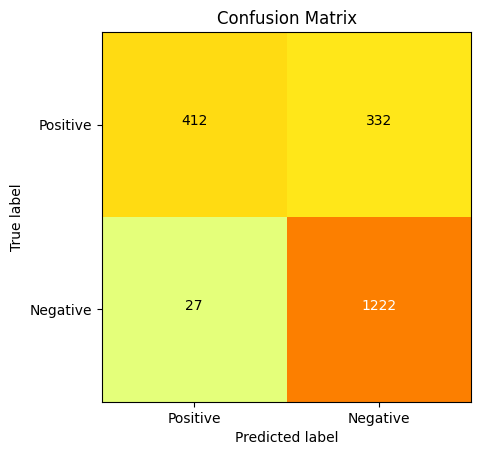

[[ 412  332]
 [  27 1222]]
Metric        Score
---------  --------
ROC AUC    0.766073
Precision  0.786358
Recall     0.978383
F1         0.871923
Accuracy   0.81987


In [241]:
# printing result
print_table(clf_grid, X_train, y_train, X_test, y_test)

**XgBoost**

In [242]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgb_grid=GridSearchCV(estimator=xgb,param_grid = xgb_param,cv=3,scoring='recall',verbose=5,n_jobs = -1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


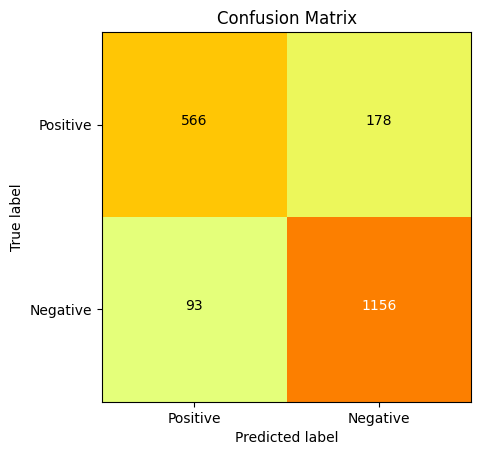

[[ 566  178]
 [  93 1156]]
Metric        Score
---------  --------
ROC AUC    0.843147
Precision  0.866567
Recall     0.92554
F1         0.895083
Accuracy   0.864024


In [243]:
# printing result for gridsearch Xgb
print_table(xgb_grid, X_train, y_train, X_test, y_test)

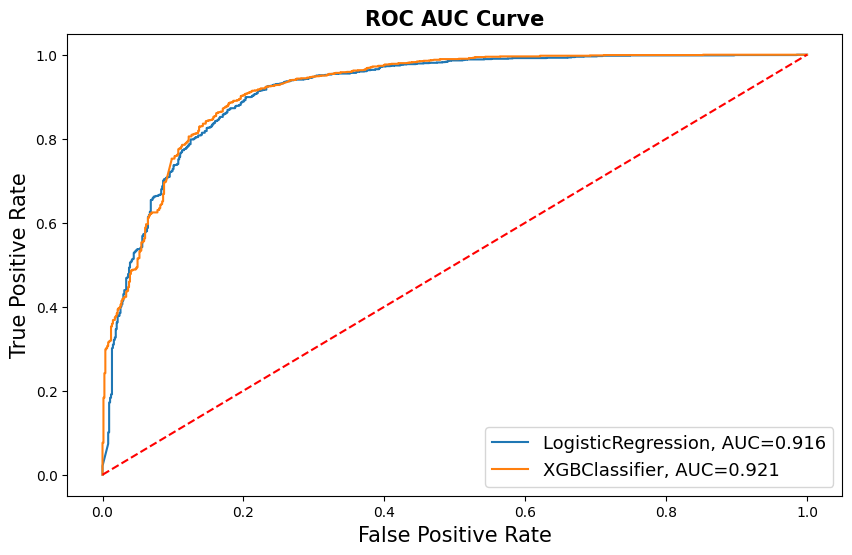

In [246]:
#Plotting graph
from sklearn.metrics import roc_curve
# finding the best parameters for all the models
log_reg_best = clf_grid.best_estimator_
xgbc_best = xgb_grid.best_estimator_

# predicting the sentiment by all models
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]

classifiers_proba = [(log_reg_best, y_preds_proba_lr),
                    (xgbc_best, y_preds_proba_xgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = pd.concat([result_table, pd.DataFrame({'classifiers': [pair[0].__class__.__name__],
                                                      'fpr': [fpr], 
                                                      'tpr': [tpr], 
                                                      'auc': [auc]})], ignore_index=True)
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("False Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Overall for XgBoost Classifier there is a improvement i.e., it changes from 

* Metric    ⏸    Score
---------      --------
* ROC AUC   - 0.760311
* Precision -0.783821
* Recall    -0.937398
* F1        -0.853758
* Accuracy  -0.801806


to this ▶ 

* Metric      ⏸ Score
---------     --------
* ROC AUC   -0.818059
* Precision -0.848111
* Recall    -0.894309
* F1        -0.870598
* Accuracy  -0.835926
  

and after tunning 
* 566 instances are labeled as True Positive (correctly predicted as positive)
* 197 instances are labeled as False Positive (incorrectly predicted as positive)
* 1100 instances are labeled as True Negative (correctly predicted as negative)
* 130 instances are labeled as False Negative (incorrectly predicted as negative)

### ML Model - 3 Recommendation System

In [247]:
#creating variable that contain restaurant cuisine details
restaurant_df = cluster_dummy.copy()
restaurant_df = restaurant_df.reset_index()
restaurant_df = restaurant_df.drop(columns = ['Cost',	'Average_Rating',	'Total_Cuisine_Count','label'], axis =1)
restaurant_df.head(2)

Restaurant  American  Andhra  Arabian  Asian  BBQ  Bakery  Beverages  \
0  Beyond Flavours         0       0        0      0    0       0          0   
1         Paradise         0       0        0      0    0       0          0   

   Biryani  Burger  ...  North Indian  Pizza  Salad  Seafood  South Indian  \
0        0       0  ...             1      0      0        0             1   
1        1       0  ...             1      0      0        0             0   

   Spanish  Street Food  Sushi  Thai  Wraps  
0        0            0      0     0      0  
1        0            0      0     0      0  

[2 rows x 45 columns]

In [248]:
#shape
restaurant_df.shape

(100, 45)

In [249]:
#restaurant matrix
rest_genre = restaurant_df.loc[:, restaurant_df.columns != 'Restaurant']
rest_matrix = rest_genre.values
rest_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [250]:
#matrix shape
rest_matrix.shape

(100, 44)

In [251]:
#creating user or reviewer profile
user_df = sentiment_df[['Reviewer',	'Restaurant',	'Rating']].copy()
user_df.head()

Reviewer       Restaurant  Rating
0     Rusha Chakraborty  Beyond Flavours    5.00
1  Anusha Tirumalaneedi  Beyond Flavours    5.00
2       Ashok Shekhawat  Beyond Flavours    5.00
3        Swapnil Sarkar  Beyond Flavours    5.00
4                Dileep  Beyond Flavours    5.00

In [252]:
#shape
user_df.shape

(9961, 3)

In [253]:
# grouping the data by the 'user' column
grouped_data = user_df.groupby('Reviewer')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Rating': row['Rating']} for _, row in data.iterrows()]
    #variable _ is used to store the index value, which is not used in the loop

# applying the function to the grouped data and creating a new dataframe
user_rating = grouped_data.apply(create_new_column)
user_rating = user_rating.reset_index().rename(columns ={0:'Rated_Restaurant'})
user_rating.head()

Reviewer  \
0                    #FOODPORN   
1          #chloesviews // CAH   
2                         $ign   
3                     4mybanti   
4  @FuloriBinaChutneyKaiseBani   

                                    Rated_Restaurant  
0  [{'Restaurant': 'Zega - Sheraton Hyderabad Hot...  
1         [{'Restaurant': 'eat.fit', 'Rating': 5.0}]  
2           [{'Restaurant': 'SKYHY', 'Rating': 4.0}]  
3      [{'Restaurant': 'Ulavacharu', 'Rating': 2.0}]  
4  [{'Restaurant': 'Chinese Pavilion', 'Rating': ...

In [254]:
#shape
user_rating.shape

(7446, 2)

In [255]:
#iterating over user rating df such that it end up making an array which had same shape as restaurant df
user_rated_restaurant = {}
for index, row in user_rating.iterrows():
    user_rated_restaurant[row['Reviewer']] = {}
    for i in range(len(row['Rated_Restaurant'])):
        user_rated_restaurant[row['Reviewer']][row['Rated_Restaurant'][i][
            'Restaurant']] = row['Rated_Restaurant'][i]['Rating']

# creating an empty user preference vector for each user
user_preference_vector = pd.DataFrame(np.zeros((len(user_rating), len(restaurant_df))), 
                      columns=restaurant_df.Restaurant, index=user_rating['Reviewer'])

# Iterate through the user rating dataframe
for index, row in user_rating.iterrows():
    for i in range(len(row['Rated_Restaurant'])):
        restaurant = row['Rated_Restaurant'][i]['Restaurant']
        rating = row['Rated_Restaurant'][i]['Rating']
        user_preference_vector.loc[row['Reviewer'], restaurant] = rating

#reset index
user_preference_vector = user_preference_vector.reset_index()

In [256]:
#getting output
user_preference_vector.sample(5)

Restaurant            Reviewer  Beyond Flavours  Paradise  Flechazo  \
6020        Soham Sthitaprajna             0.00      0.00      0.00   
2211          Indrajit Ganguly             0.00      0.00      0.00   
344               Akash Thorat             5.00      0.00      0.00   
2794              Kulsum Begum             0.00      0.00      0.00   
6342           Sudeepta Ghadei             0.00      0.00      0.00   

Restaurant  Shah Ghouse Hotel & Restaurant  Over The Moon Brew Company  \
6020                                  0.00                        0.00   
2211                                  0.00                        0.00   
344                                   0.00                        0.00   
2794                                  0.00                        0.00   
6342                                  0.00                        0.00   

Restaurant  The Fisherman's Wharf  eat.fit  Shah Ghouse Spl Shawarma  \
6020                         0.00     0.00                      0.00   
2211                         0.00     0.00                      0.00   
344                          0.00     0.00                      0.00   
2794                         0.00     0.00                      0.00   
6342                         0.00     0.00                      0.00   

Restaurant  Hyper Local  ...  Arena Eleven  \
6020               0.00  ...          0.00   
2211               0.00  ...          0.00   
344                0.00  ...          0.00   
2794               0.00  ...          0.00   
6342               0.00  ...          0.00   

Restaurant  Cascade - Radisson Hyderabad Hitec City  \
6020                                           0.00   
2211                                           0.00   
344                                            0.00   
2794                                           0.00   
6342                                           0.00   

Restaurant  Collage - Hyatt Hyderabad Gachibowli  Zing's Northeast Kitchen  \
6020                                        0.00                      0.00   
2211                                        0.00                      0.00   
344                                         0.00                      0.00   
2794                                        0.00                      0.00   
6342                                        0.00                      0.00   

Restaurant  Dunkin' Donuts  Desi Bytes  Hyderabadi Daawat  \
6020                  0.00        0.00               0.00   
2211                  0.00        0.00               0.00   
344                   0.00        0.00               0.00   
2794                  0.00        0.00               0.00   
6342                  0.00        0.00               0.00   

Restaurant  Zega - Sheraton Hyderabad Hotel  Triptify  Chinese Pavilion  
6020                                   0.00      0.00              0.00  
2211                                   0.00      0.00              0.00  
344                                    0.00      0.00              0.00  
2794                                   0.00      0.00              0.00  
6342                                   0.00      0.00              0.00  

[5 rows x 101 columns]

In [260]:
#using dot multiplication to find score or weight for each reviewer 
result_df = pd.DataFrame(columns = rest_genre.columns)
for index, row in user_preference_vector.iterrows():
    user_preference_vector_array = row[1:].values.reshape(1,-1)
    dot_product = np.dot(user_preference_vector_array, rest_matrix)
    result_df = pd.concat([result_df, pd.DataFrame(dot_product, columns = rest_genre.columns, index = [row['Reviewer']])])

result_df = result_df.reset_index().rename(columns ={'index':'Reviewer'})

In [261]:
#getting output
result_df[:5]

Reviewer American Andhra Arabian Asian  BBQ Bakery  \
0                    #FOODPORN     0.00   0.00    0.00  5.00 0.00   0.00   
1          #chloesviews // CAH     0.00   0.00    0.00  0.00 0.00   0.00   
2                         $ign     0.00   0.00    0.00  0.00 0.00   0.00   
3                     4mybanti     0.00   2.00    0.00  0.00 0.00   0.00   
4  @FuloriBinaChutneyKaiseBani     0.00   0.00    0.00  0.00 0.00   0.00   

  Beverages Biryani Burger  ... North Indian Pizza Salad Seafood South Indian  \
0      0.00    0.00   0.00  ...         0.00  0.00  0.00    0.00         0.00   
1      0.00    0.00   0.00  ...         5.00  0.00  0.00    0.00         5.00   
2      0.00    0.00   0.00  ...         4.00  0.00  0.00    0.00         0.00   
3      0.00    0.00   0.00  ...         2.00  0.00  0.00    0.00         0.00   
4      0.00    0.00   0.00  ...         0.00  0.00  0.00    5.00         0.00   

  Spanish Street Food Sushi Thai Wraps  
0    0.00        0.00  5.00 0.00  0.00  
1    0.00        0.00  0.00 0.00  0.00  
2    0.00        0.00  0.00 0.00  0.00  
3    0.00        0.00  0.00 0.00  0.00  
4    0.00        0.00  0.00 0.00  0.00  

[5 rows x 45 columns]

In [262]:
#creating test user
test_user_ids = user_rating.copy()
test_user_ids['Rated_Restaurant_Count'] = test_user_ids['Rated_Restaurant'].apply(lambda x: len(x))

#taking 1000 user who atleast rating 2 restaurant as they show repeatition
test_user_ids = test_user_ids.sort_values('Rated_Restaurant_Count', ascending = False)[:1000]
test_user_ids.head()

Reviewer                                   Rated_Restaurant  \
655         Ankita  [{'Restaurant': 'Hyper Local', 'Rating': 4.0},...   
3858   Parijat Ray  [{'Restaurant': 'Hyper Local', 'Rating': 4.0},...   
2654         Kiran  [{'Restaurant': 'Shah Ghouse Hotel & Restauran...   
2313     Jay Mehta  [{'Restaurant': 'NorFest - The Dhaba', 'Rating...   
7013  Vedant Killa  [{'Restaurant': 'Barbeque Nation', 'Rating': 5...   

      Rated_Restaurant_Count  
655                       13  
3858                      13  
2654                      12  
2313                      11  
7013                      11

In [263]:
#creating list for all reviewer in test ids
test_user_ids = test_user_ids['Reviewer'].to_list()
print(f"Total numbers of test users {len(test_user_ids)}")

Total numbers of test users 1000


In [264]:
#test user profile
test_user_profile = result_df[result_df['Reviewer']=='Ankita']
test_user_profile

Reviewer American Andhra Arabian Asian  BBQ Bakery Beverages Biryani  \
655   Ankita    12.00  12.00    0.00  0.00 0.00   4.00      0.00    8.00   

    Burger  ... North Indian Pizza Salad Seafood South Indian Spanish  \
655   0.00  ...        36.00  0.00  4.00    0.00        13.00    0.00   

    Street Food Sushi Thai Wraps  
655        0.00  4.00 0.00  4.00  

[1 rows x 45 columns]

In [265]:
# Now let's get the test user vector by excluding the `user` column
test_user_vector = test_user_profile.iloc[0, 1:].values
test_user_vector

array([12.0, 12.0, 0.0, 0.0, 0.0, 4.0, 0.0, 8.0, 0.0, 0.0, 26.0, 12.0,
       8.0, 0.0, 4.0, 4.0, 0.0, 0.0, 3.0, 0.0, 0.0, 8.0, 4.0, 0.0, 4.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 36.0, 0.0, 4.0, 0.0,
       13.0, 0.0, 0.0, 4.0, 0.0, 4.0], dtype=object)

In [266]:
#let test reviewer or user be 'Ankita'
liked_restaurant = user_df[user_df['Reviewer'] == 'Ankita']['Restaurant'].to_list()
liked_restaurant = set(liked_restaurant)
liked_restaurant

{'Absolute Sizzlers',
 'Arena Eleven',
 'Banana Leaf Multicuisine Restaurant',
 'Hyper Local',
 "Jonathan's Kitchen - Holiday Inn Express & Suites",
 'KS Bakers',
 'Kritunga Restaurant',
 'SKYHY',
 'The Foodie Monster Kitchen',
 'The Lal Street - Bar Exchange',
 'Triptify',
 "Udipi's Upahar",
 'Ulavacharu'}

In [267]:
#getting values for all restaurant
all_restaurant = set(restaurant_df['Restaurant'].values)

In [268]:
#getting unknown restaurants
unknown_restaurant = all_restaurant.difference(liked_restaurant)

In [269]:
#getting unknown restaurant genre
unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
#getting the restaurant matrix by excluding `Restaurant' columns:
restaurant_matrix = unknown_restaurant_genres.iloc[:, 1:].values
restaurant_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [270]:
#recommendation score
score = np.dot(restaurant_matrix[1], test_user_vector)
score

70.0

In [271]:
# Only keep the score larger than the recommendation threshold
# The threshold can be fine-tuned to adjust the size of generated recommendations
score_threshold = 10.0
# score_threshold = 20.0
res_dict = {}

In [272]:
def generate_recommendation_scores():
    users = []
    restaurant = []
    scores = []
    for user_id in test_user_ids:
        test_user_profile = result_df[result_df['Reviewer'] == user_id]
        # get user vector for the current user id
        test_user_vector = test_user_profile.iloc[0, 1:].values

        
        # get the unknown restaurant ids for the current user id
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        all_restaurant = set(restaurant_df['Restaurant'].values)
        unknown_restautant = all_restaurant.difference(liked_restaurant)
        unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
        unknown_restaurant_ids = unknown_restaurant_genres.iloc[:, :1].values
        
        # user np.dot() to get the recommendation scores for each restaurant
        recommendation_scores = np.dot(unknown_restaurant_genres.iloc[:, 1:].values, test_user_vector)

        # Append the results into the users, restaurant, and scores list
        for i in range(0, len(unknown_restaurant_ids)):
            score = recommendation_scores[i]
            # Only keep the restaurant with high recommendation score
            if score >= score_threshold:
              users.append(user_id)
              restaurant.append(unknown_restaurant_ids[i])
              scores.append(recommendation_scores[i])
                
    return users, restaurant, scores

In [273]:
# Return users, courses, and scores lists for the dataframe
users, restaurant, scores = generate_recommendation_scores()
res_dict['User'] = users
res_dict['Restaurant'] = restaurant
res_dict['Score'] = scores
res_df = pd.DataFrame(res_dict, columns=['User', 'Restaurant', 'Score'])
res_df['Restaurant'] = res_df['Restaurant'].apply(lambda x: str(x[0]))
res_df

User                            Restaurant  Score
0          Ankita                       Beyond Flavours  91.00
1          Ankita                              Paradise  70.00
2          Ankita                              Flechazo  44.00
3          Ankita        Shah Ghouse Hotel & Restaurant  70.00
4          Ankita            Over The Moon Brew Company  74.00
...           ...                                   ...    ...
28336  Simi Reddy                              Delhi-39  10.00
28337  Simi Reddy                    Al Saba Restaurant  15.00
28338  Simi Reddy                               T Grill  20.00
28339  Simi Reddy  Collage - Hyatt Hyderabad Gachibowli  14.00
28340  Simi Reddy                            Desi Bytes  10.00

[28341 rows x 3 columns]

In [274]:
#most recommended restaurant
recom_rest = res_df.groupby('Restaurant')['User'].count().reset_index().sort_values(
                            'User', ascending = False)
recom_rest[:5]

Restaurant  User
19  Collage - Hyatt Hyderabad Gachibowli   691
57            Over The Moon Brew Company   672
13                       Beyond Flavours   667
63                            PourHouse7   667
56                          Olive Garden   638

In [275]:
#least recommended restaurant
recom_rest[-5:]

Restaurant  User
84       Zing's Northeast Kitchen    11
9                          B-Dubs     5
78  The Old Madras Baking Company     2
52            Mohammedia Shawarma     2
53                  Momos Delight     1

In [276]:
# grouping the data by the 'user' column
grouped_data = res_df.groupby('User')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Score': row['Score']} for _, row in data.iterrows()]
    #variable _ is used to store the index value, which is not used in the loop

# applying the function to the grouped data and creating a new dataframe
recommendation = grouped_data.apply(create_new_column)
recommendation = recommendation.reset_index().rename(columns ={0:'Recommended_Restaurant'})
recommendation.head()

User                             Recommended_Restaurant
0    ABDUL MAJEED  [{'Restaurant': 'Pista House', 'Score': 10.0},...
1              AJ  [{'Restaurant': 'Flechazo', 'Score': 17.0}, {'...
2          ASH&B2  [{'Restaurant': 'Beyond Flavours', 'Score': 18...
3     Aamir Nawaz  [{'Restaurant': 'Beyond Flavours', 'Score': 11...
4  Aanchal Khemka  [{'Restaurant': 'Beyond Flavours', 'Score': 18...

In [277]:
#creating column for total recommendation count for each user
recommendation['Total_Recommendation'] = recommendation['Recommended_Restaurant'].apply(
    lambda x: len(x))

#top 10 user who get most recommendation
recommendation.sort_values('Total_Recommendation', ascending= False)[:10]

User                             Recommended_Restaurant  \
59    Anusha Sinha  [{'Restaurant': 'Beyond Flavours', 'Score': 50...   
301          Kiran  [{'Restaurant': 'Beyond Flavours', 'Score': 42...   
425          Nillu  [{'Restaurant': 'Beyond Flavours', 'Score': 38...   
734     Siva Kumar  [{'Restaurant': 'Beyond Flavours', 'Score': 46...   
51          Ankita  [{'Restaurant': 'Beyond Flavours', 'Score': 91...   
33    Aman Agarwal  [{'Restaurant': 'Beyond Flavours', 'Score': 35...   
763        Sravani  [{'Restaurant': 'Beyond Flavours', 'Score': 57...   
395  Namit Agarwal  [{'Restaurant': 'Beyond Flavours', 'Score': 25...   
382   Moonis Ahmed  [{'Restaurant': 'Beyond Flavours', 'Score': 28...   
867   Vedant Killa  [{'Restaurant': 'Beyond Flavours', 'Score': 34...   

     Total_Recommendation  
59                     72  
301                    71  
425                    71  
734                    69  
51                     69  
33                     69  
763                    68  
395                    68  
382                    67  
867                    67

In [278]:
# creating new dataframe for recommendation for test user
for i in recommendation[recommendation['User']=='Ankita']['Recommended_Restaurant']:
    # creating the dataframe
    vis = pd.DataFrame(i, columns = ['Restaurant', 'Score'])
vis.sort_values('Score', ascending = False)

Restaurant  Score
0                        Beyond Flavours  91.00
31                           Owm Nom Nom  82.00
56                          Olive Garden  82.00
64  Collage - Hyatt Hyderabad Gachibowli  82.00
40                            PourHouse7  82.00
..                                   ...    ...
60                                  GD's  12.00
51                               Labonel  12.00
65                        Dunkin' Donuts  12.00
29                          Karachi Cafe  12.00
16                            Tiki Shack  12.00

[69 rows x 2 columns]

In [279]:
#bag of word with doc index as these index will be used for finding similarity later
bows_df.sample(5)

doc_index                                doc_id        token  bow
209398       9171  Collage - Hyatt Hyderabad Gachibowli           mr    1
216148       9348              Zing's Northeast Kitchen       pretty    1
111370       4732                       Shanghai Chef 2  hospitality    1
213736       9288              Zing's Northeast Kitchen       virgin    1
203490       9016                          Arena Eleven         team    1

In [280]:
#using extracted bag of words
bow_df = bows_df.drop(columns = ['doc_index'], axis =1)
bow_df.head()

doc_id     token  bow
0  Beyond Flavours      also    1
1  Beyond Flavours  ambience    1
2  Beyond Flavours    brunch    1
3  Beyond Flavours     chill    1
4  Beyond Flavours      cost    1

In [281]:
#Restaurant and review
rest_review = sentiment_df[['Restaurant','Review']].copy()
rest_review.sample(5)

Restaurant  \
3190                           Pista House   
3218                  Marsala Food Company   
2900                    Hunger Maggi Point   
9171  Collage - Hyatt Hyderabad Gachibowli   
8583                         Momos Delight   

                                                 Review  
3190  [place, never, fails, amaze, food, amazing, li...  
3218  [new, joinee, party, team, people, buffet, lun...  
2900  [good, want, spicy, spicy, tooooo, goood, per,...  
9171  [sunday, brunch, experience, bad, food, great,...  
8583                                          [awesome]

In [282]:
#bag of words for restaurant 'Asian Meal Box'
rest_bow = bow_df[bow_df['doc_id'] == 'Asian Meal Box']
rest_bow[:10]

doc_id    token  bow
125518  Asian Meal Box     also    1
125519  Asian Meal Box     good    2
125520  Asian Meal Box  overall    1
125521  Asian Meal Box    spicy    2
125522  Asian Meal Box     even    1
125523  Asian Meal Box    taste    1
125524  Asian Meal Box   option    1
125525  Asian Meal Box     much    1
125526  Asian Meal Box     soft    1
125527  Asian Meal Box   noodle    1

In [283]:
#converting bow to horizontal format using pivot 
rest_bowT = rest_bow.pivot_table(index=['doc_id'], columns=['token'], 
                                  aggfunc='sum').reset_index(level=[0])
rest_bowT

doc_id    bow                                              \
token                 absent absolutely across action actually add added   
0      Asian Meal Box      1          3      1      1        1   1     1   

                            ...                                              \
token addictivethis adjust  ... worst worstthe worth would wow year yes yum   
0                 1      1  ...     8        1     2     9   2    3   1   1   

                 
token zomato  😃  
0          5  1  

[1 rows x 698 columns]

In [287]:
#using union set to compare two restaurant set of tokens
def pivot_two_bows(basedoc, comparedoc):
    base = basedoc.copy()
    base['type'] = 'base'
    compare = comparedoc.copy()
    compare['type'] = 'compare'
    # append the two token sets vertically
    join = pd.concat([base, compare])
    # pivot the two joined courses
    joinT = join.pivot_table(index=['doc_id', 'type'], columns='token',
              aggfunc='sum').fillna(0).reset_index(level=[0, 1])
    # assign columns
    joinT.columns = ['doc_id', 'type'] + [t[1] for t in joinT.columns][2:]
    return joinT

In [288]:
#creating two test restaurant
rest1 = bow_df[bow_df['doc_id'] == 'Asian Meal Box']
rest2 = bow_df[bow_df['doc_id'] == 'Biryanis And More']

In [289]:
bow_vectors = pivot_two_bows(rest1, rest2)
bow_vectors

doc_id     type  absent  absolutely  accessible  across  action  \
0     Asian Meal Box     base    1.00        3.00        0.00    1.00    1.00   
1  Biryanis And More  compare    0.00        3.00        1.00    1.00    0.00   

   actual  actually  add  ...   👌🏻   👍🏻  😀😀😀😀😀😀😀😀    😂  😂the    😃    😍   😍😍  \
0    0.00      1.00 1.00  ... 0.00 0.00      0.00 0.00  0.00 1.00 0.00 0.00   
1    1.00      1.00 1.00  ... 1.00 1.00      1.00 1.00  1.00 0.00 4.00 1.00   

     😕  😪😪😪😪  
0 0.00  0.00  
1 1.00  1.00  

[2 rows x 1334 columns]

In [290]:
from scipy.spatial.distance import cosine
#calculating similarity between two restaurant
similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])

similarity

0.5338412612763058

In [291]:
from sklearn.metrics.pairwise import cosine_similarity
#creating function to calculate cosine similarity such that matrix can be made for each restaurant similarity

# Get the list of all restaurant
all_restaurant = rest_review['Restaurant'].unique()

# Initialize the dataframe to store the similarities
df_similarities = pd.DataFrame(columns = all_restaurant, index = all_restaurant)

# Iterate over the rows and columns of the dataframe
for i in all_restaurant:
    for j in all_restaurant:
        # Get the BoW representation of the current row and column restaurant
        #creating two test restaurant
        rest1 = bow_df[bow_df['doc_id'] == i]
        rest2 = bow_df[bow_df['doc_id'] == j]
        bow_vectors = pivot_two_bows(rest1, rest2)
        # Calculate the cosine similarity between the two restaurant' BoW representations
        sim = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])
        # Assign the similarity score to the corresponding cell of the dataframe
        df_similarities.at[i, j] = sim

In [292]:
# Now df_similarities has the restaurant as rows and columns with cosine similarity as values
df_similarities

Beyond Flavours Paradise Flechazo  \
Beyond Flavours                            1.00     0.82     0.84   
Paradise                                   0.82     1.00     0.75   
Flechazo                                   0.84     0.75     1.00   
Shah Ghouse Hotel & Restaurant             0.61     0.65     0.52   
Over The Moon Brew Company                 0.82     0.71     0.79   
...                                         ...      ...      ...   
Desi Bytes                                 0.68     0.64     0.59   
Hyderabadi Daawat                          0.68     0.63     0.62   
Zega - Sheraton Hyderabad Hotel            0.82     0.67     0.78   
Triptify                                   0.53     0.46     0.44   
Chinese Pavilion                           0.73     0.63     0.67   

                                Shah Ghouse Hotel & Restaurant  \
Beyond Flavours                                           0.61   
Paradise                                                  0.65   
Flechazo                                                  0.52   
Shah Ghouse Hotel & Restaurant                            1.00   
Over The Moon Brew Company                                0.54   
...                                                        ...   
Desi Bytes                                                0.60   
Hyderabadi Daawat                                         0.75   
Zega - Sheraton Hyderabad Hotel                           0.58   
Triptify                                                  0.48   
Chinese Pavilion                                          0.59   

                                Over The Moon Brew Company  \
Beyond Flavours                                       0.82   
Paradise                                              0.71   
Flechazo                                              0.79   
Shah Ghouse Hotel & Restaurant                        0.54   
Over The Moon Brew Company                            1.00   
...                                                    ...   
Desi Bytes                                            0.61   
Hyderabadi Daawat                                     0.62   
Zega - Sheraton Hyderabad Hotel                       0.83   
Triptify                                              0.47   
Chinese Pavilion                                      0.68   

                                The Fisherman's Wharf eat.fit  \
Beyond Flavours                                  0.82    0.65   
Paradise                                         0.65    0.55   
Flechazo                                         0.78    0.51   
Shah Ghouse Hotel & Restaurant                   0.58    0.65   
Over The Moon Brew Company                       0.82    0.53   
...                                               ...     ...   
Desi Bytes                                       0.63    0.67   
Hyderabadi Daawat                                0.69    0.64   
Zega - Sheraton Hyderabad Hotel                  0.86    0.59   
Triptify                                         0.49    0.61   
Chinese Pavilion                                 0.74    0.63   

                                Shah Ghouse Spl Shawarma Hyper Local  \
Beyond Flavours                                     0.40        0.83   
Paradise                                            0.38        0.71   
Flechazo                                            0.37        0.77   
Shah Ghouse Hotel & Restaurant                      0.53        0.61   
Over The Moon Brew Company                          0.42        0.82   
...                                                  ...         ...   
Desi Bytes                                          0.44        0.67   
Hyderabadi Daawat                                   0.48        0.69   
Zega - Sheraton Hyderabad Hotel                     0.42        0.82   
Triptify                                            0.40        0.53   
Chinese Pavilion                                    0.45        0.72   

                   

In [293]:
#creating function for mapping 
# Create restaurant id to index and index to id mappings
def get_doc_dicts(bow_df):
    grouped_df = bow_df.groupby(['doc_id']).max().reset_index(drop=False)
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    del grouped_df
    return idx_id_dict, id_idx_dict

In [294]:
rest_review = sentiment_df[['Restaurant','Review']].copy()


In [295]:
#bag of words for restaurant 'Asian Meal Box'
rest_bow = bow_df[bow_df['doc_id'] == 'Asian Meal Box']
rest_bow[:10]

doc_id    token  bow
125518  Asian Meal Box     also    1
125519  Asian Meal Box     good    2
125520  Asian Meal Box  overall    1
125521  Asian Meal Box    spicy    2
125522  Asian Meal Box     even    1
125523  Asian Meal Box    taste    1
125524  Asian Meal Box   option    1
125525  Asian Meal Box     much    1
125526  Asian Meal Box     soft    1
125527  Asian Meal Box   noodle    1

In [296]:
#converting bow to horizontal format using pivot 
rest_bowT = rest_bow.pivot_table(index=['doc_id'], columns=['token'], 
                                  aggfunc='sum').reset_index(level=[0])
rest_bowT

doc_id    bow                                              \
token                 absent absolutely across action actually add added   
0      Asian Meal Box      1          3      1      1        1   1     1   

                            ...                                              \
token addictivethis adjust  ... worst worstthe worth would wow year yes yum   
0                 1      1  ...     8        1     2     9   2    3   1   1   

                 
token zomato  😃  
0          5  1  

[1 rows x 698 columns]

In [297]:
#using union set to compare two restaurant set of tokens
def pivot_two_bows(basedoc, comparedoc):
    base = basedoc.copy()
    base['type'] = 'base'
    compare = comparedoc.copy()
    compare['type'] = 'compare'
    # append the two token sets vertically
    join = pd.concat([base, compare])
    # pivot the two joined courses
    joinT = join.pivot_table(index=['doc_id', 'type'], columns='token',
              aggfunc='sum').fillna(0).reset_index(level=[0, 1])
    # assign columns
    joinT.columns = ['doc_id', 'type'] + [t[1] for t in joinT.columns][2:]
    return joinT

In [298]:
#creating two test restaurant
rest1 = bow_df[bow_df['doc_id'] == 'Asian Meal Box']
rest2 = bow_df[bow_df['doc_id'] == 'Biryanis And More']

In [299]:
bow_vectors = pivot_two_bows(rest1, rest2)
bow_vectors

doc_id     type  absent  absolutely  accessible  across  action  \
0     Asian Meal Box     base    1.00        3.00        0.00    1.00    1.00   
1  Biryanis And More  compare    0.00        3.00        1.00    1.00    0.00   

   actual  actually  add  ...   👌🏻   👍🏻  😀😀😀😀😀😀😀😀    😂  😂the    😃    😍   😍😍  \
0    0.00      1.00 1.00  ... 0.00 0.00      0.00 0.00  0.00 1.00 0.00 0.00   
1    1.00      1.00 1.00  ... 1.00 1.00      1.00 1.00  1.00 0.00 4.00 1.00   

     😕  😪😪😪😪  
0 0.00  0.00  
1 1.00  1.00  

[2 rows x 1334 columns]

In [300]:
from scipy.spatial.distance import cosine
#calculating similarity between two restaurant
similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])

similarity

0.5338412612763058

In [301]:
from sklearn.metrics.pairwise import cosine_similarity
#creating function to calculate cosine similarity such that matrix can be made for each restaurant similarity

# Get the list of all restaurant
all_restaurant = rest_review['Restaurant'].unique()

# Initialize the dataframe to store the similarities
df_similarities = pd.DataFrame(columns = all_restaurant, index = all_restaurant)

# Iterate over the rows and columns of the dataframe
for i in all_restaurant:
    for j in all_restaurant:
        # Get the BoW representation of the current row and column restaurant
        #creating two test restaurant
        rest1 = bow_df[bow_df['doc_id'] == i]
        rest2 = bow_df[bow_df['doc_id'] == j]
        bow_vectors = pivot_two_bows(rest1, rest2)
        # Calculate the cosine similarity between the two restaurant' BoW representations
        sim = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])
        # Assign the similarity score to the corresponding cell of the dataframe
        df_similarities.at[i, j] = sim

In [302]:
# Now df_similarities has the restaurant as rows and columns with cosine similarity as values
df_similarities

Beyond Flavours Paradise Flechazo  \
Beyond Flavours                            1.00     0.82     0.84   
Paradise                                   0.82     1.00     0.75   
Flechazo                                   0.84     0.75     1.00   
Shah Ghouse Hotel & Restaurant             0.61     0.65     0.52   
Over The Moon Brew Company                 0.82     0.71     0.79   
...                                         ...      ...      ...   
Desi Bytes                                 0.68     0.64     0.59   
Hyderabadi Daawat                          0.68     0.63     0.62   
Zega - Sheraton Hyderabad Hotel            0.82     0.67     0.78   
Triptify                                   0.53     0.46     0.44   
Chinese Pavilion                           0.73     0.63     0.67   

                                Shah Ghouse Hotel & Restaurant  \
Beyond Flavours                                           0.61   
Paradise                                                  0.65   
Flechazo                                                  0.52   
Shah Ghouse Hotel & Restaurant                            1.00   
Over The Moon Brew Company                                0.54   
...                                                        ...   
Desi Bytes                                                0.60   
Hyderabadi Daawat                                         0.75   
Zega - Sheraton Hyderabad Hotel                           0.58   
Triptify                                                  0.48   
Chinese Pavilion                                          0.59   

                                Over The Moon Brew Company  \
Beyond Flavours                                       0.82   
Paradise                                              0.71   
Flechazo                                              0.79   
Shah Ghouse Hotel & Restaurant                        0.54   
Over The Moon Brew Company                            1.00   
...                                                    ...   
Desi Bytes                                            0.61   
Hyderabadi Daawat                                     0.62   
Zega - Sheraton Hyderabad Hotel                       0.83   
Triptify                                              0.47   
Chinese Pavilion                                      0.68   

                                The Fisherman's Wharf eat.fit  \
Beyond Flavours                                  0.82    0.65   
Paradise                                         0.65    0.55   
Flechazo                                         0.78    0.51   
Shah Ghouse Hotel & Restaurant                   0.58    0.65   
Over The Moon Brew Company                       0.82    0.53   
...                                               ...     ...   
Desi Bytes                                       0.63    0.67   
Hyderabadi Daawat                                0.69    0.64   
Zega - Sheraton Hyderabad Hotel                  0.86    0.59   
Triptify                                         0.49    0.61   
Chinese Pavilion                                 0.74    0.63   

                                Shah Ghouse Spl Shawarma Hyper Local  \
Beyond Flavours                                     0.40        0.83   
Paradise                                            0.38        0.71   
Flechazo                                            0.37        0.77   
Shah Ghouse Hotel & Restaurant                      0.53        0.61   
Over The Moon Brew Company                          0.42        0.82   
...                                                  ...         ...   
Desi Bytes                                          0.44        0.67   
Hyderabadi Daawat                                   0.48        0.69   
Zega - Sheraton Hyderabad Hotel                     0.42        0.82   
Triptify                                            0.40        0.53   
Chinese Pavilion                                    0.45        0.72   

                   

In [303]:
#creating function for mapping 
# Create restaurant id to index and index to id mappings
def get_doc_dicts(bow_df):
    grouped_df = bow_df.groupby(['doc_id']).max().reset_index(drop=False)
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    del grouped_df
    return idx_id_dict, id_idx_dict

In [304]:
#two test subject
rest1 = rest_review[rest_review['Restaurant'] == "Beyond Flavours"]
rest2 = rest_review[rest_review['Restaurant'] == "Paradise"]

In [305]:
#with restaurant name finding index for similarity
idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
idx1 = id_idx_dict["Beyond Flavours"]
idx2 = id_idx_dict["Paradise"]
print(f"Restaurant 1's index is {idx1} and Restaurant 2's index is {idx2}")

Restaurant 1's index is 16 and Restaurant 2's index is 67


In [306]:
#locating in the similarti df
sim_matrix = df_similarities.to_numpy()

#similarity between the two restaurant
sim = sim_matrix[idx1][idx2]
sim

0.6043971333550249

In [307]:
#function to recommend restaurant based on similarity
def generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix):
    # Create a dictionary to store your recommendation results
    res = {}
    threshold = 0.6
    for liked_rest in liked_restaurant:
        for unselect_rest in unknown_restaurant:
            if liked_rest in id_idx_dict and unselect_rest in id_idx_dict:
                sim = 0
                idx1 = id_idx_dict[liked_rest]
                idx2 = id_idx_dict[unselect_rest]
                
                # Find the similarity value from the sim_matrix
                sim = sim_matrix[idx1][idx2]
                if sim > threshold:
                    if unselect_rest not in res:
                        res[unselect_rest] = sim
                    else:
                        if sim >= res[unselect_rest]:
                            res[unselect_rest] = sim
                            
    # Sort the results by similarity
    res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
    return res

In [308]:
#function to calculate recommendation for all Reviewer
def generate_recommendations_for_all():
    users = []
    restaurant = []
    sim_scores = []
    idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
    sim_matrix = df_similarities.to_numpy()
    all_restaurant = set(restaurant_df['Restaurant'])
    for user_id in test_user_ids:
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        unknown_restaurant = all_restaurant.difference(liked_restaurant)
        rec = generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix)
        for k, v in rec.items():
            users.append(user_id)
            restaurant.append(k)
            sim_scores.append(v)

    return users, restaurant, sim_scores

In [309]:
#storing recommendation for each user in dataframe
res_sim_dict = {}
users, restaurant, sim_scores = generate_recommendations_for_all()
res_sim_dict['USER'] = users
res_sim_dict['RESTAURANT'] = restaurant
res_sim_dict['SCORE'] = sim_scores
res_sim_df = pd.DataFrame(res_sim_dict, columns=['USER', 'RESTAURANT', 'SCORE'])

In [310]:
#getting the output
res_sim_df.sample(10)

USER                      RESTAURANT  SCORE
10870      Amardeep Dabass                    Arena Eleven   0.87
53064    Pradeep Vetapalem             Tandoori Food Works   0.72
68009        Sandeep Sandy  Shah Ghouse Hotel & Restaurant   0.78
6547             Sai Kumar      Urban Asia - Kitchen & Bar   0.68
5786   Abhinav Kulshrestha                   Momos Delight   0.83
15988          Vinay Kumar                  Udipi's Upahar   0.76
45943          Snigdha Das                          Faasos   0.85
50176    Chakradhar Koduru               Eat India Company   0.67
870                  Kumar                      Club Rogue   0.83
28448         Bhavya Tyagi                 Hyderabad Chefs   0.68

In [311]:
#Get shap values
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test) 

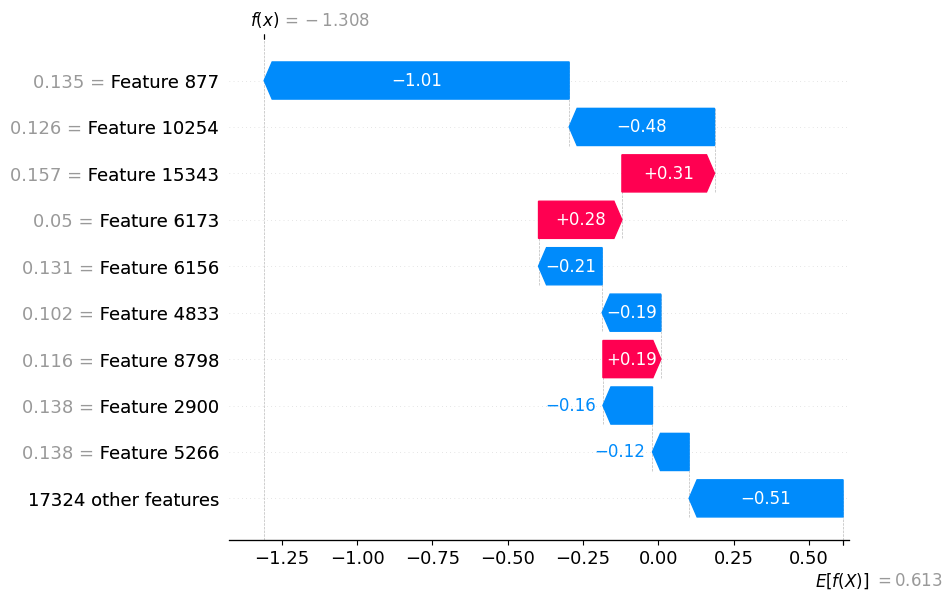

In [312]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

In [313]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

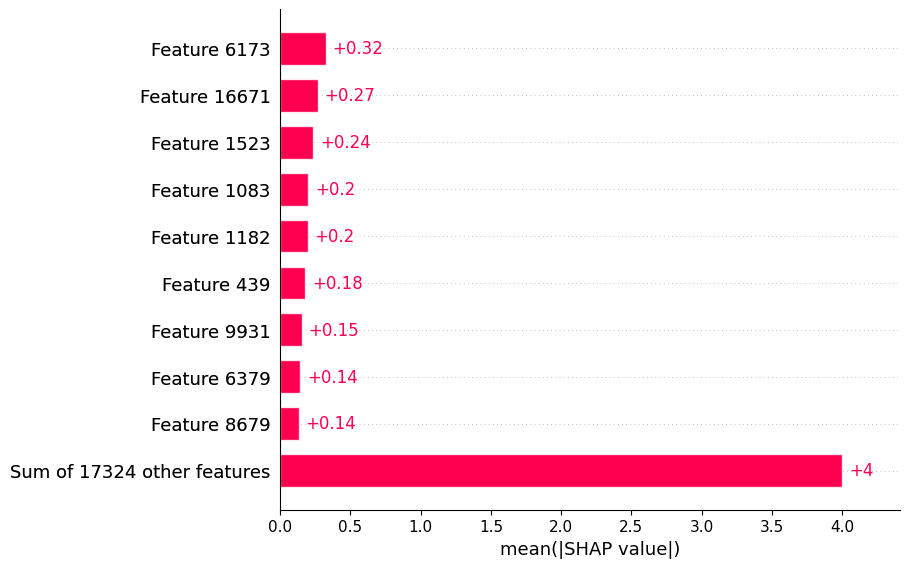

In [314]:
#Mean SHAP
shap.plots.bar(shap_values)

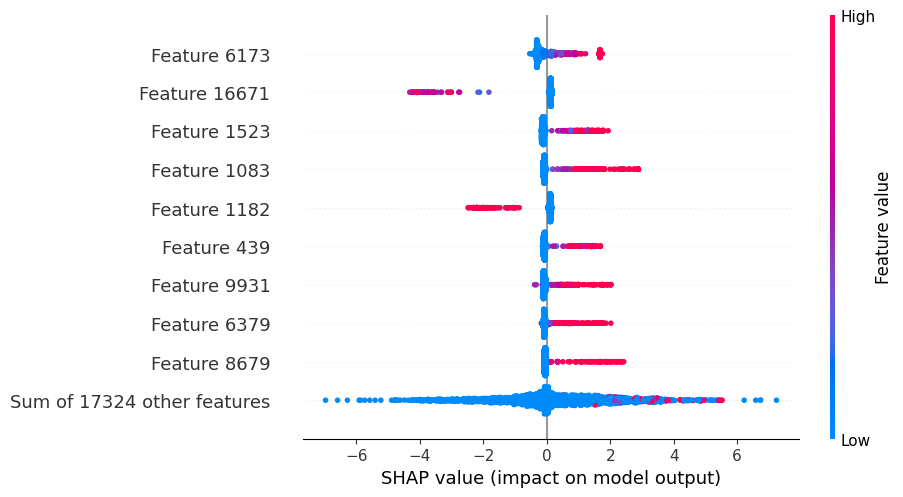

In [315]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

In [ ]:
import pickle

with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

In [320]:
with open('sentiment_model.pkl', 'wb') as file:
    pickle.dump(lda, file)

In [322]:
with open('recommendation_model.pkl', 'wb') as file:
    pickle.dump(recommendation, file)

In [329]:
with open("models/vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
